In [32]:
devtools::install_github("rensa/ggflags", force = TRUE)

pillar (1.8.0 -> 1.8.1) [CRAN]
tibble (3.1.7 -> 3.1.8) [CRAN]
httr   (1.4.3 -> 1.4.4) [CRAN]


Installing 3 packages: pillar, tibble, httr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘httr’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmpZfWi8G/remotes2151c932d8/jimjam-slam-ggflags-e3c6e51/DESCRIPTION’ (356ms)
─  preparing ‘ggflags’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
     NB: this package now depends on R (>= 3.5.0)
─  building ‘ggflags_0.0.2.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
library(tidyverse)
library(paletteer)
library(showtext)
library(patchwork)
library(tidytext)
library(reshape2)
library(ggrepel)
library(ggtext)
library(lubridate)
library(janitor)
library(scales)
library(tidyr)
library(MetBrewer)
library(ggimage)
library(jpeg)
library(png)
library(cowplot)
library(ggthemes)
library(paletteer)
library(ggflags)
library(magick)


library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

annotate <- ggplot2::annotate

font_add(family = "Roboto", regular = "../input/roboto/RobotoCondensed-Regular.ttf")
showtext_auto()

my_theme <- function() {
  
  # Colors
  color.background = "#030303"
  color.text ="#F2F2F2"
  
  # Begin construction of chart
  theme_bw(base_size=15) +
    
    # Format background colors
    theme(panel.background = element_rect(fill=color.background, color=color.background)) +
    theme(plot.background  = element_rect(fill=color.background, color=color.background)) +
    theme(panel.border     = element_rect(color=color.background)) +
    theme(strip.background = element_rect(fill=color.background, color=color.background)) +
    
    # Format the grid
    theme(panel.grid.major.y = element_blank()) +
    theme(panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank()) +
    theme(axis.ticks       = element_blank()) +

# Format the legend
    theme(legend.position = "none") +
    theme(legend.background = element_rect(fill=color.background, color=color.background))+
    theme(legend.text = element_text(size = 15, face = "bold", color=color.text))+
    theme(legend.justification = "center")+
    theme(legend.title = element_text(family = "Roboto",
                                    color = "#030303",
                                    size = 15, face = "bold"))+

# Format title and axis labels
    theme(plot.title       = element_text(color=color.text, size=40, face = "bold", hjust = 0.5, family = 'Roboto'))+
    theme(plot.subtitle    = element_text(color=color.text, size=30, face = "bold", hjust = 0.5, family = 'Roboto'))+
    theme(plot.caption     = element_text(color=color.text, size=20, face = "bold", hjust = 0.5, family = 'Roboto'))+
    theme(axis.title.x     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.title.y     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.text.x      = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.text.y      = element_text(size=25, color = color.text, face = "bold", family = 'Roboto')) +
    theme(strip.text       = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +

# Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

In [34]:
df <- read.csv("../input/forbes-billionaires-data-preprocessed/Forbes Billionaires.csv")
head(df)

Rank Name                      Networth Age Country       Source            
1 1    Elon Musk                 219      50  United States Tesla, SpaceX     
2 2    Jeff Bezos                171      58  United States Amazon            
3 3    Bernard Arnault & family  158      73  France        LVMH              
4 4    Bill Gates                129      66  United States Microsoft         
5 5    Warren Buffett            118      91  United States Berkshire Hathaway
6 6    Larry Page                111      49  United States Google            
  Industry              
1 Automotive            
2 Technology            
3 Fashion & Retail      
4 Technology            
5 Finance & Investments 
6 Technology

In [35]:
df <- df %>% 
  mutate(across(where(is.character), str_trim))

# Get country codes

In [36]:
c_codes <- read.csv("../input/continents2/continents2.csv")
head(c_codes)

name           alpha.2 alpha.3 country.code iso_3166.2    region 
1 Afghanistan    AF      AFG       4          ISO 3166-2:AF Asia   
2 Åland Islands  AX      ALA     248          ISO 3166-2:AX Europe 
3 Albania        AL      ALB       8          ISO 3166-2:AL Europe 
4 Algeria        DZ      DZA      12          ISO 3166-2:DZ Africa 
5 American Samoa AS      ASM      16          ISO 3166-2:AS Oceania
6 Andorra        AD      AND      20          ISO 3166-2:AD Europe 
  sub.region      intermediate.region region.code sub.region.code
1 Southern Asia                       142          34            
2 Northern Europe                     150         154            
3 Southern Europe                     150          39            
4 Northern Africa                       2          15            
5 Polynesia                             9          61            
6 Southern Europe                     150          39            
  intermediate.region.code
1 NA                      
2 NA                      
3 NA                      
4 NA                      
5 NA                      
6 NA

In [37]:
c_codes <- rename(c_codes,Country=name)
head(c_codes)

Country        alpha.2 alpha.3 country.code iso_3166.2    region 
1 Afghanistan    AF      AFG       4          ISO 3166-2:AF Asia   
2 Åland Islands  AX      ALA     248          ISO 3166-2:AX Europe 
3 Albania        AL      ALB       8          ISO 3166-2:AL Europe 
4 Algeria        DZ      DZA      12          ISO 3166-2:DZ Africa 
5 American Samoa AS      ASM      16          ISO 3166-2:AS Oceania
6 Andorra        AD      AND      20          ISO 3166-2:AD Europe 
  sub.region      intermediate.region region.code sub.region.code
1 Southern Asia                       142          34            
2 Northern Europe                     150         154            
3 Southern Europe                     150          39            
4 Northern Africa                       2          15            
5 Polynesia                             9          61            
6 Southern Europe                     150          39            
  intermediate.region.code
1 NA                      
2 NA                      
3 NA                      
4 NA                      
5 NA                      
6 NA

# Join Data

In [38]:
final <- left_join(df, c_codes,by = 'Country')
head(final)

Rank Name                     Networth Age Country       Source            
1 1    Elon Musk                219      50  United States Tesla, SpaceX     
2 2    Jeff Bezos               171      58  United States Amazon            
3 3    Bernard Arnault & family 158      73  France        LVMH              
4 4    Bill Gates               129      66  United States Microsoft         
5 5    Warren Buffett           118      91  United States Berkshire Hathaway
6 6    Larry Page               111      49  United States Google            
  Industry              alpha.2 alpha.3 country.code iso_3166.2    region  
1 Automotive            US      USA     840          ISO 3166-2:US Americas
2 Technology            US      USA     840          ISO 3166-2:US Americas
3 Fashion & Retail      FR      FRA     250          ISO 3166-2:FR Europe  
4 Technology            US      USA     840          ISO 3166-2:US Americas
5 Finance & Investments US      USA     840          ISO 3166-2:US Americas
6 Technology            US      USA     840          ISO 3166-2:US Americas
  sub.region       intermediate.region region.code sub.region.code
1 Northern America                      19          21            
2 Northern America                      19          21            
3 Western Europe                       150         155            
4 Northern America                      19          21            
5 Northern America                      19          21            
6 Northern America                      19          21            
  intermediate.region.code
1 NA                      
2 NA                      
3 NA                      
4 NA                      
5 NA                      
6 NA

In [39]:
final %>%
count(Name)

Name                                  n
1    A. Jayson Adair                       1
2    Abdulla Al Futtaim & family           1
3    Abdulla bin Ahmad Al Ghurair & family 1
4    Abdulsamad Rabiu                      1
5    Abhay Firodia                         1
6    Abigail Johnson                       1
7    Abilio dos Santos Diniz               1
8    Acharya Balkrishna                    1
9    Adam Foroughi                         1
10   Adam Kwok                             1
11   Adam Neumann                          1
12   Adi Godrej                            1
13   Aerin Lauder                          1
14   Agnete Kirk Thinggaard                1
15   Ahmet Calik                           1
16   Airat Shaimiev                        1
17   Ajay Parekh                           1
18   Ajay Piramal                          1
19   Akio Nitori                           1
20   Akira Mori & family                   1
21   Alain Bouchard                        1
22   Alain Merieux & family                1
23   Alain Taravella                       1
24   Alain Wertheimer                      1
25   Alan Gerry                            1
26   Alan Howard                           1
27   Alan Miller & family                  1
28   Alan Trefler                          1
29   Alan Zekelman                         1
30   Albert Shigaboutdinov                 1
⋮    ⋮                                     ⋮
2569 Zhenghua Wang                         1
2570 Zhigang Wu & family                   1
2571 Zhihan Xu                             1
2572 Zhisong Chen                          1
2573 Zhong Huijuan                         1
2574 Zhong Peifeng                         1
2575 Zhong Ruonong & family                1
2576 Zhong Shanshan                        1
2577 Zhong Sheng Jian                      1
2578 Zhongru Gan                           1
2579 Zhongwu Mao                           1
2580 Zhongyi Wu                            1
2581 Zhou Bajin                            1
2582 Zhou Jian                             1
2583 Zhou Jianping                         1
2584 Zhou Minghua                          1
2585 Zhou Mingjie                          1
2586 Zhou Qunfei & family                  1
2587 Zhou Zongwen & family                 1
2588 Zhu Xingliang                         1
2589 Zhu Yan & family                      1
2590 Zhu Yiming                            1
2591 Zhu Yiwen & family                    1
2592 Zhuo Jun                              1
2593 Ziv Aviram                            1
2594 Zong Qinghou                          1
2595 Zong Yanmin                           1
2596 Zugen Ni                              1
2597 Zuowen Song                           1
2598 Zygmunt Solorz-Zak                    1

# Which Countires Have Maximum  Billionaires?

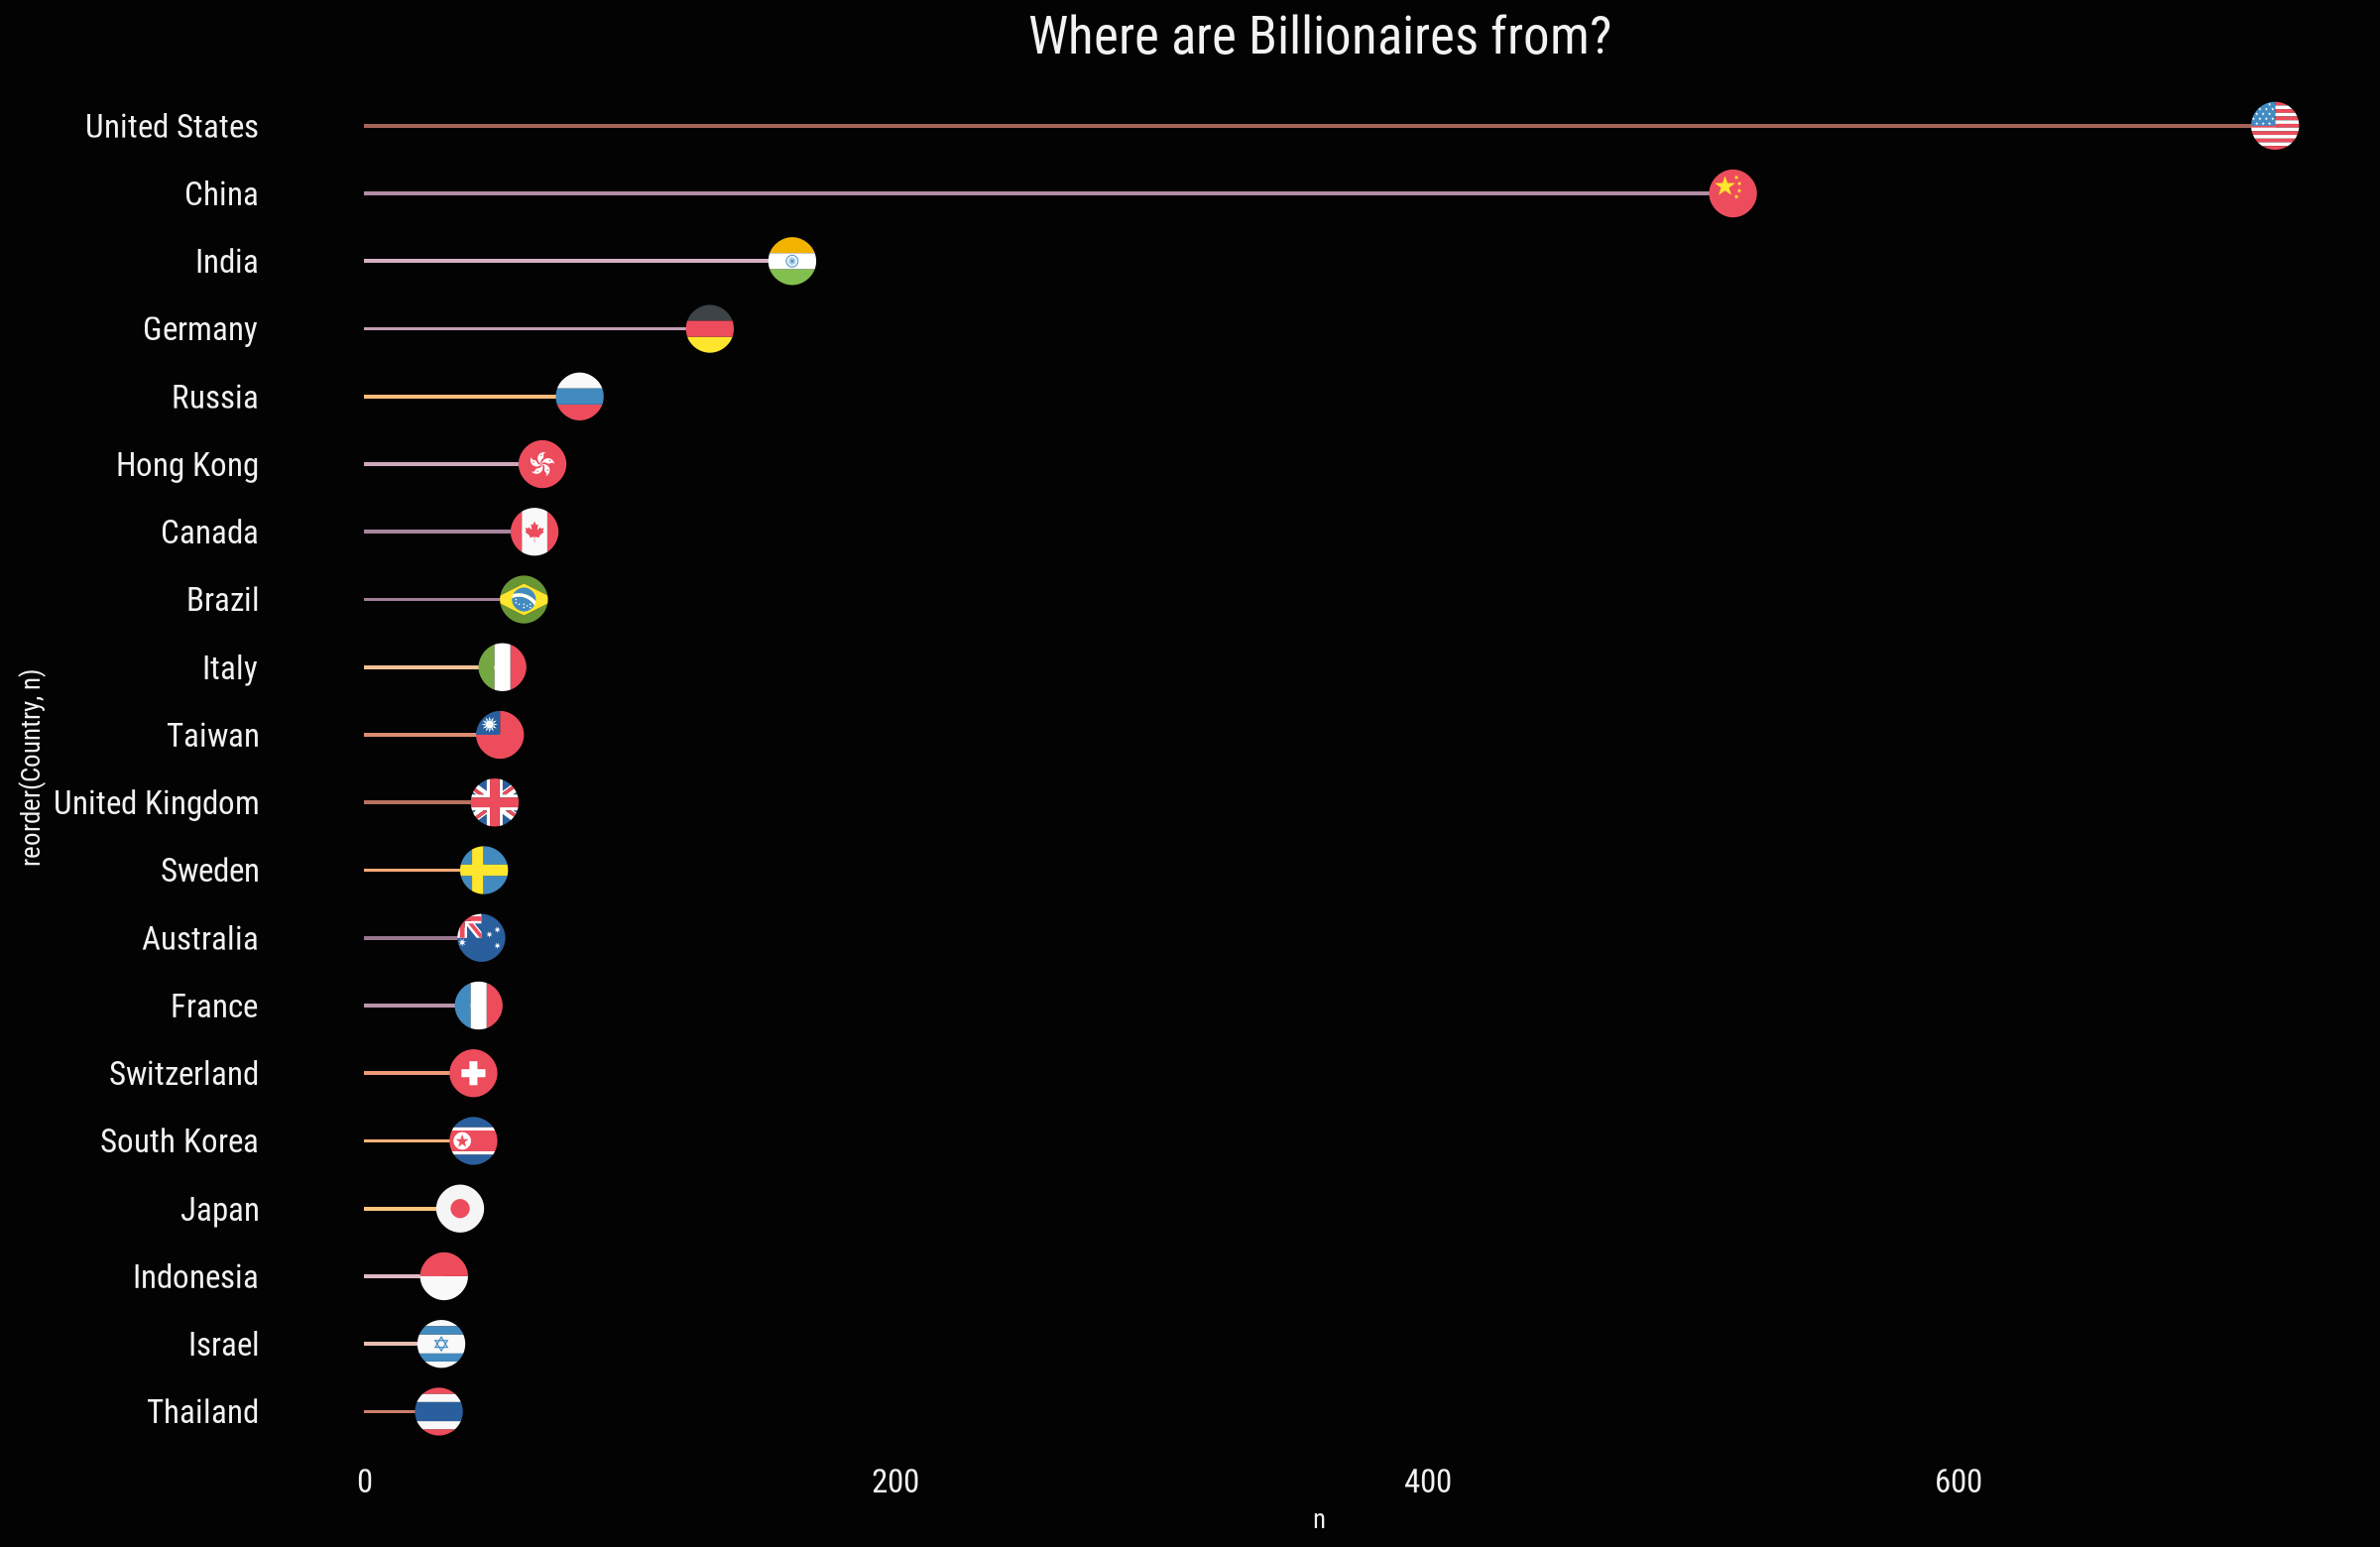

In [40]:
final %>%
mutate(country = str_to_lower(alpha.2))%>%
group_by(country)%>%
count(Country)%>%
arrange(desc(n))%>%
head(20)%>%
ggplot(aes(reorder(Country, n),n, fill = Country))+
geom_bar(stat = 'identity', width = 0.04) +
geom_flag(aes(country = country), size = 12)+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
coord_flip()+
my_theme()+
labs(title = "Where are Billionaires from?")

# Region

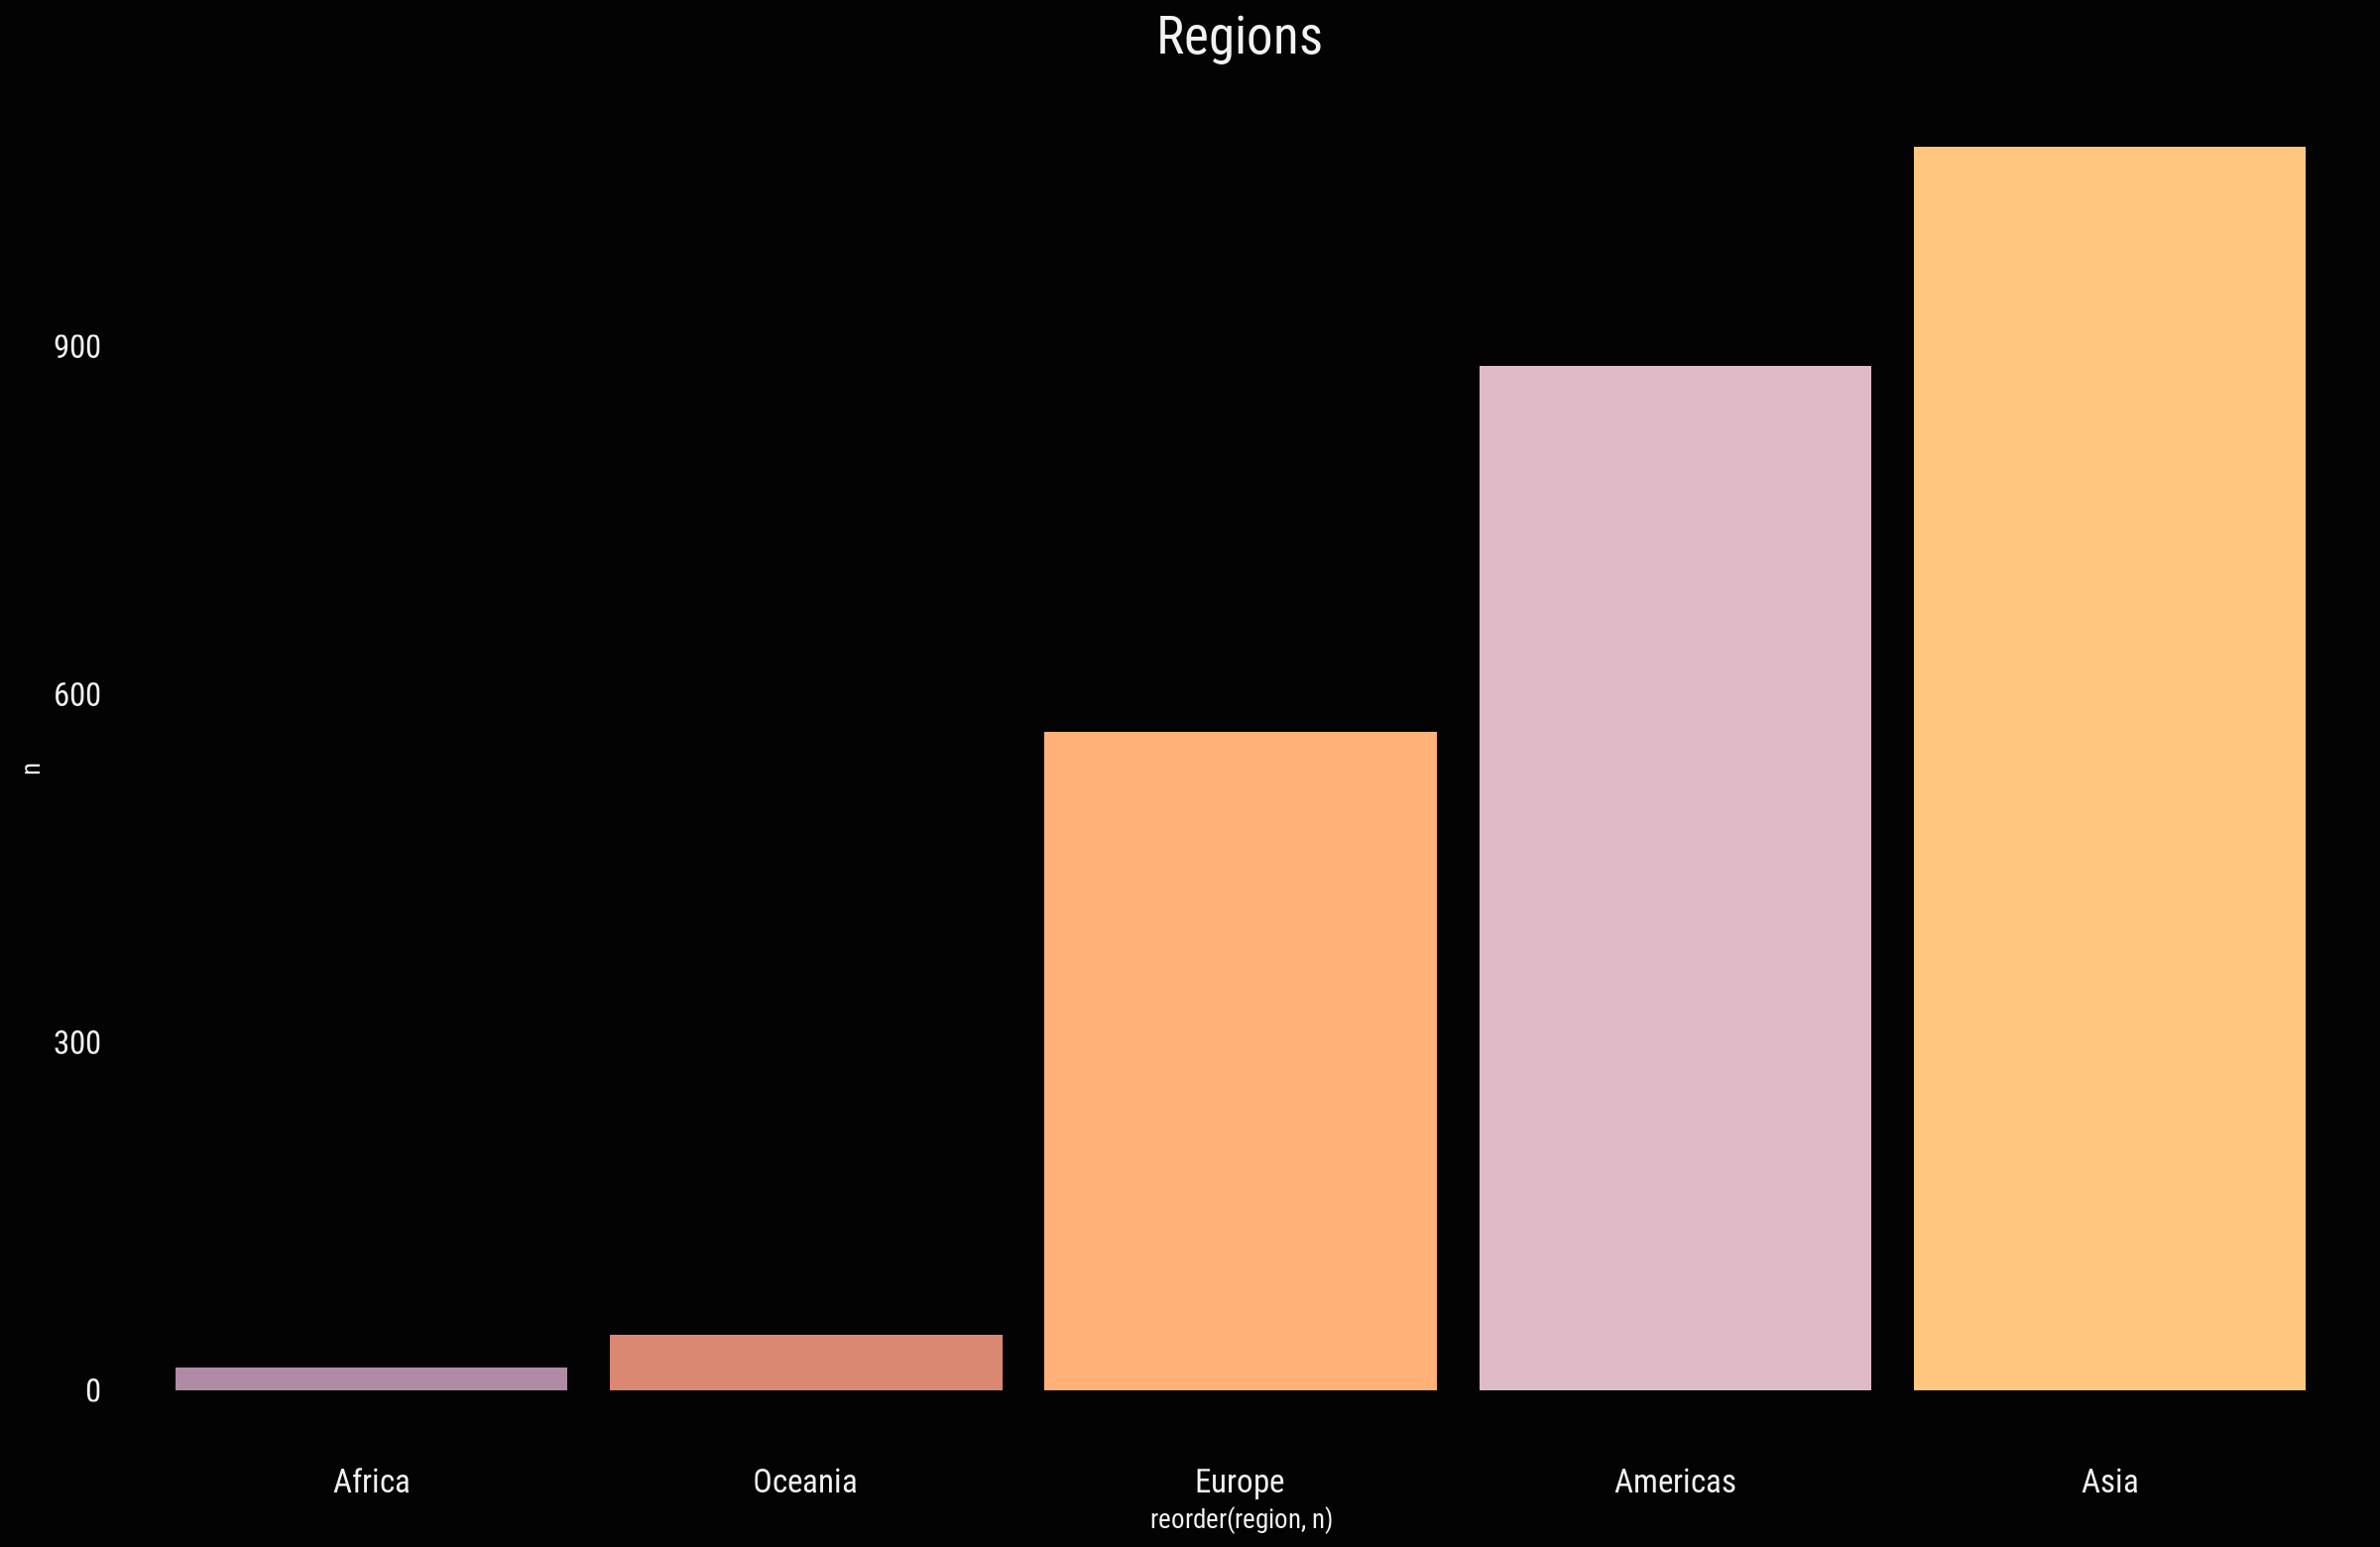

In [43]:
final %>%
filter(!is.na(region))%>%
count(region)%>%
ggplot(aes(reorder(region,n),n, fill = region))+
geom_col()+
scale_fill_manual(values = met.brewer("Morgenstern",6))+
my_theme()+
labs(title = "Regions")

# Networth Region Wise

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



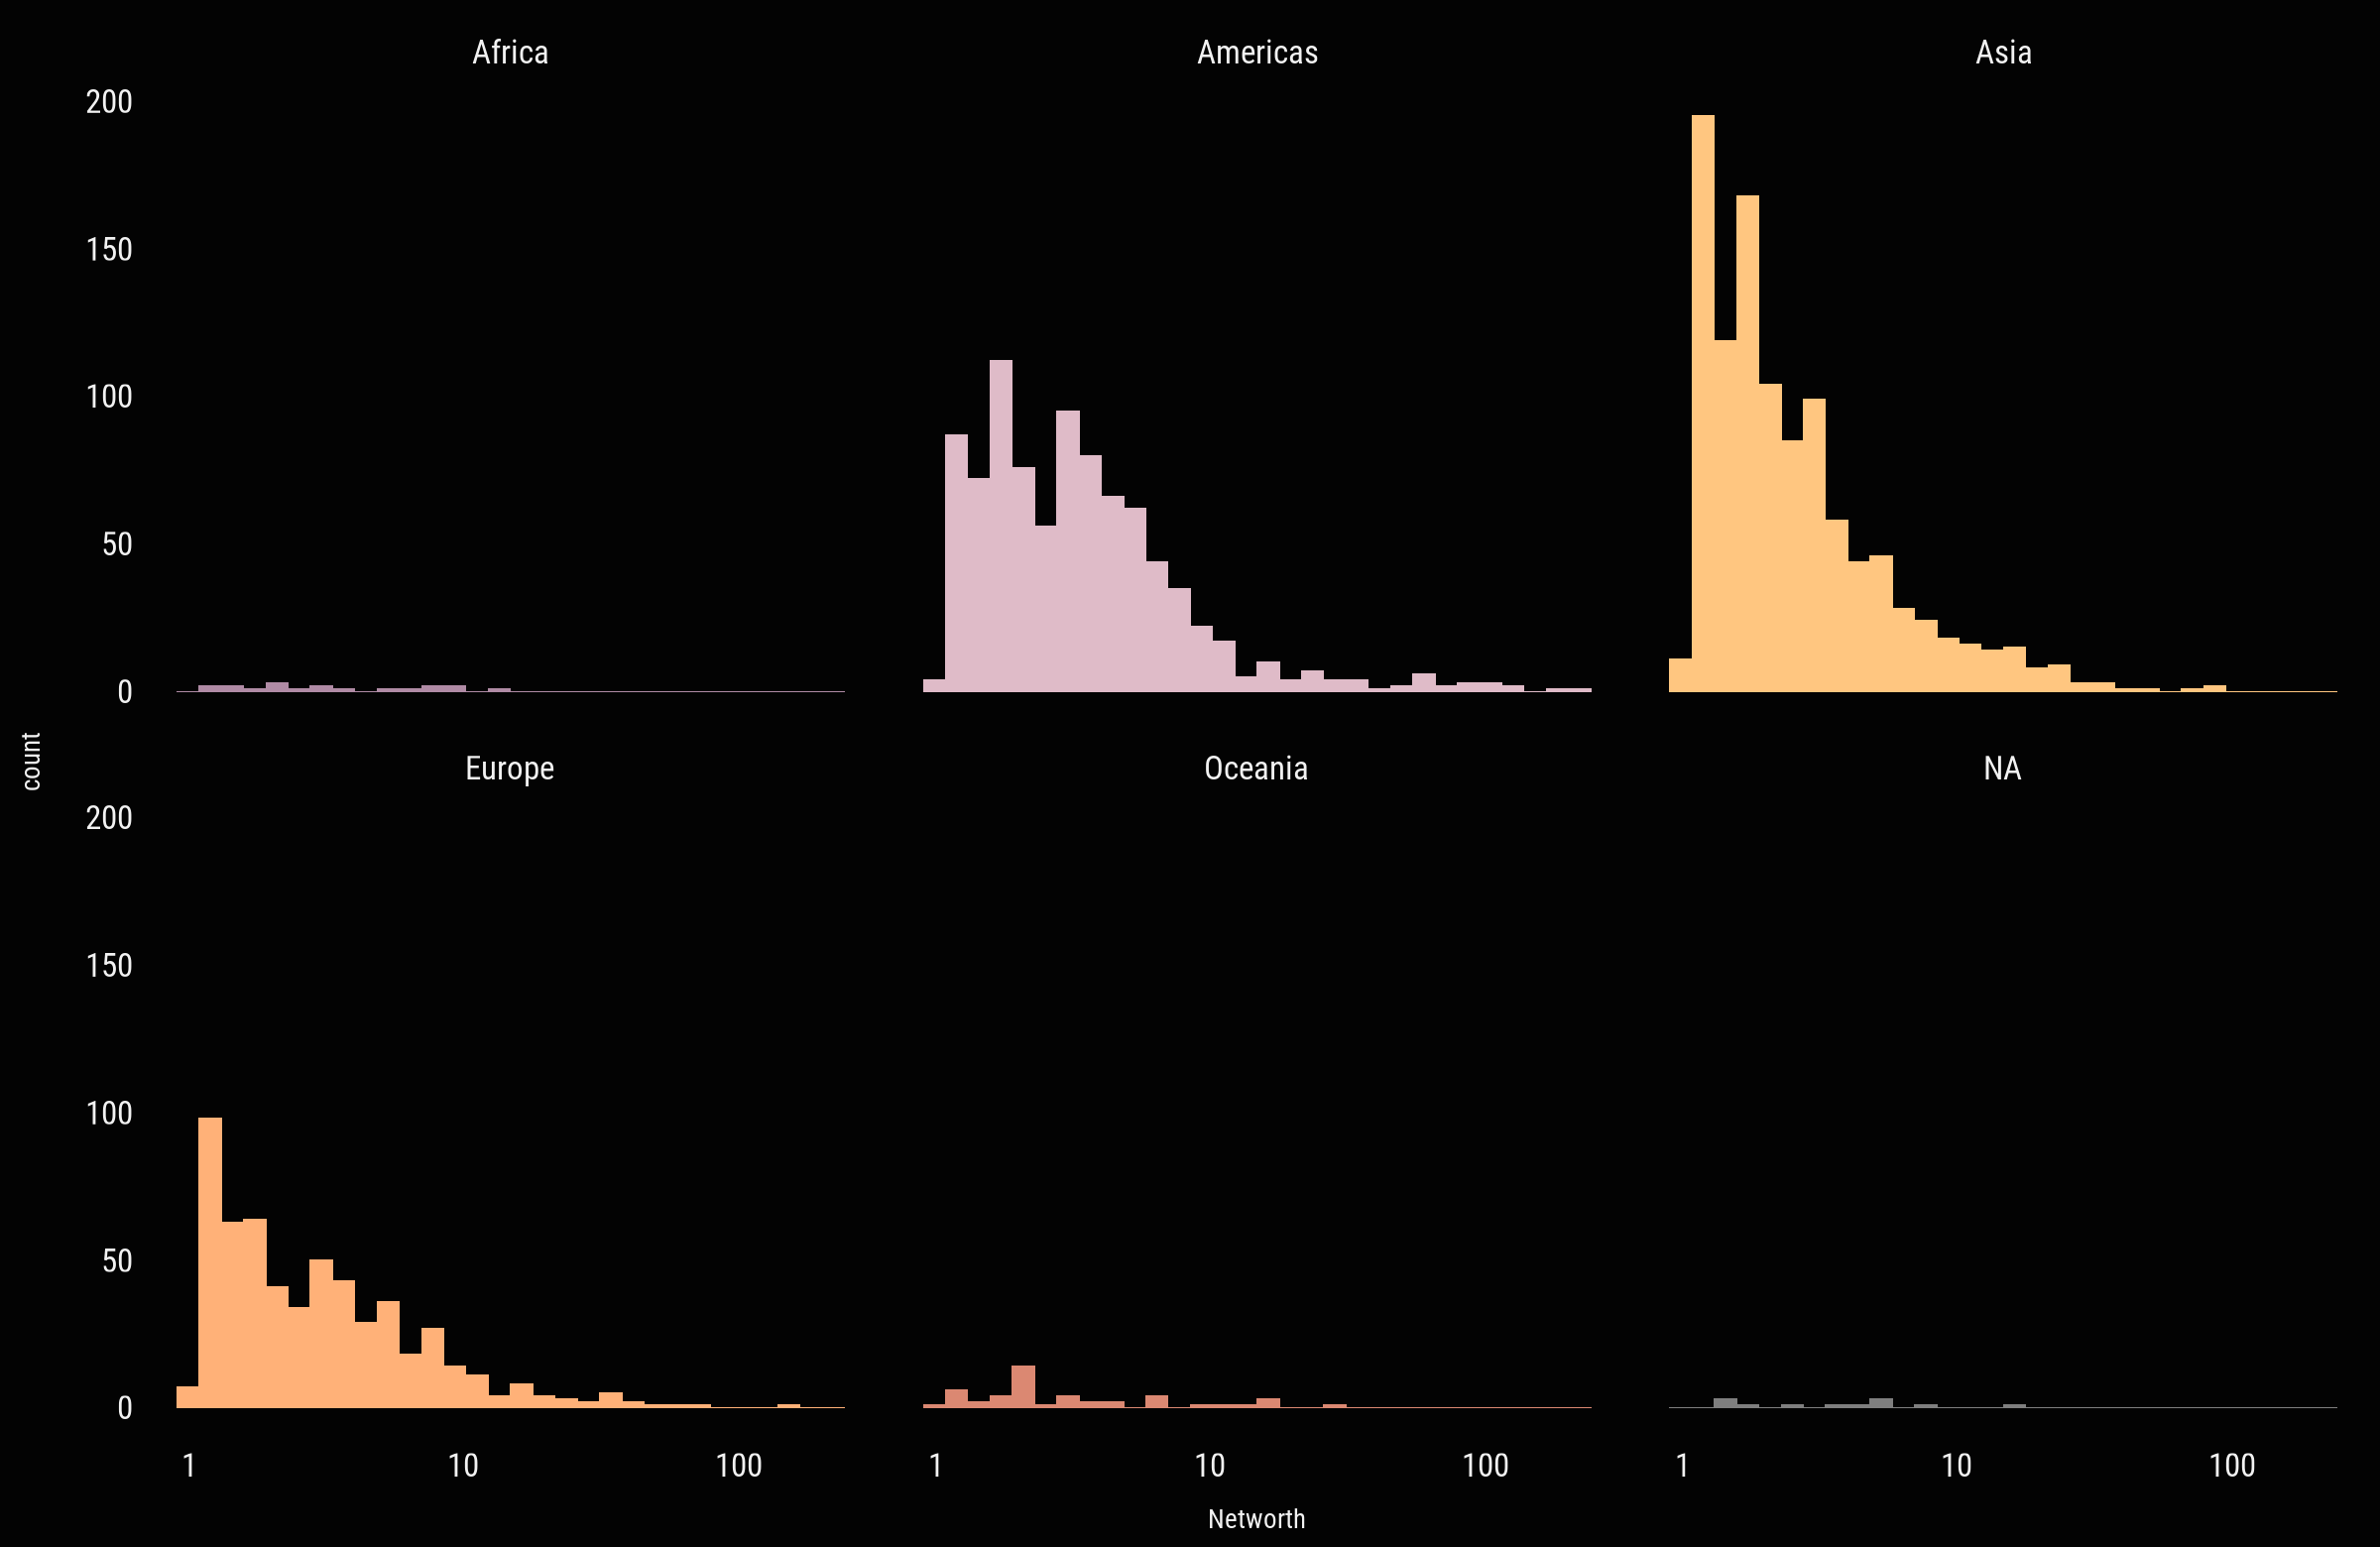

In [44]:
final %>%
ggplot(aes(x = Networth, fill = region))+
geom_histogram()+
facet_wrap(~region)+
scale_x_log10()+
scale_fill_manual(values = met.brewer("Morgenstern",6))+
my_theme()      

# Top 20 Billionairres Region Wise

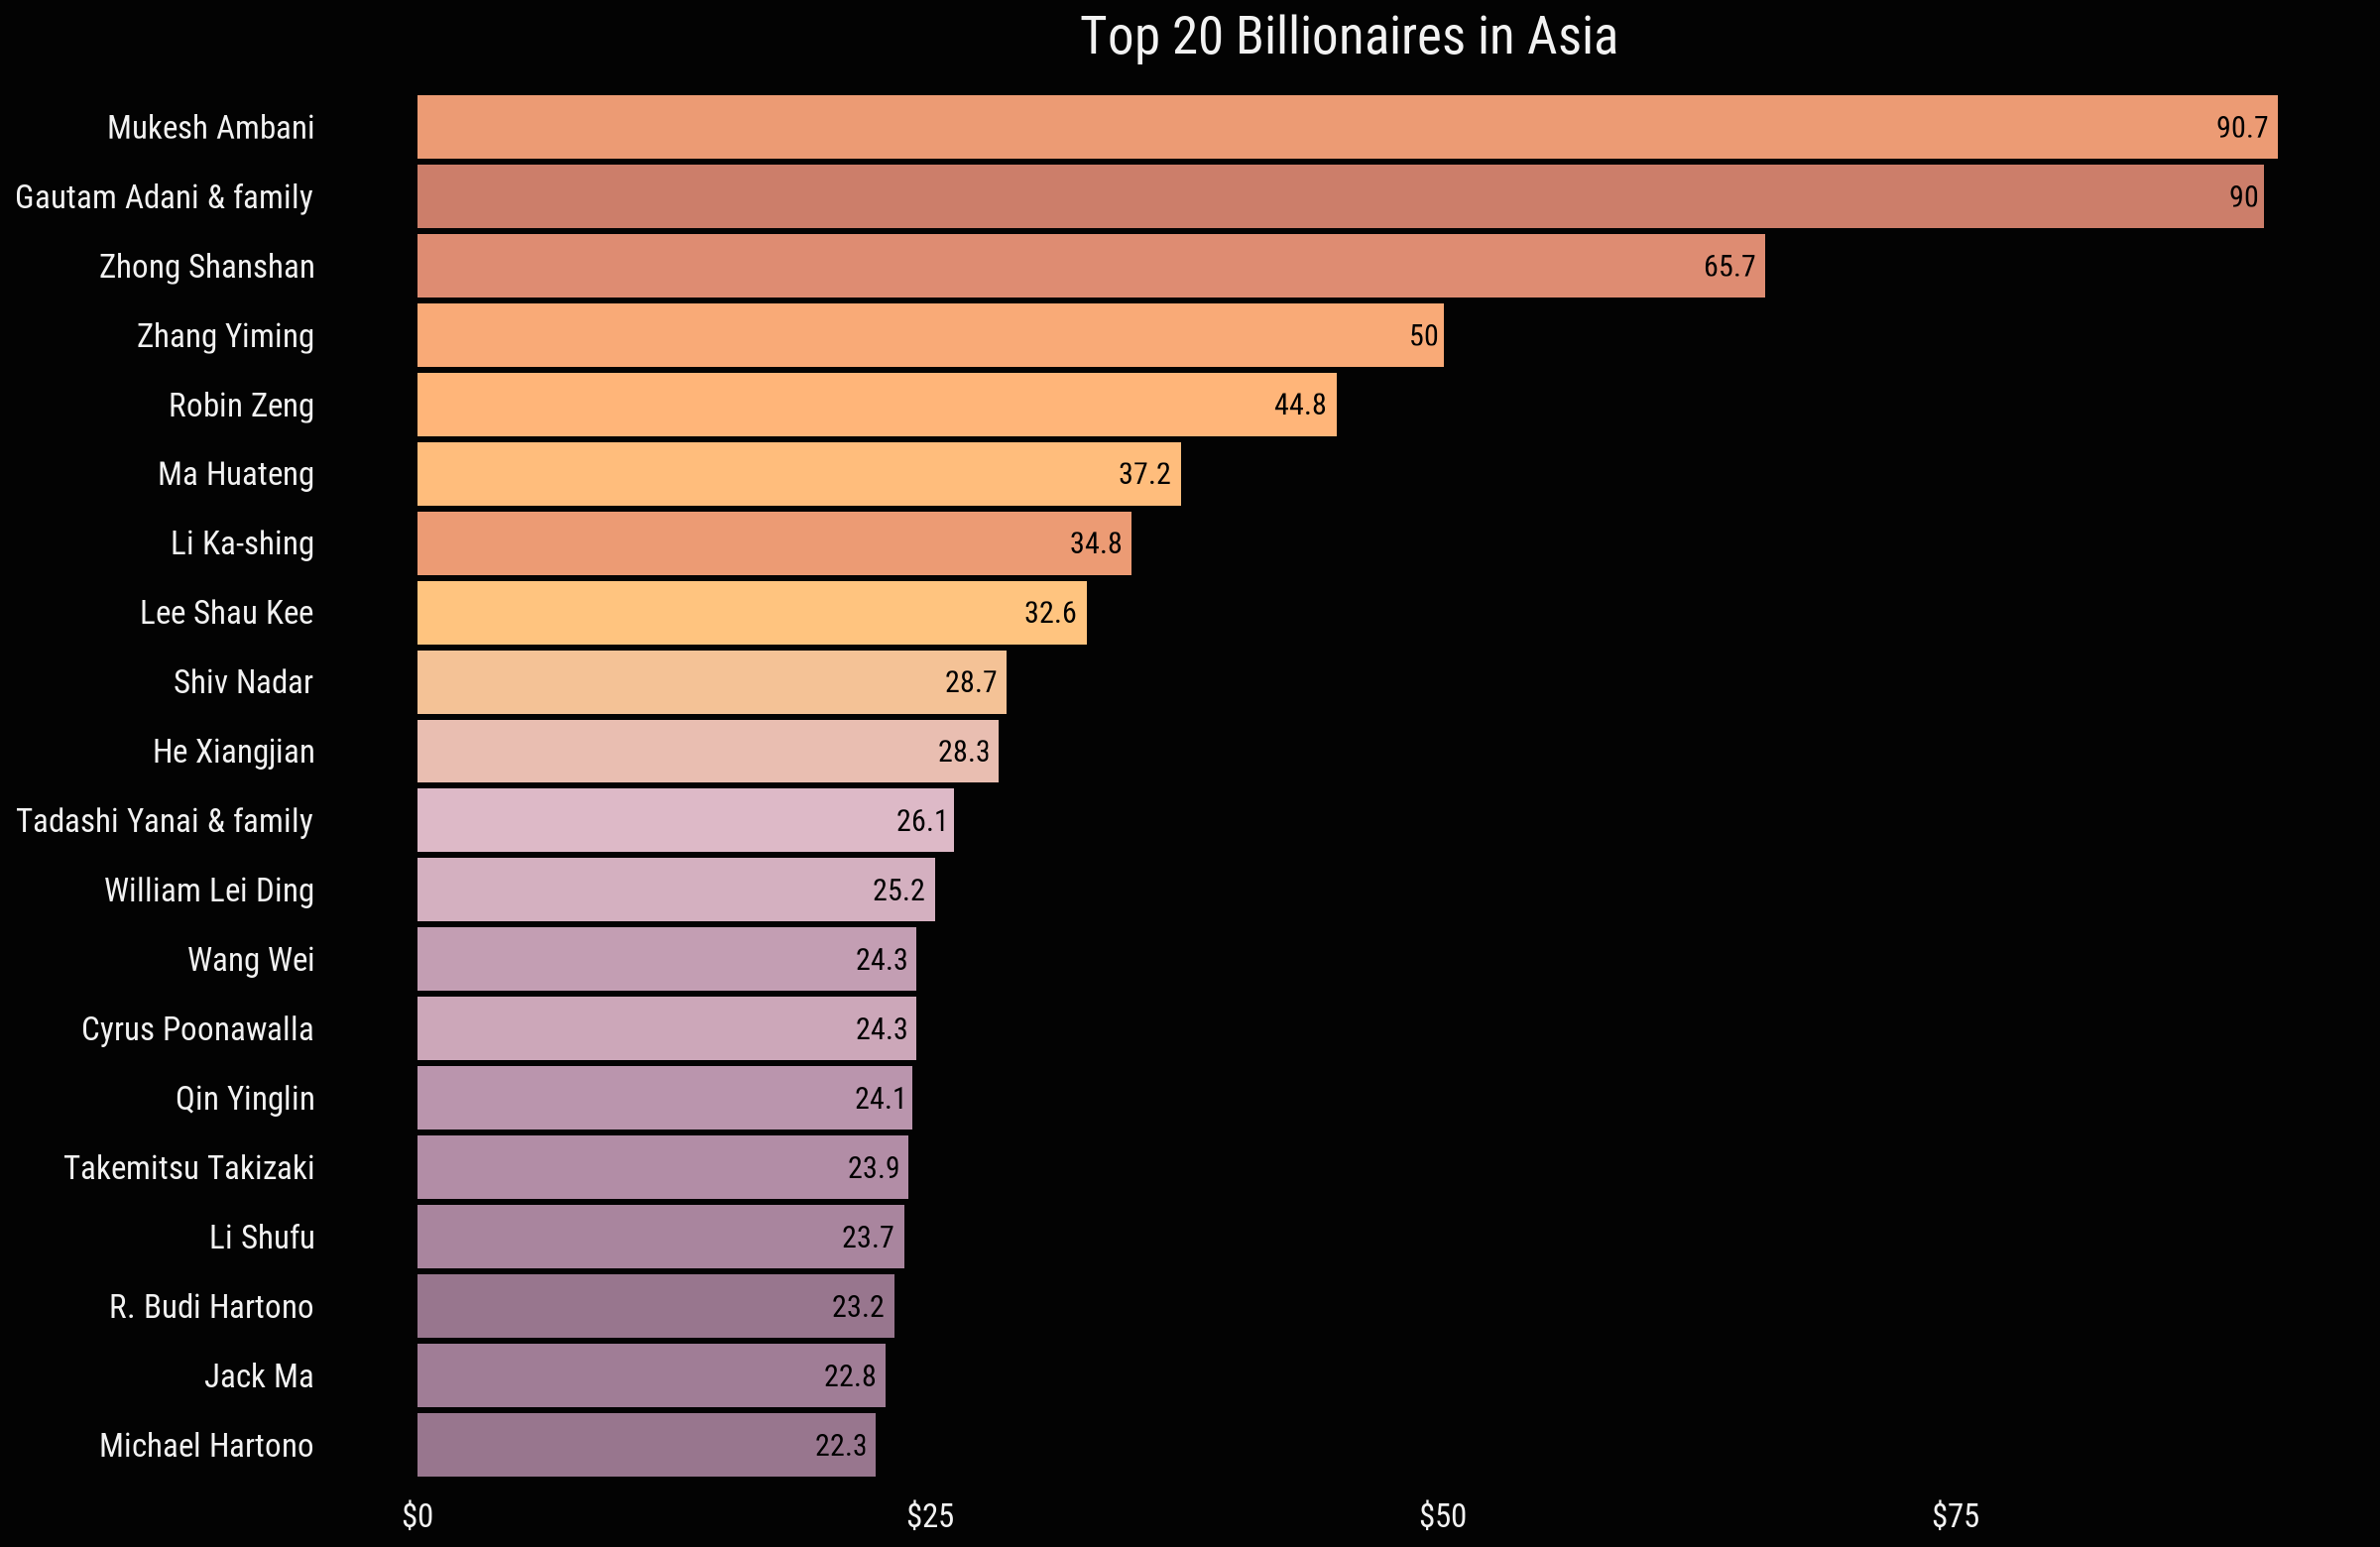

In [121]:
asia <- final %>%
filter(region == "Asia")%>%
arrange(desc(Networth))%>%
head(20)%>%
ggplot(aes(fct_reorder(Name,Networth),Networth, fill = fct_reorder(Source,Networth)))+
geom_bar(stat = "identity")+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
scale_y_continuous(labels = scales::dollar)+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = Networth), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Top 20 Billionaires in Asia")
asia

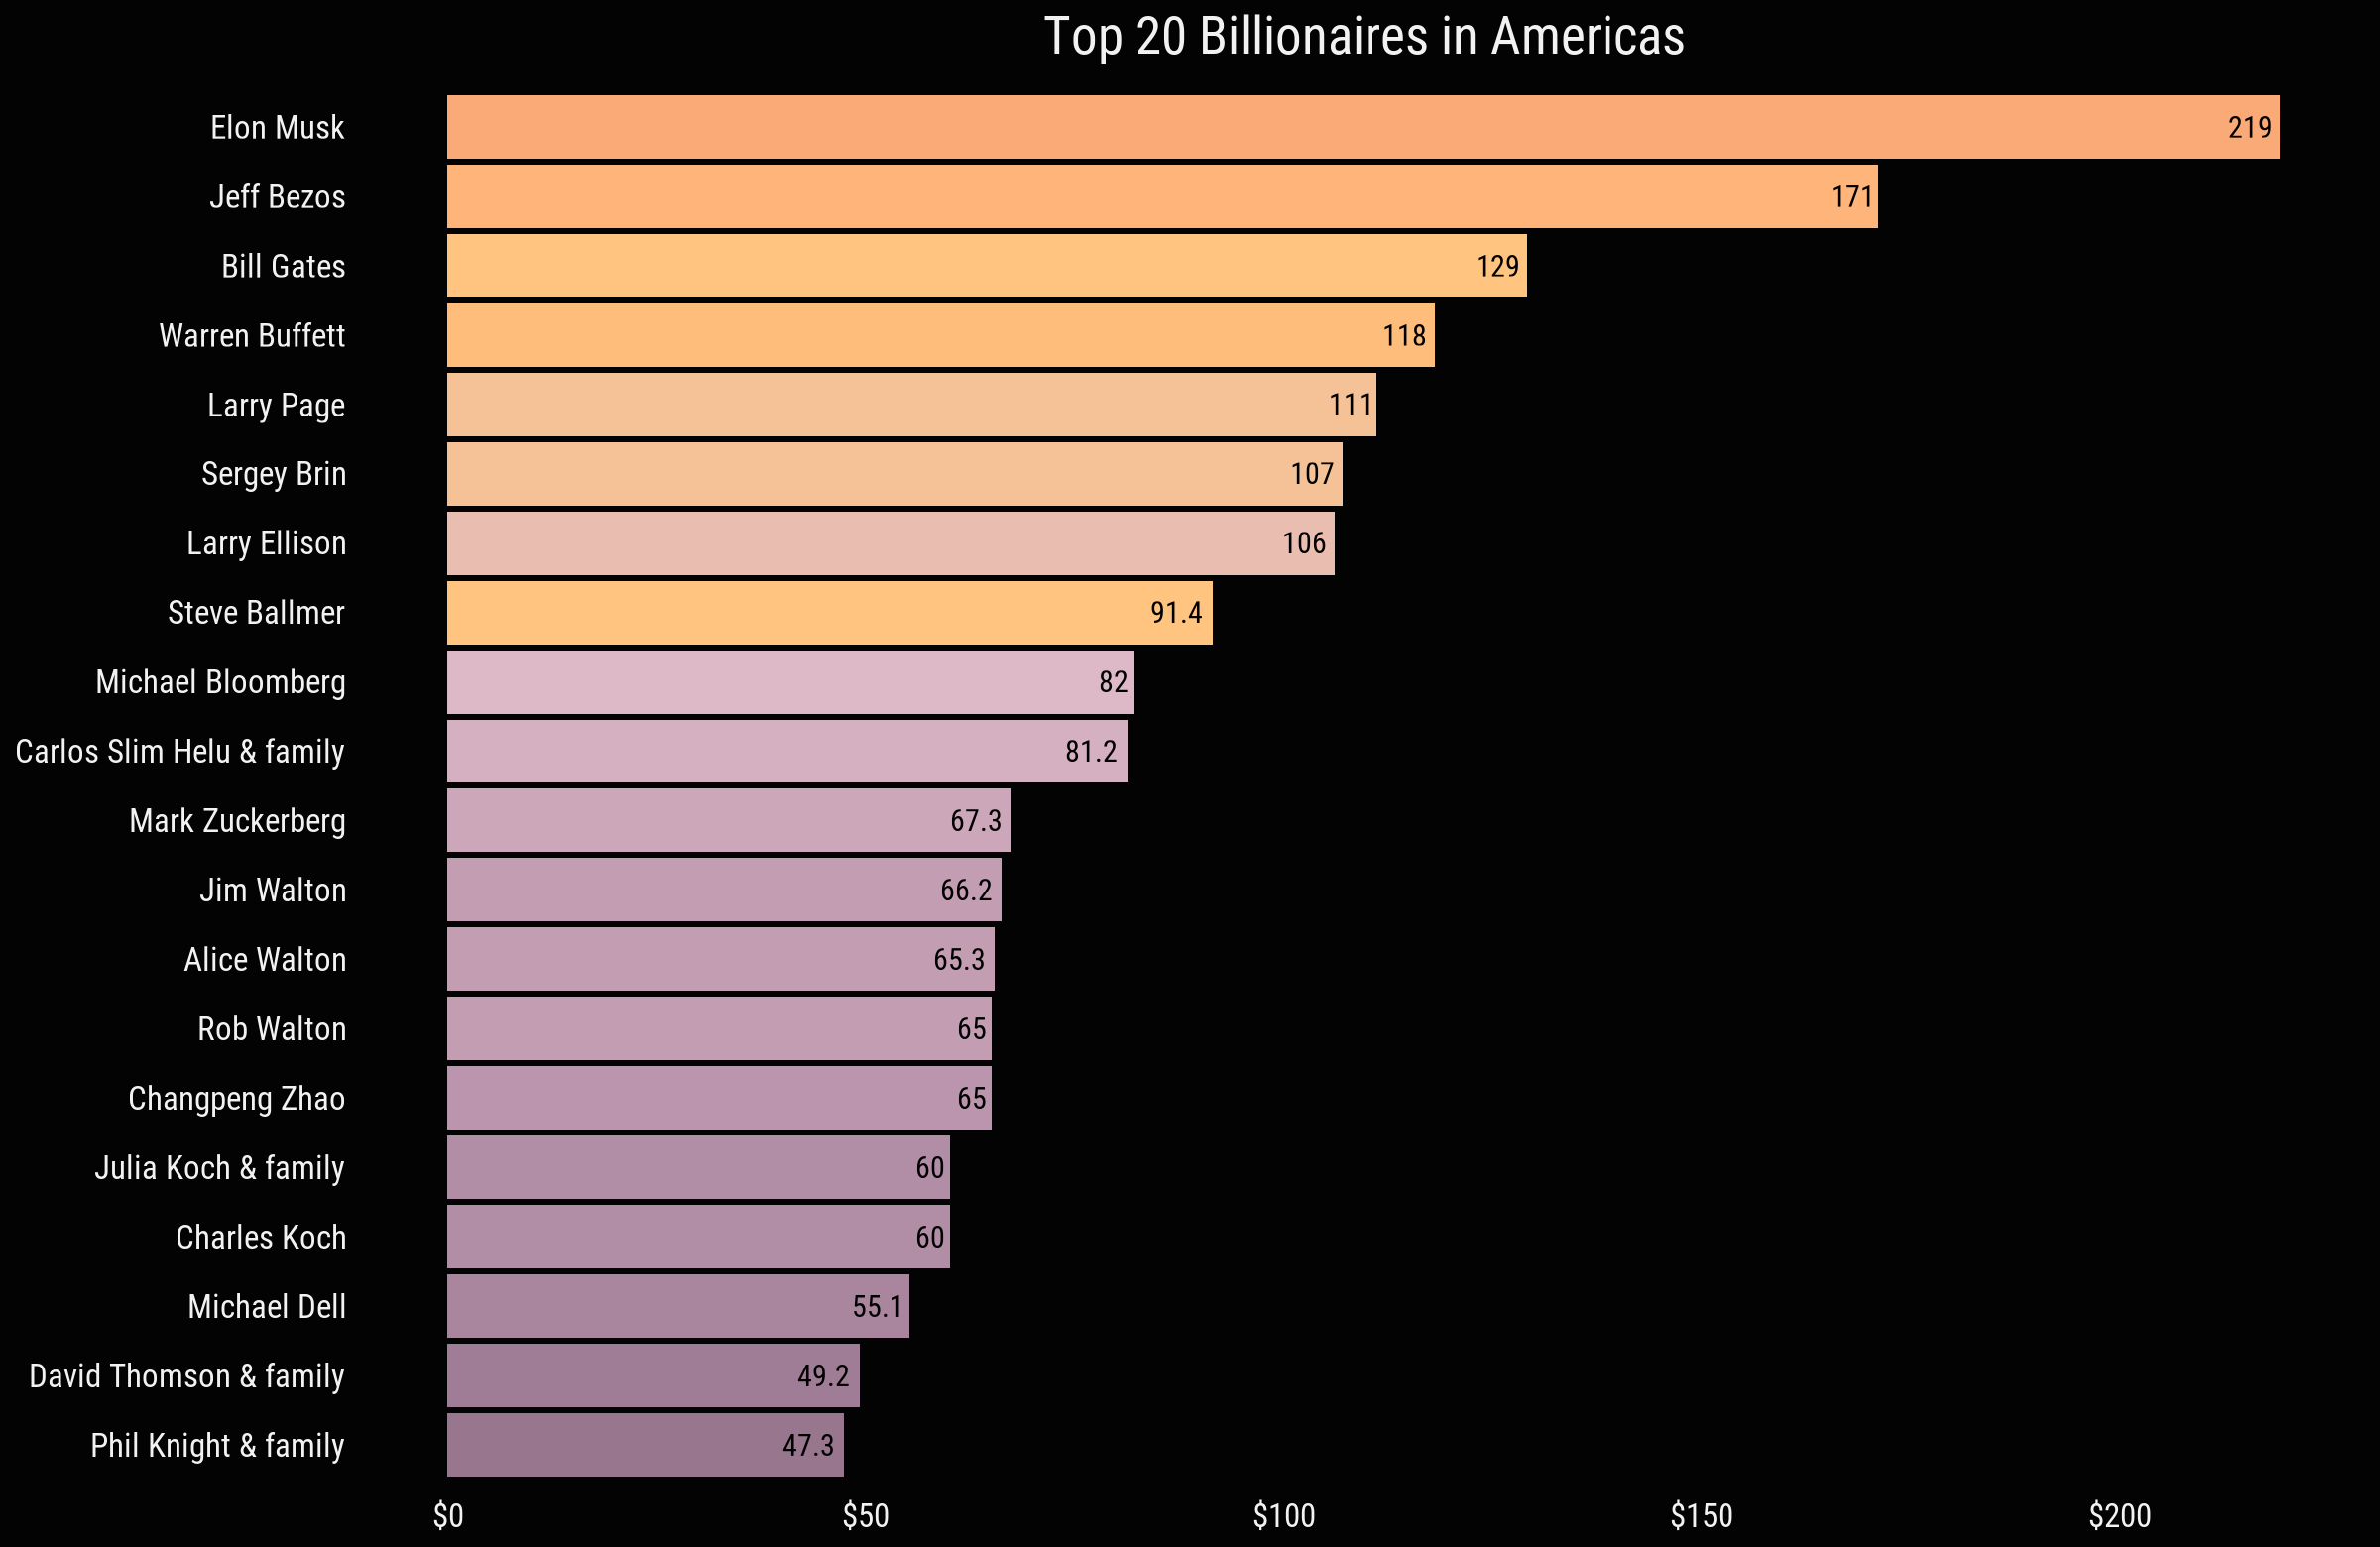

In [120]:
americas <- final %>%
filter(region == "Americas")%>%
arrange(desc(Networth))%>%
head(20)%>%
ggplot(aes(fct_reorder(Name,Networth),Networth, fill = fct_reorder(Source,Networth)))+
geom_bar(stat = "identity")+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
scale_y_continuous(labels = scales::dollar)+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = Networth), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Top 20 Billionaires in Americas")
americas

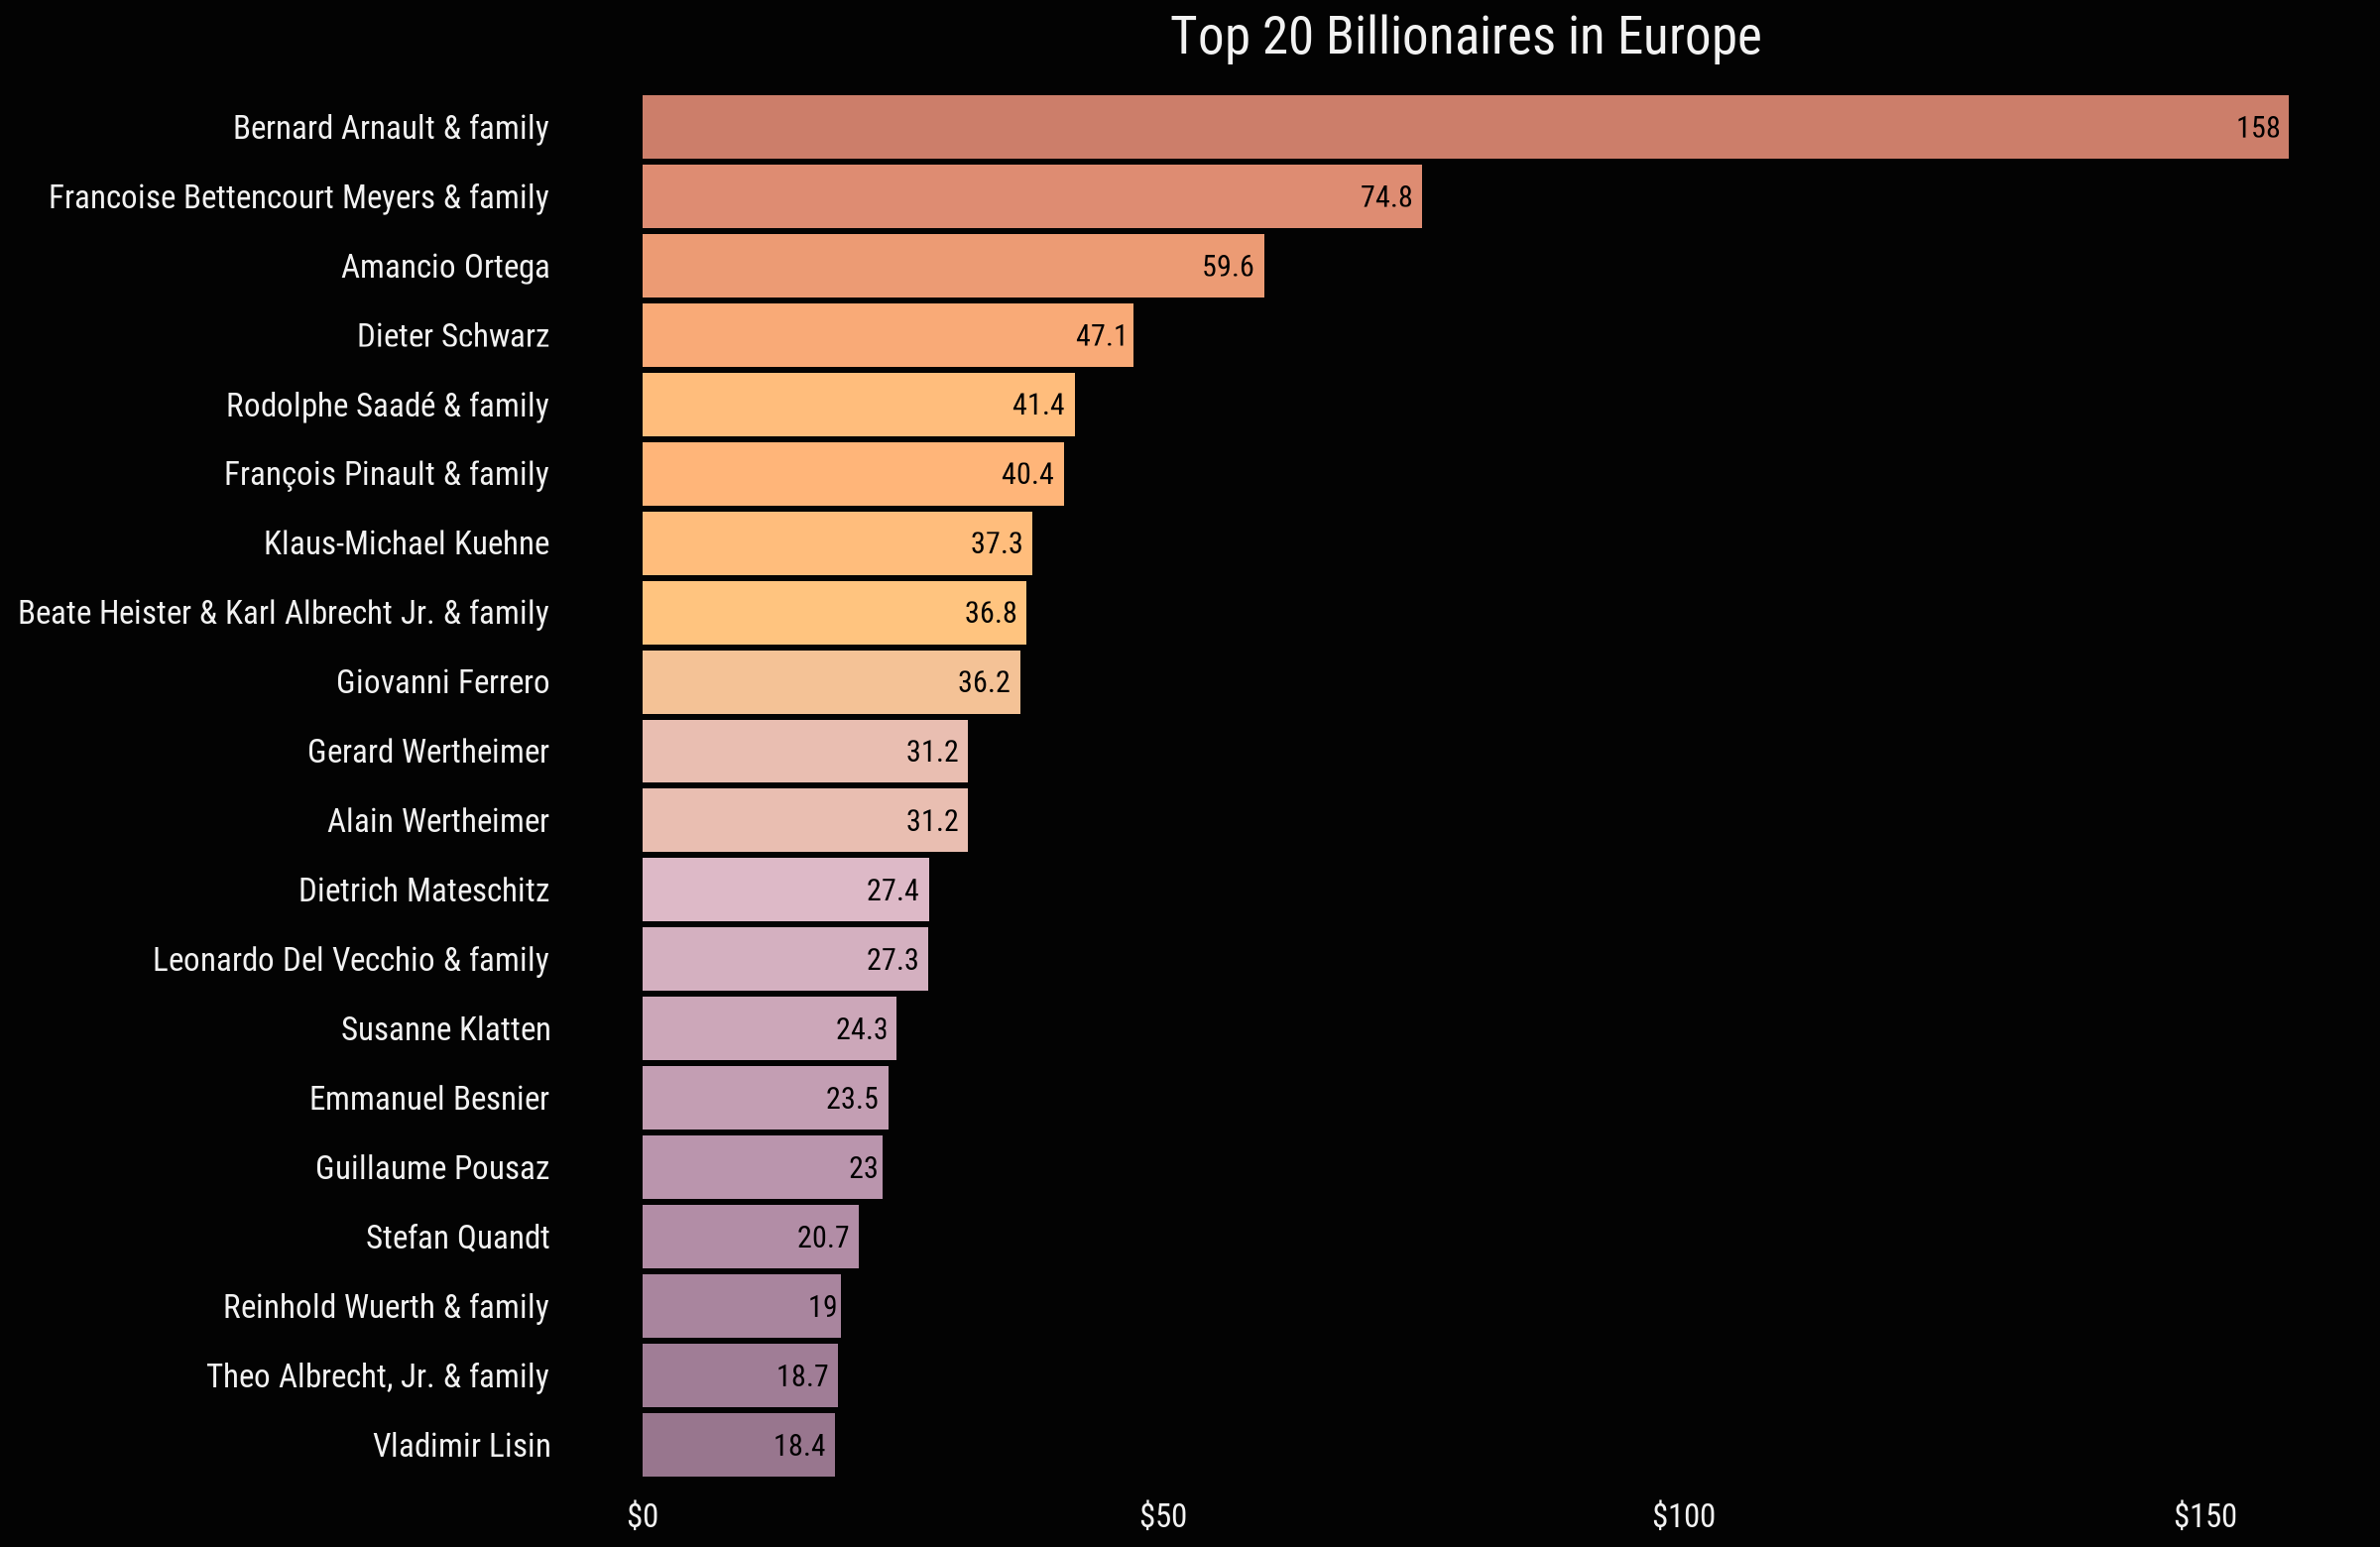

In [119]:
europe <- final %>%
filter(region == "Europe")%>%
arrange(desc(Networth))%>%
head(20)%>%
ggplot(aes(fct_reorder(Name,Networth),Networth, fill = fct_reorder(Source,Networth)))+
geom_bar(stat = "identity")+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
scale_y_continuous(labels = scales::dollar)+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = Networth), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Top 20 Billionaires in Europe")
europe

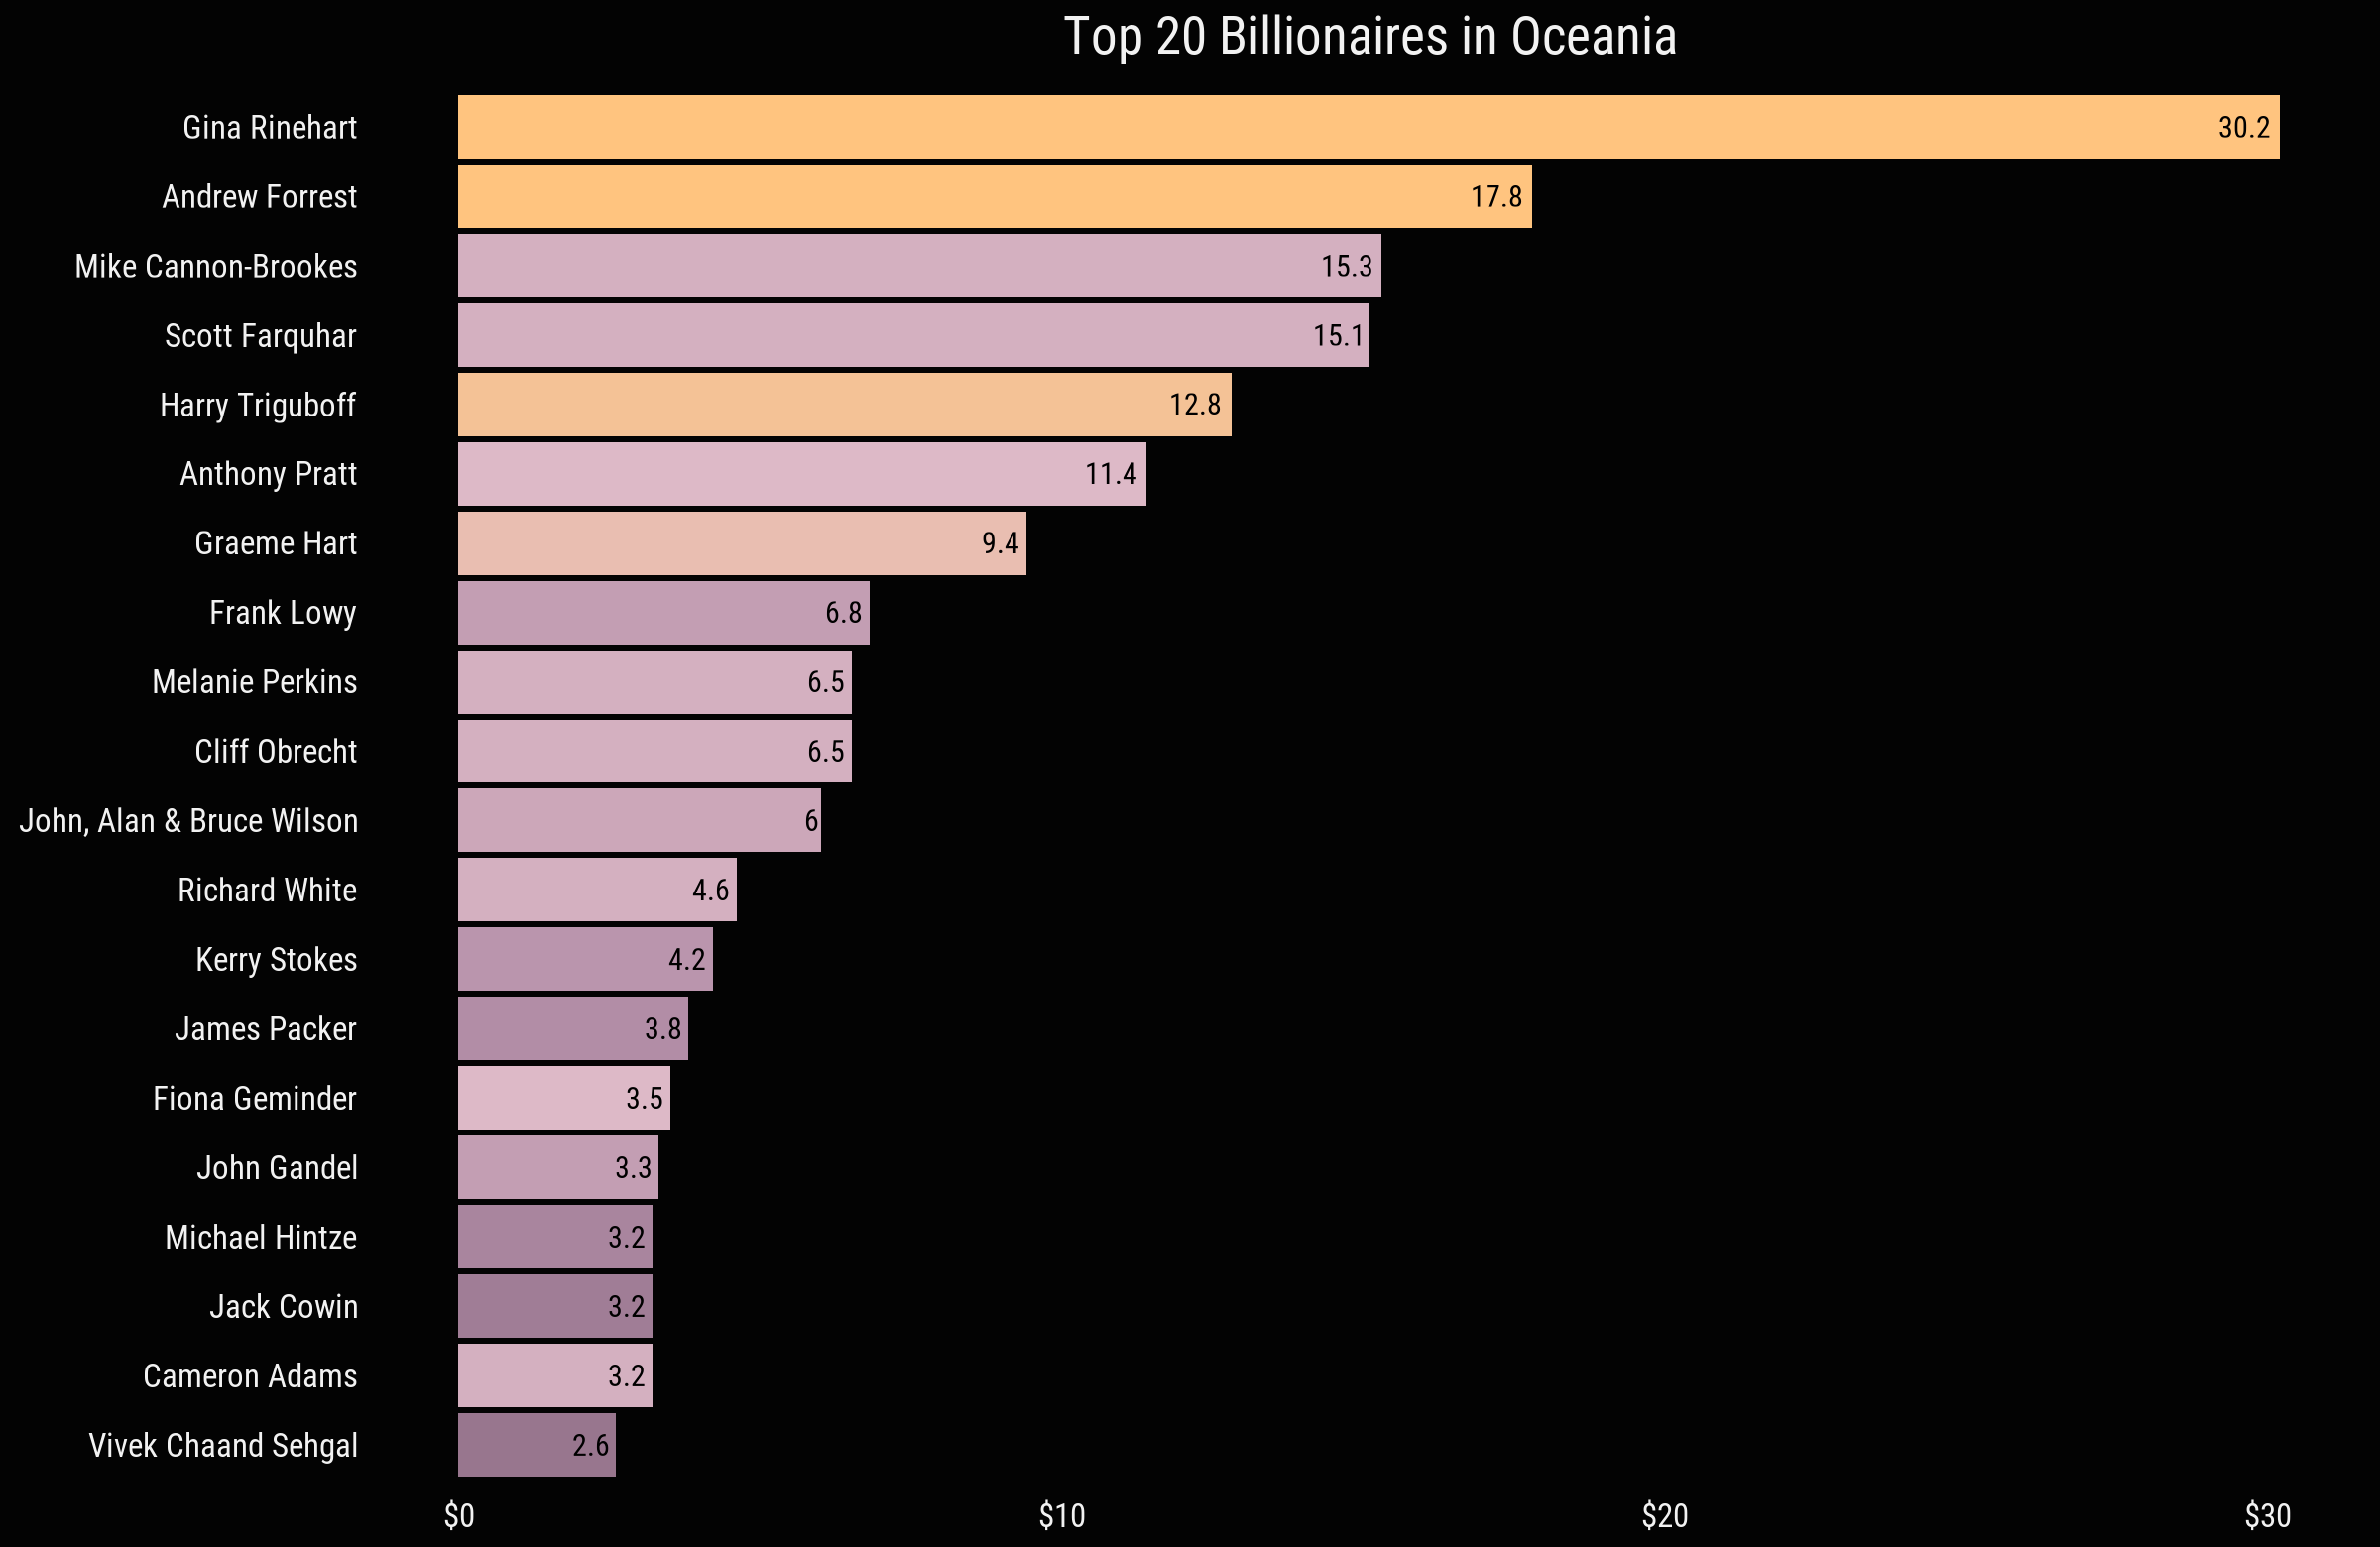

In [118]:
oceania <- final %>%
filter(region == "Oceania")%>%
arrange(desc(Networth))%>%
head(20)%>%
ggplot(aes(fct_reorder(Name,Networth),Networth, fill = fct_reorder(Source,Networth)))+
geom_bar(stat = "identity")+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
scale_y_continuous(labels = scales::dollar)+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = Networth), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Top 20 Billionaires in Oceania")
oceania

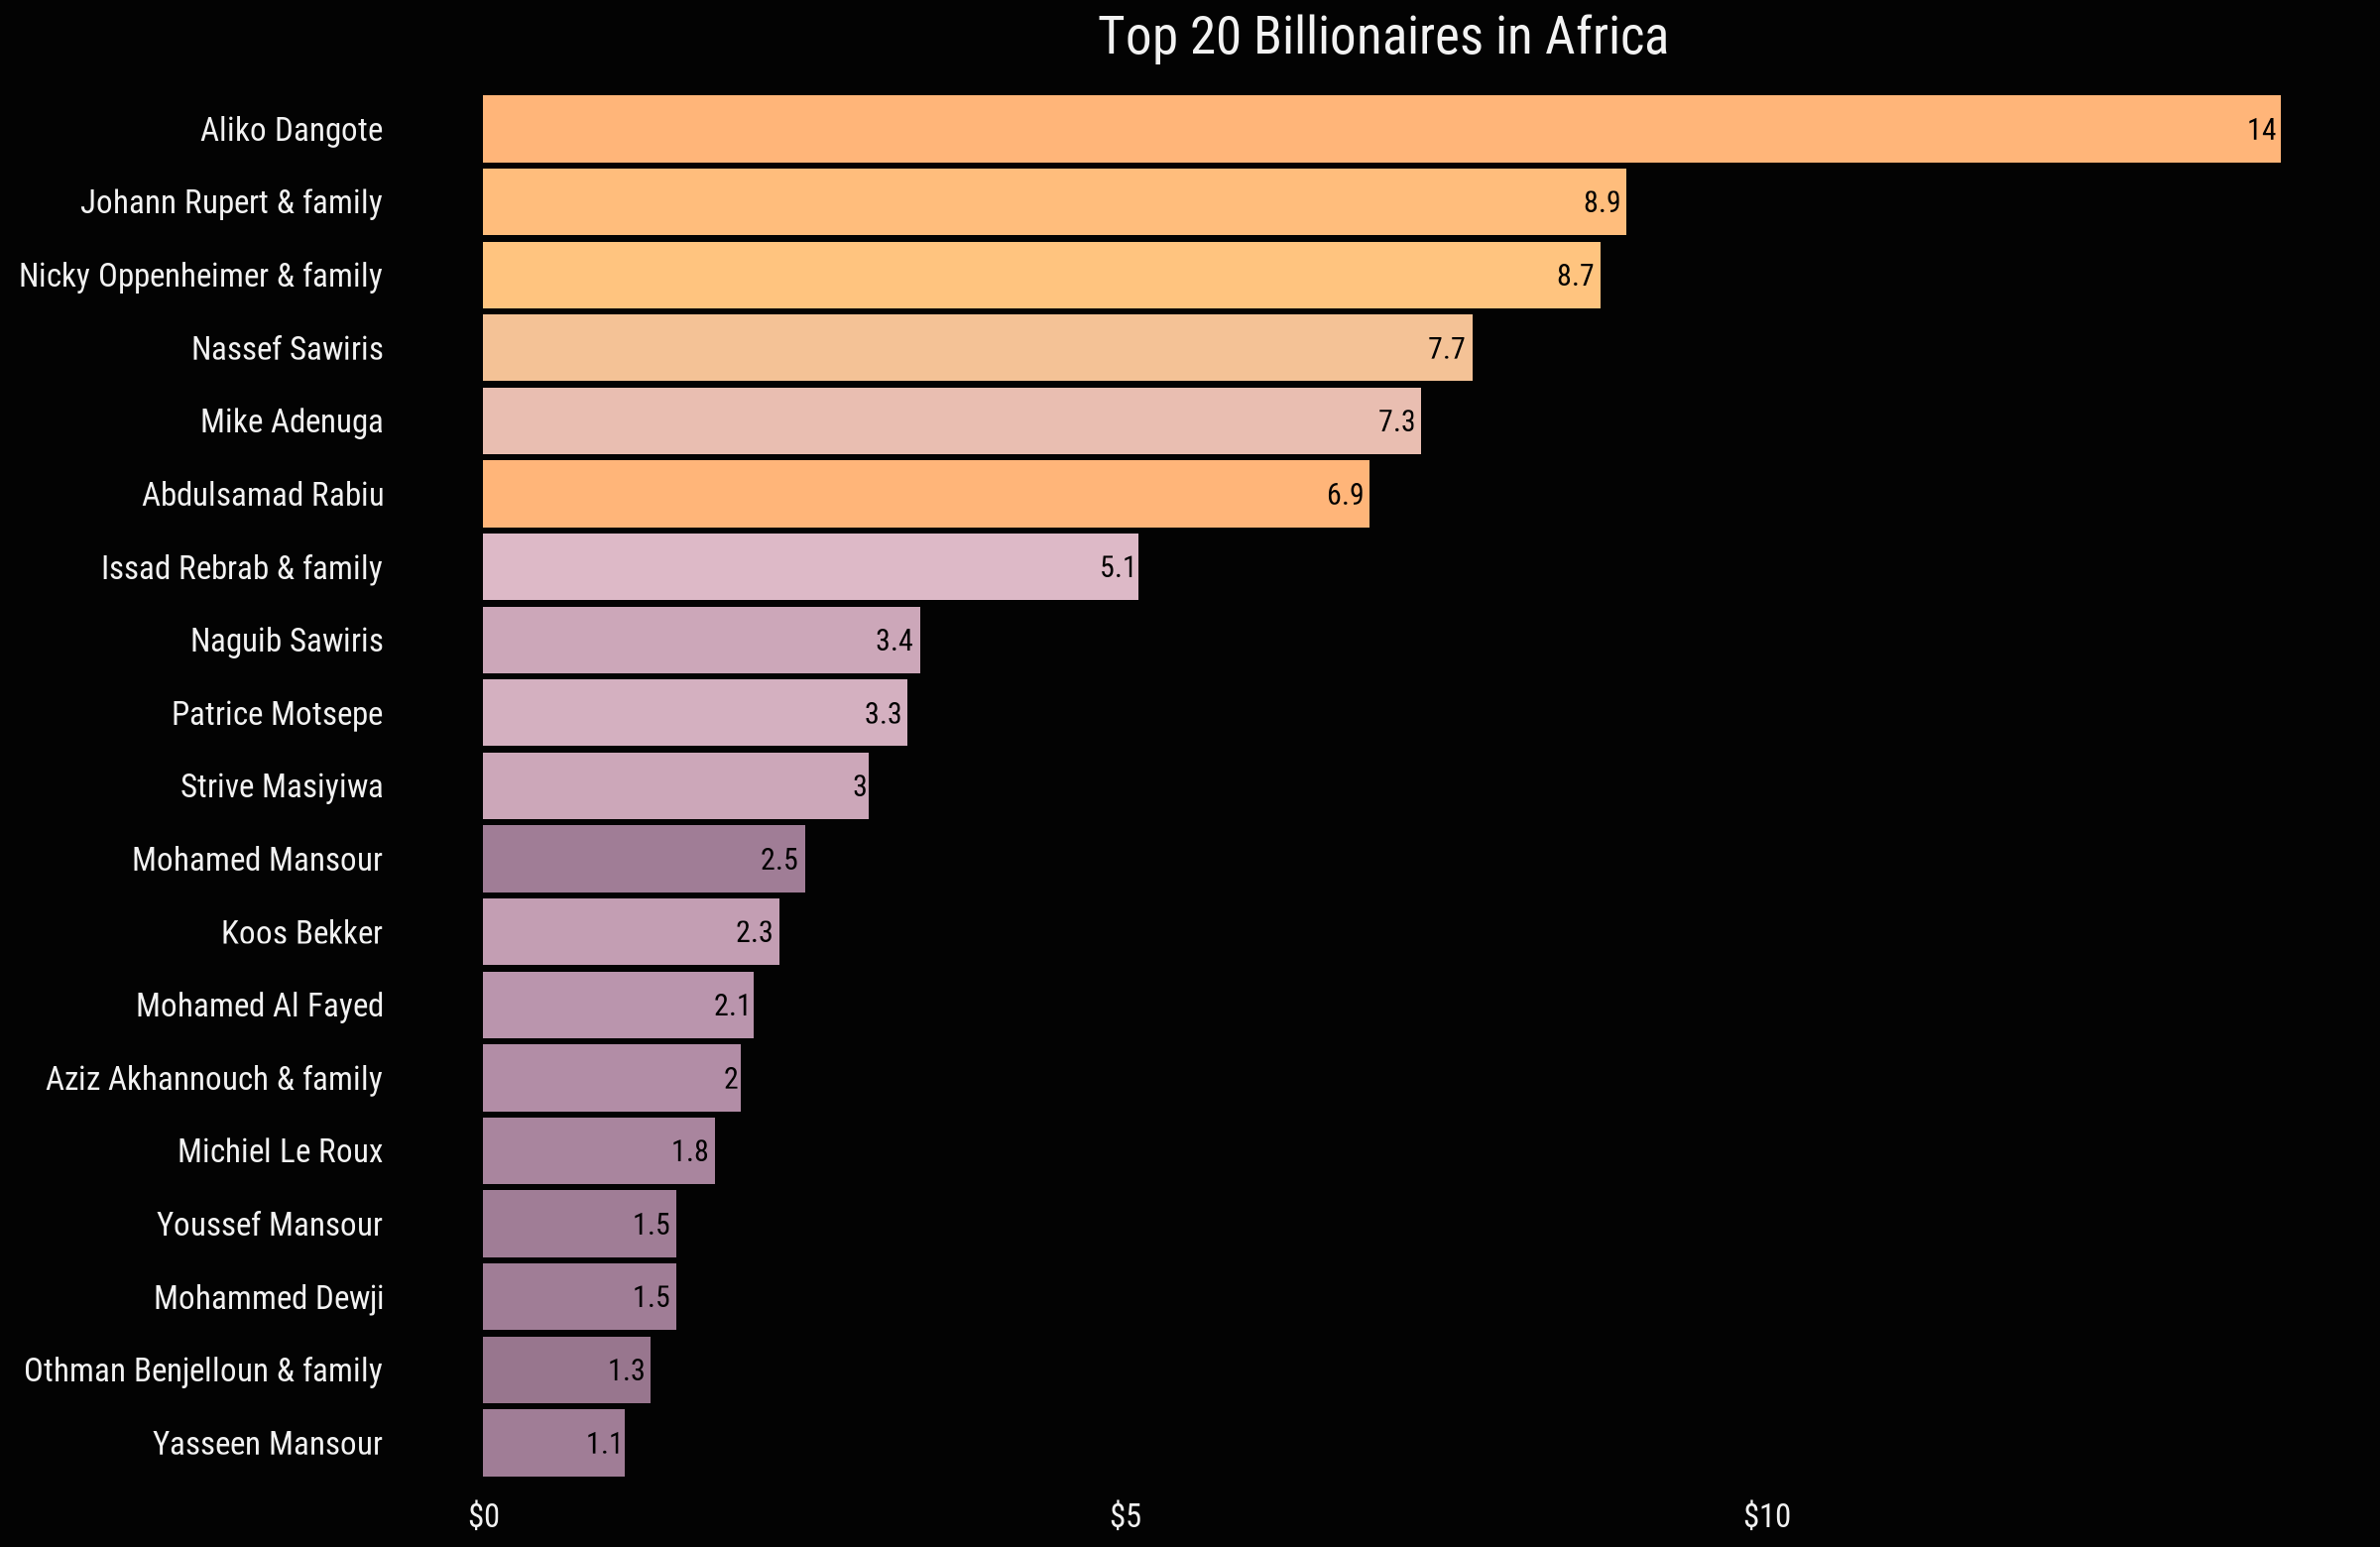

In [117]:
africa <- final %>%
filter(region == "Africa")%>%
arrange(desc(Networth))%>%
head(20)%>%
ggplot(aes(fct_reorder(Name,Networth),Networth, fill = fct_reorder(Source,Networth)))+
geom_bar(stat = "identity")+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
scale_y_continuous(labels = scales::dollar)+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = Networth), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Top 20 Billionaires in Africa")
africa

# Age Distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



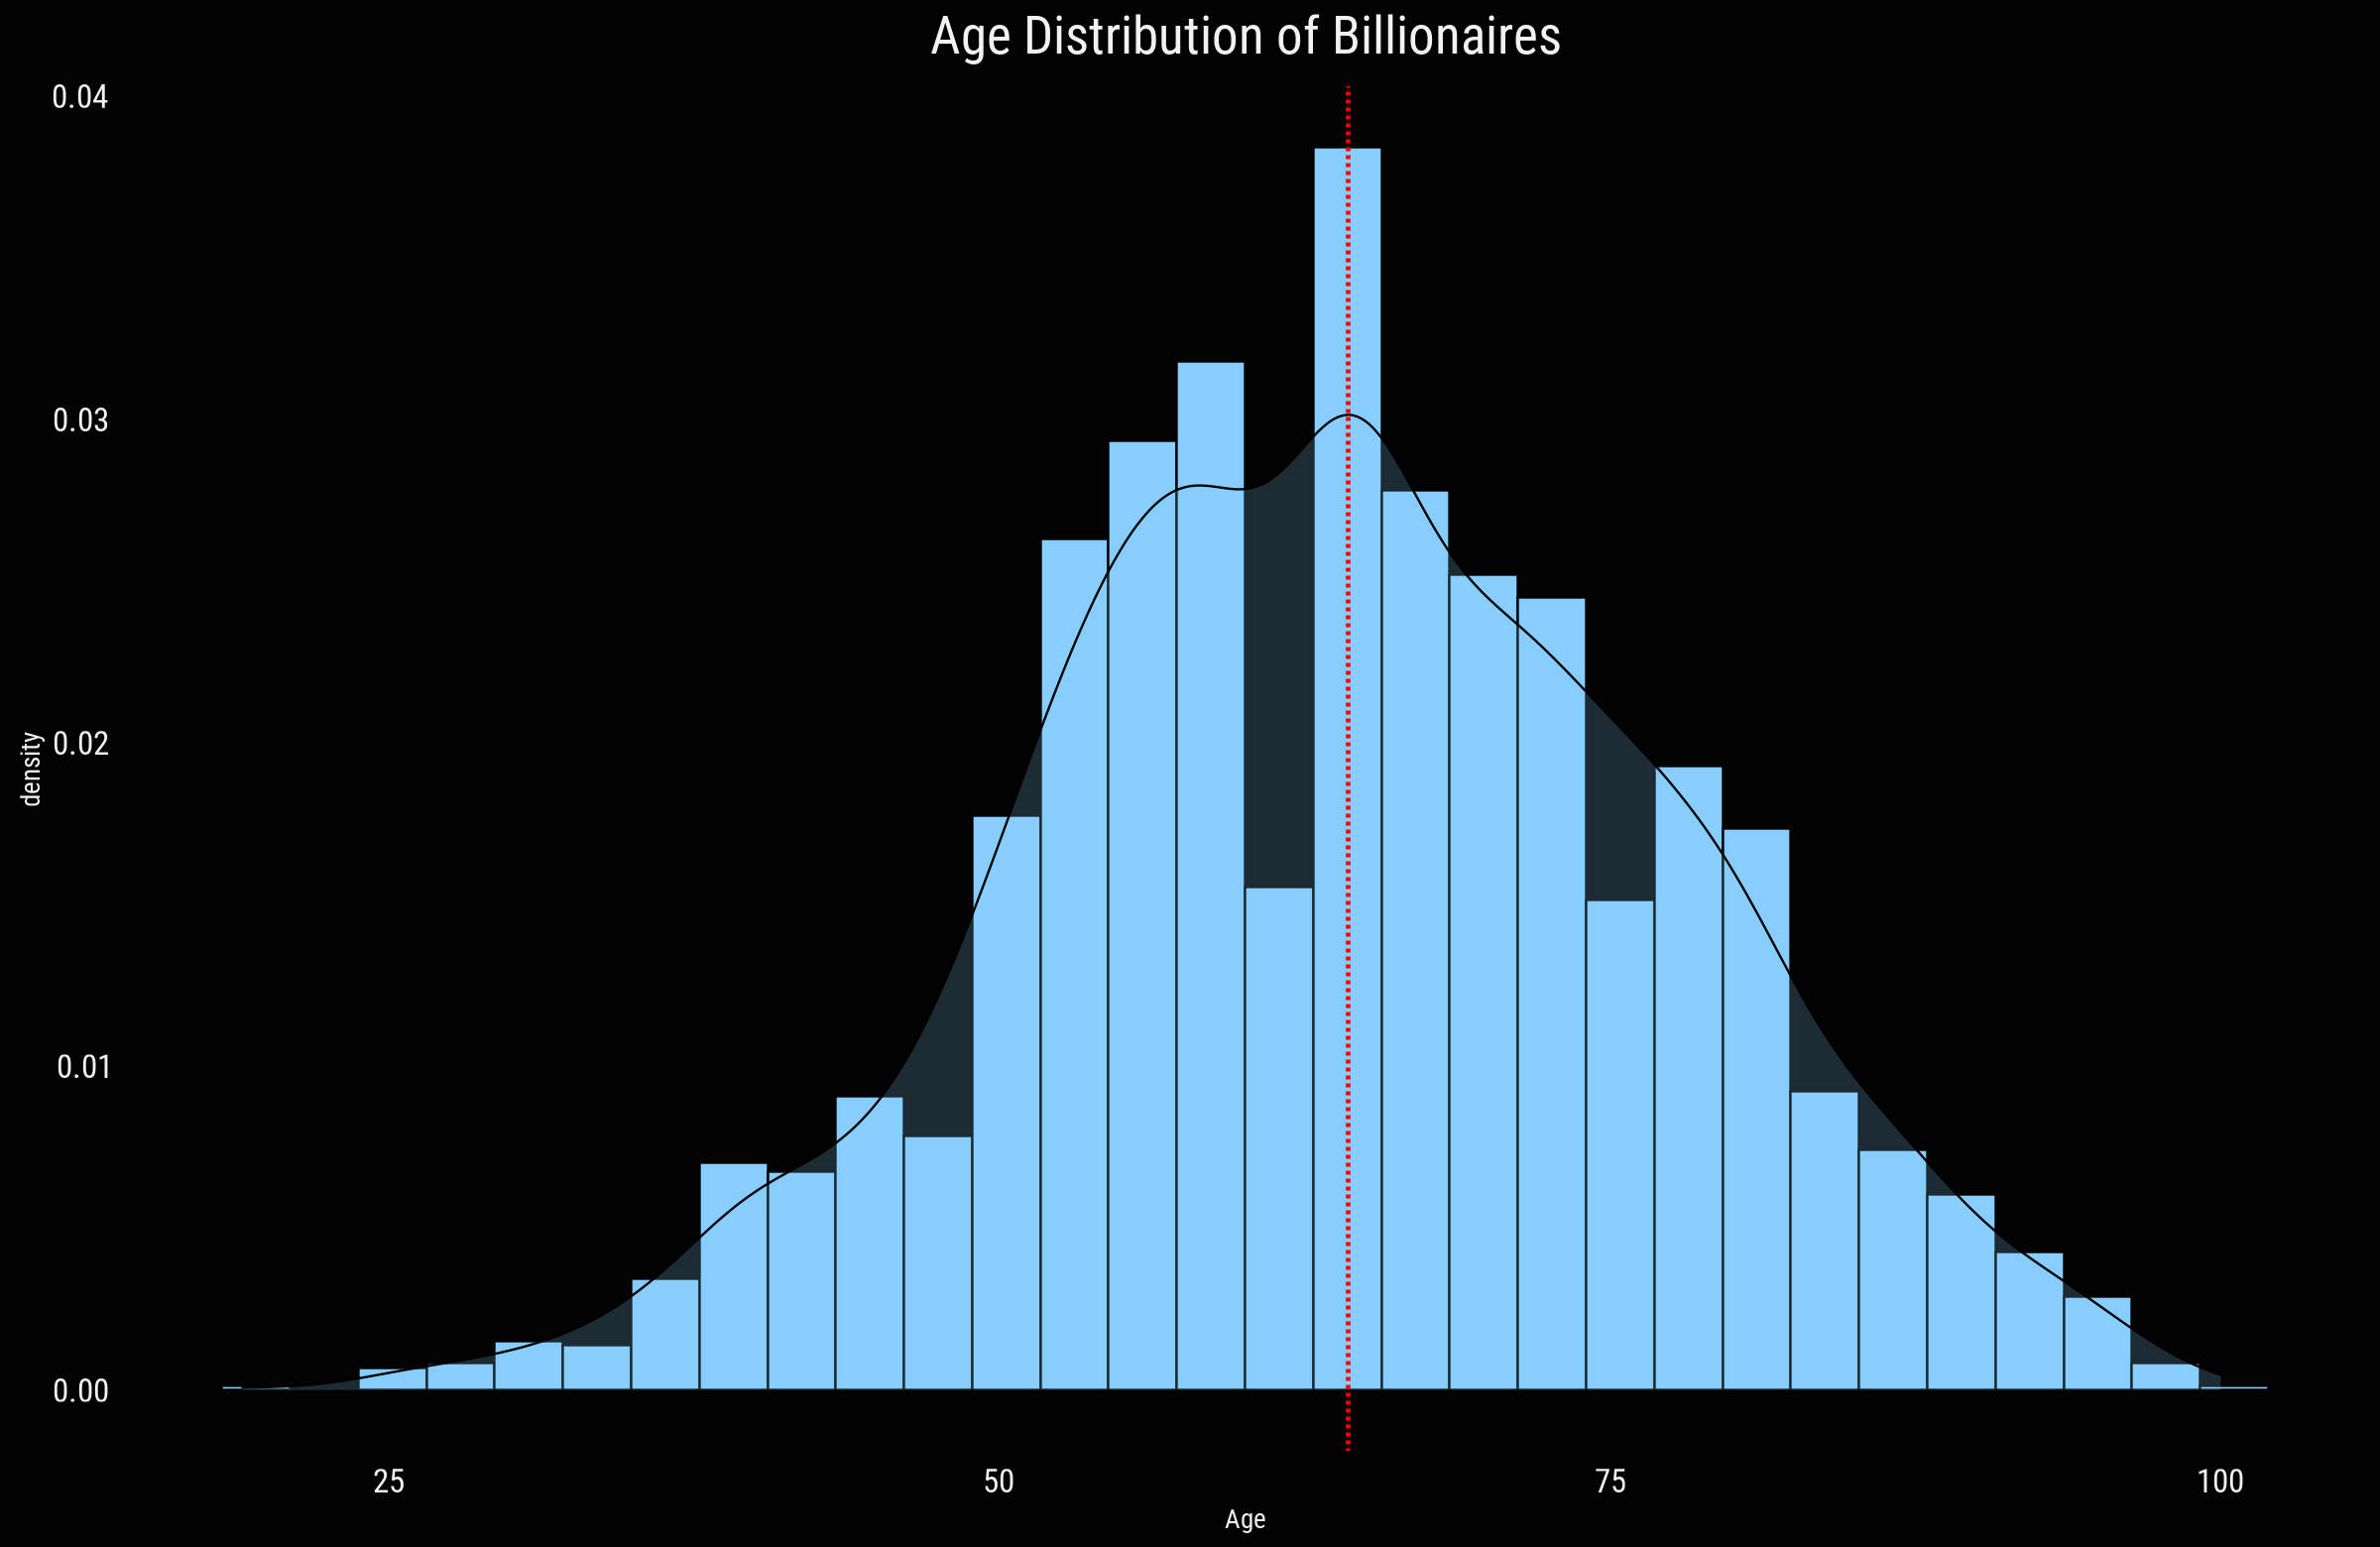

In [45]:
library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

p <-ggplot(final, aes(x=Age)) + 
geom_histogram(aes(y=..density..), color="black", fill="#87CEFF")+
geom_density(alpha=.2, fill="#87CEFF")+
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1)+
my_theme()+
labs(title = "Age Distribution of Billionaires")
p

# Top 10 Billionaires in the world according to Net Worth

In [47]:
name <- c("Mukesh Ambani","Steve Ballmer","Larry Ellison","Sergey Brin","Larry Page",
         "Warren Buffet","Bill Gates","Bernard Arnault and Family","Jeff Bezos","Elon Musk")
networth <- c(90.7,91.4,106.0,107.0,111.0,118.0,129.0,158.0,171.0,219.0)
source <- c("diversified","Microsoft","software","Google","Google","Berkshire Hathway","Microsoft","LVMH","Amazon","Tesla,SpcaeX")
images <- c("../input/billionare/mukesh ambani fig.png","../input/billionare/Steve-Ballmer-fig.png","../input/billionare/larry ellison fig.png","../input/billionare/sergey-brin-fig.png","../input/billionare/Larry page fig.png",
           "../input/billionare/warren buffet fig.png","../input/billionare/bill gates fig.png","../input/billionare/bernard-arnault fig.png","../input/billionare/jeff bezos fig.png","../input/elon-musk/elon musk figma.png")

dataframe <- data.frame(name, networth,source, images)
dataframe

name                       networth source           
1  Mukesh Ambani               90.7    diversified      
2  Steve Ballmer               91.4    Microsoft        
3  Larry Ellison              106.0    software         
4  Sergey Brin                107.0    Google           
5  Larry Page                 111.0    Google           
6  Warren Buffet              118.0    Berkshire Hathway
7  Bill Gates                 129.0    Microsoft        
8  Bernard Arnault and Family 158.0    LVMH             
9  Jeff Bezos                 171.0    Amazon           
10 Elon Musk                  219.0    Tesla,SpcaeX     
   images                                     
1  ../input/billionare/mukesh ambani fig.png  
2  ../input/billionare/Steve-Ballmer-fig.png  
3  ../input/billionare/larry ellison fig.png  
4  ../input/billionare/sergey-brin-fig.png    
5  ../input/billionare/Larry page fig.png     
6  ../input/billionare/warren buffet fig.png  
7  ../input/billionare/bill gates fig.png     
8  ../input/billionare/bernard-arnault fig.png
9  ../input/billionare/jeff bezos fig.png     
10 ../input/elon-musk/elon musk figma.png

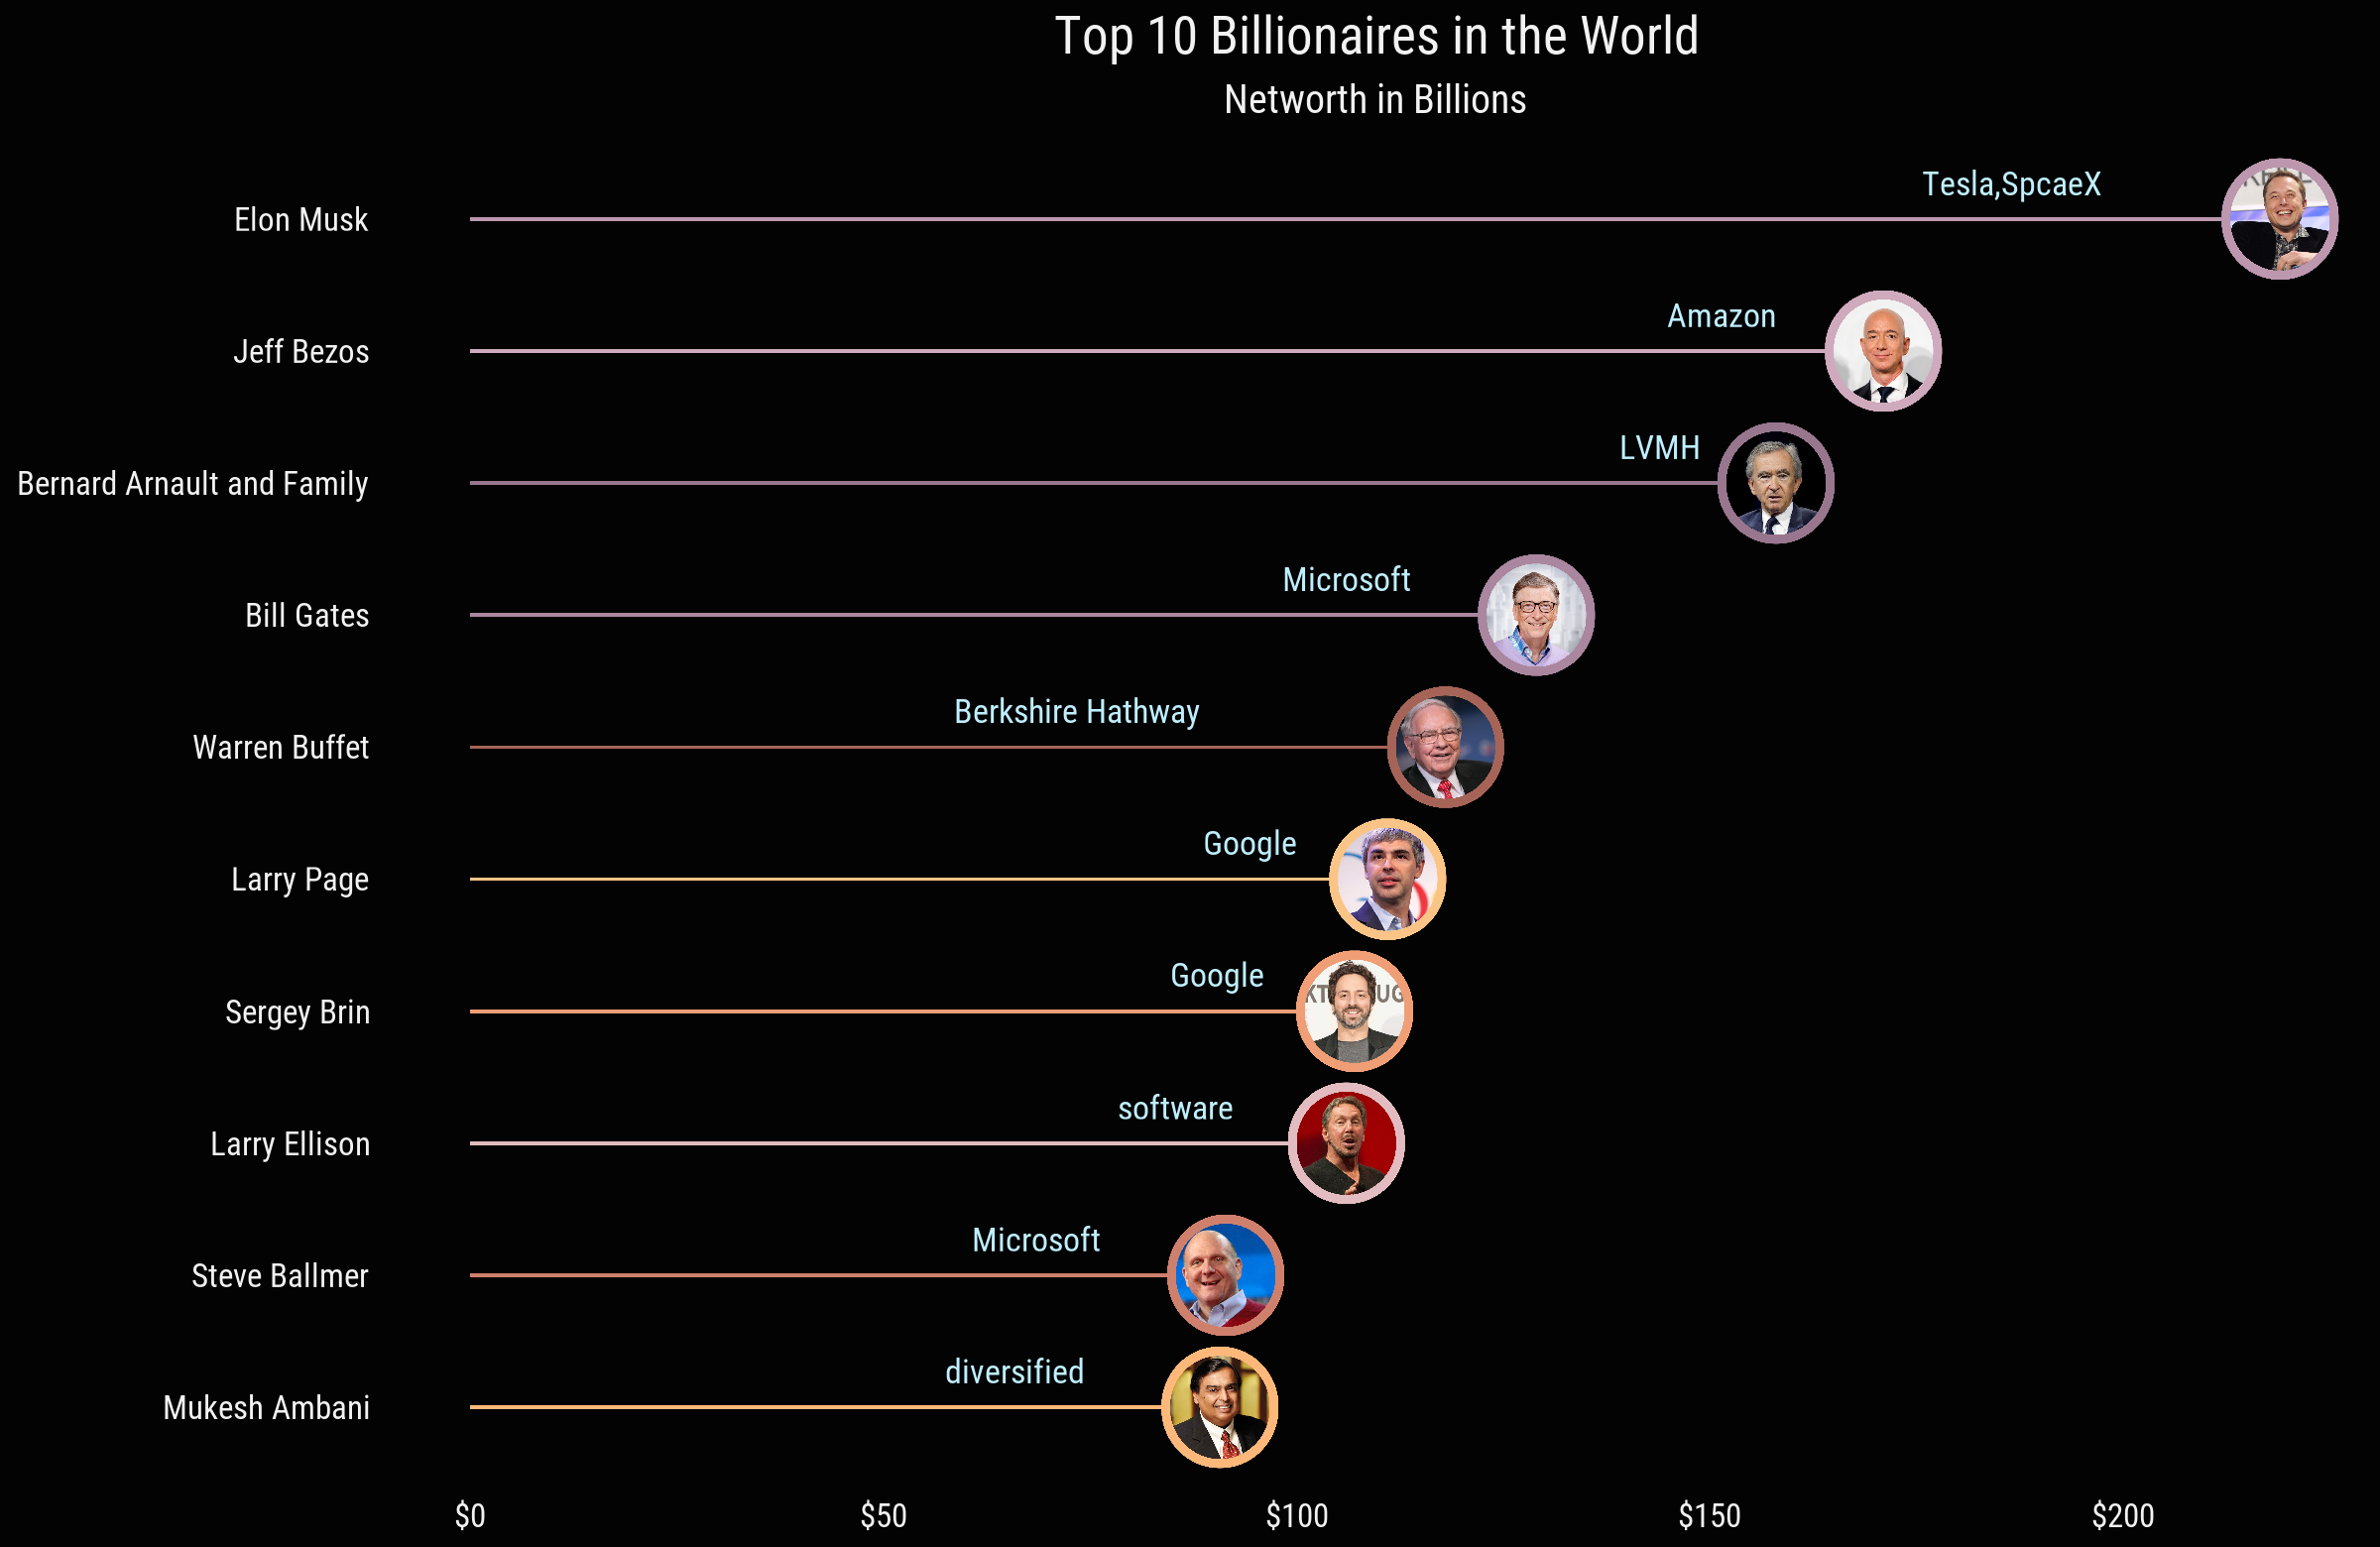

In [93]:
library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

dataframe %>%
ggplot(aes(reorder(name,networth),networth,fill = name))+
geom_bar(stat = 'identity', width = 0.02)+ 
geom_image(mapping=aes(y=networth, x=name, image=images,  color=name), size=0.059, asp=1.5)+
geom_image(mapping=aes(y=networth, x=name, image=images), size=0.05, asp=1.5)+
geom_text(aes(label = source), size = 9,hjust = 2, vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
scale_y_continuous(labels = scales::dollar)+
scale_fill_manual(values = met.brewer("Morgenstern",10))+
scale_color_manual(values = met.brewer("Morgenstern",10))+
coord_flip()+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
labs(title = "Top 10 Billionaires in the World",
    subtitle = "Networth in Billions")

# Top 10 Billionaires in India 

In [50]:
name <- c("Mukesh Ambani","Gautam Adani & family","Shiv Nadar","Cyrus Poonawalla","Radhakishan Damani ",
         "Lakshmi Mittal","Savitri Jindal & family","Kumar Birla","Dilip Shanghvi","Uday Kotak ")
networth <- c(90.7,90.0,28.7,24.3,20.0,17.9,17.7,16.5,15.6,14.3)
source <- c("diversified","diversified","Technology","Healthcare","Fashion & Retail","Metals & Mining","Metals & Mining",
           "diversified","Healthcare","Finance & Investments")
images <- c("../input/billionare/mukesh ambani fig.png","../input/indian-billionaires/gautam adani fig.png","../input/indian-billionaires/shiv nadar fig.png","../input/indian-billionaires/cyrus-poonawalla fig.png","../input/indian-billionaires/Radhakishan-Damani fig.png",
           "../input/indian-billionaires/Lakshmi-Mittal fig.png","../input/indian-billionaires/SAVITRI-JINDAL-fig.png","../input/indian-billionaires/kumar biral fig.png","../input/indian-billionaires/Dilip-Shanghvi1-1-fig.png","../input/indian-billionaires/uday-kotak fig.png")

d1 <- data.frame(name, networth,source, images)
d1

name                    networth source               
1  Mukesh Ambani           90.7     diversified          
2  Gautam Adani & family   90.0     diversified          
3  Shiv Nadar              28.7     Technology           
4  Cyrus Poonawalla        24.3     Healthcare           
5  Radhakishan Damani      20.0     Fashion & Retail     
6  Lakshmi Mittal          17.9     Metals & Mining      
7  Savitri Jindal & family 17.7     Metals & Mining      
8  Kumar Birla             16.5     diversified          
9  Dilip Shanghvi          15.6     Healthcare           
10 Uday Kotak              14.3     Finance & Investments
   images                                                 
1  ../input/billionare/mukesh ambani fig.png              
2  ../input/indian-billionaires/gautam adani fig.png      
3  ../input/indian-billionaires/shiv nadar fig.png        
4  ../input/indian-billionaires/cyrus-poonawalla fig.png  
5  ../input/indian-billionaires/Radhakishan-Damani fig.png
6  ../input/indian-billionaires/Lakshmi-Mittal fig.png    
7  ../input/indian-billionaires/SAVITRI-JINDAL-fig.png    
8  ../input/indian-billionaires/kumar biral fig.png       
9  ../input/indian-billionaires/Dilip-Shanghvi1-1-fig.png 
10 ../input/indian-billionaires/uday-kotak fig.png

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



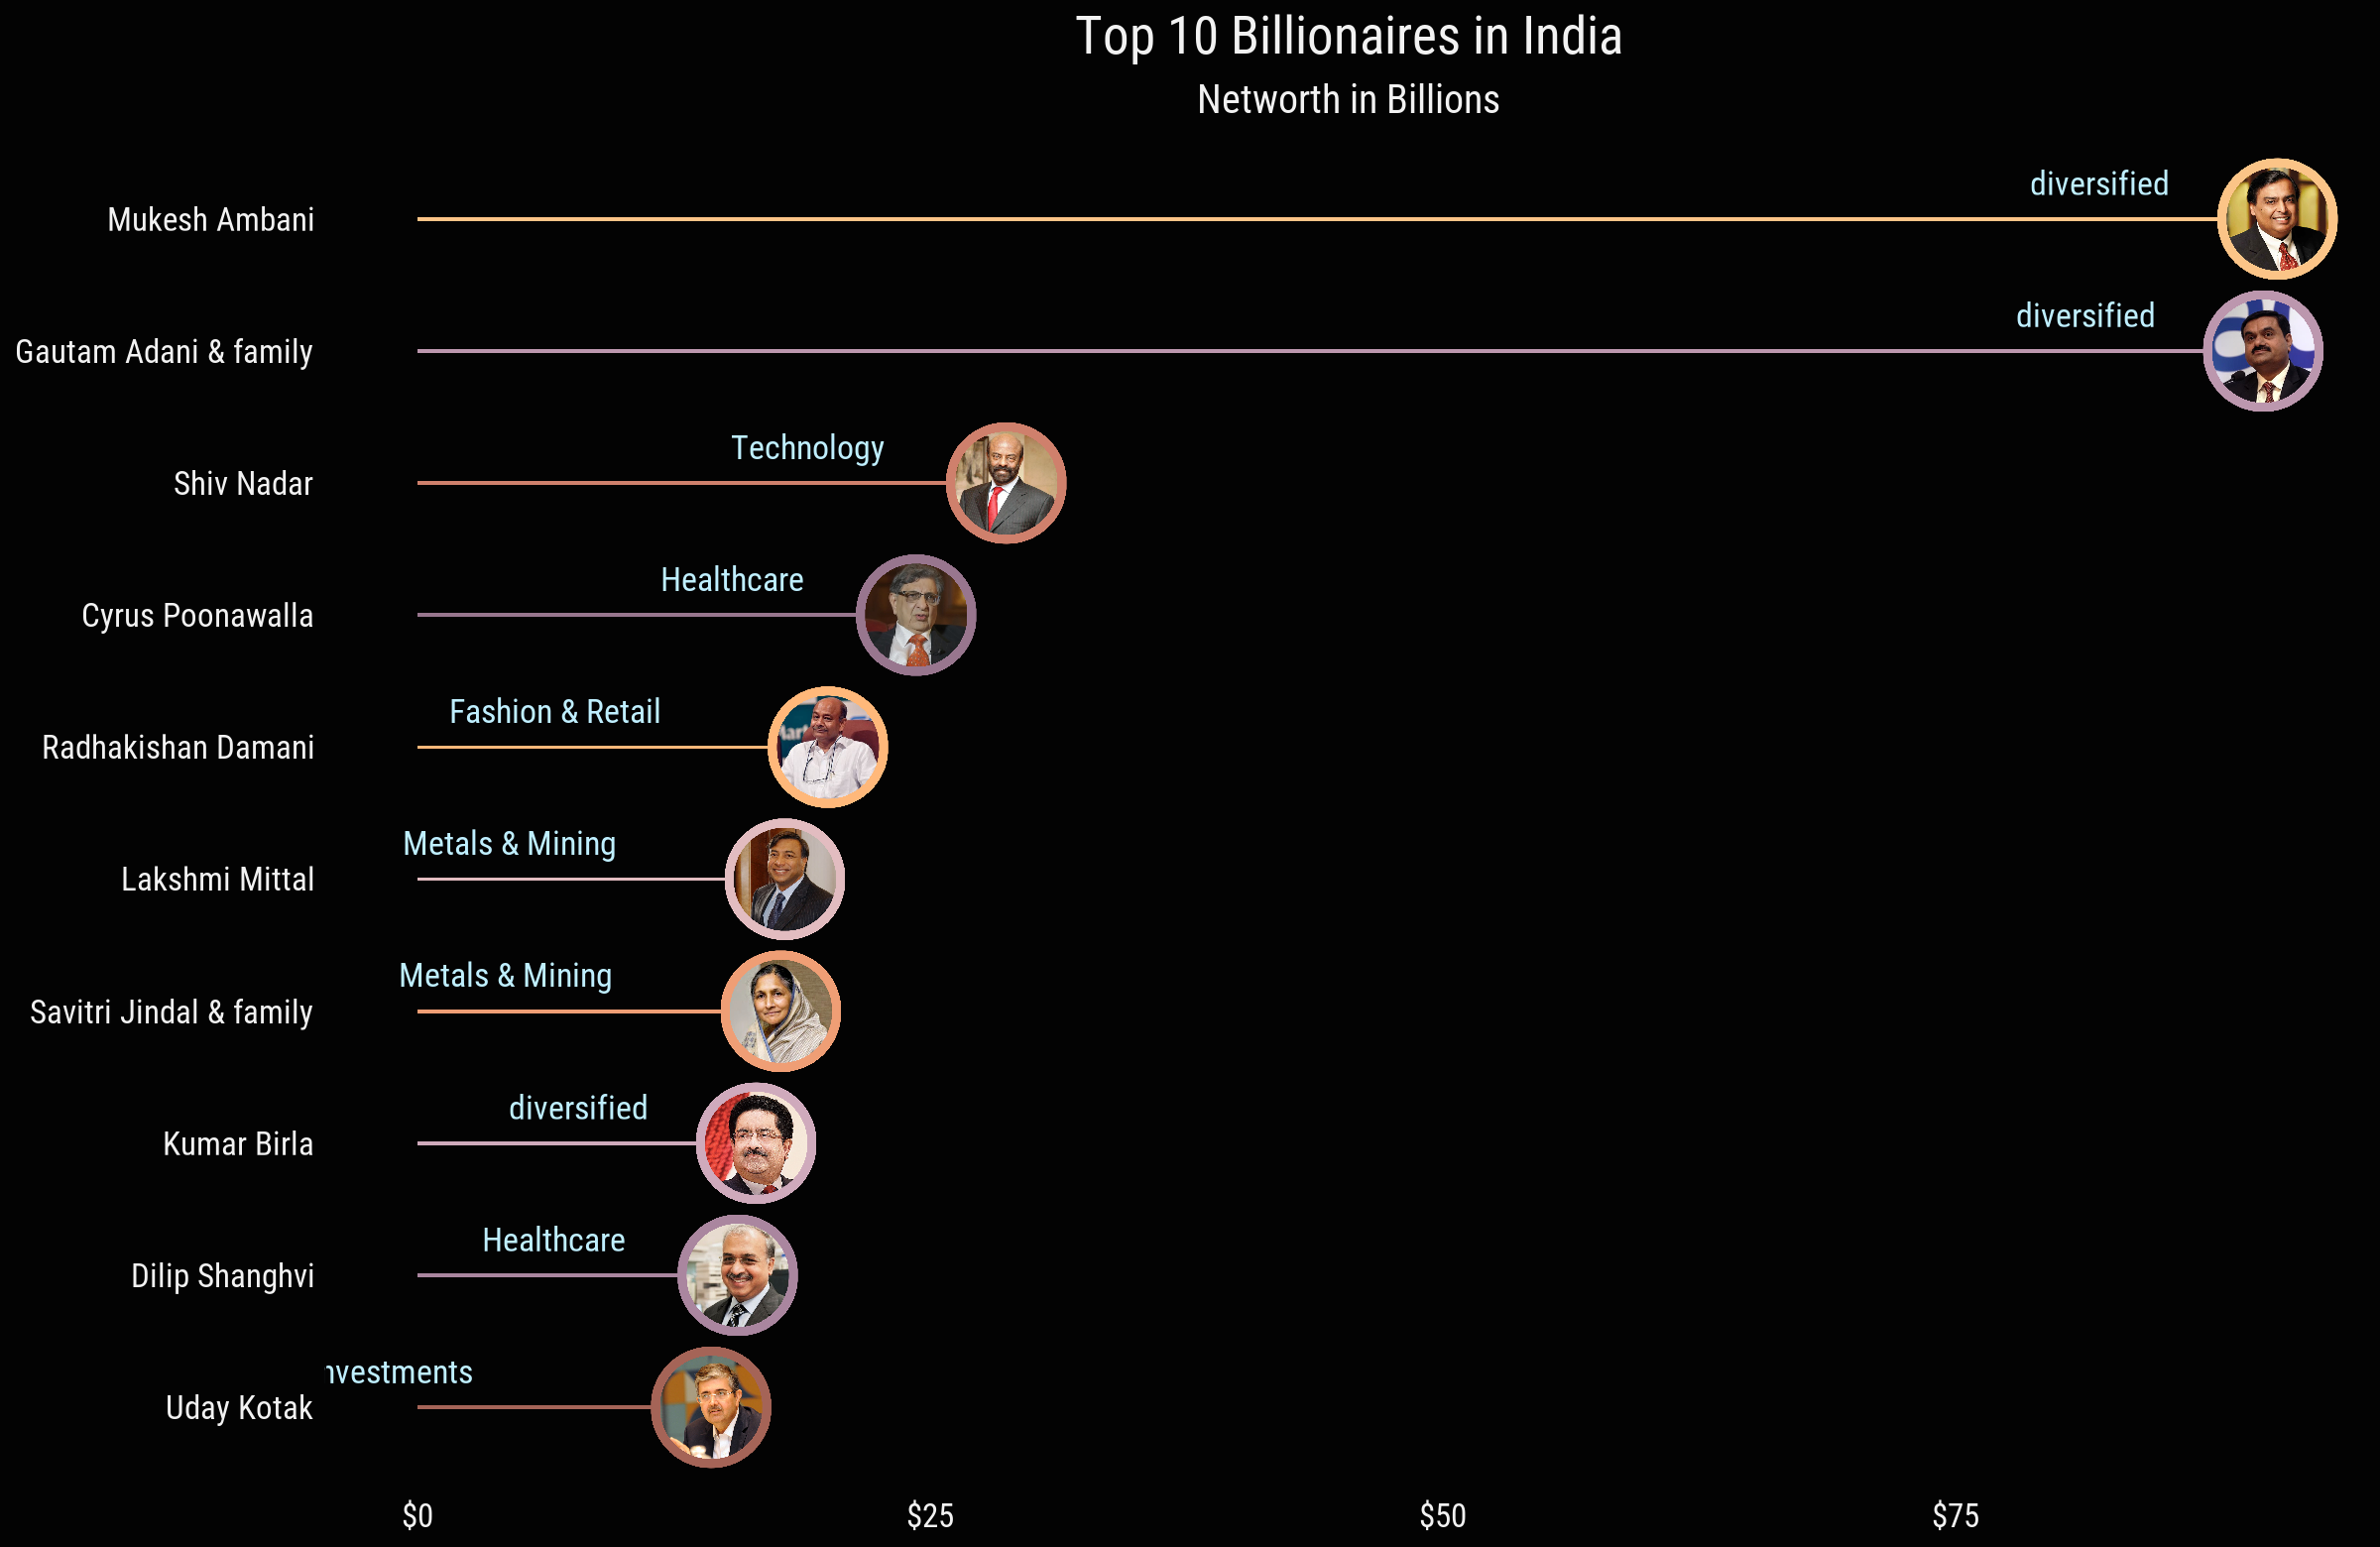

In [95]:
library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

d1 %>%
ggplot(aes(reorder(name,networth),networth, fill = name))+
geom_bar(stat = 'identity', width = 0.02)+ 
geom_image(mapping=aes(y=networth, x=name, image=images, color = name), size=0.059, asp=1.5)+
geom_image(mapping=aes(y=networth, x=name, image=images), size=0.05, asp=1.5)+
geom_text(aes(label = source), size = 9,hjust =1.8 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
coord_flip()+
scale_y_continuous(labels = scales::dollar)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",10))+
scale_color_manual(values = met.brewer("Morgenstern",10))+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
labs(title = "Top 10 Billionaires in India",
    subtitle = "Networth in Billions")

# Sources

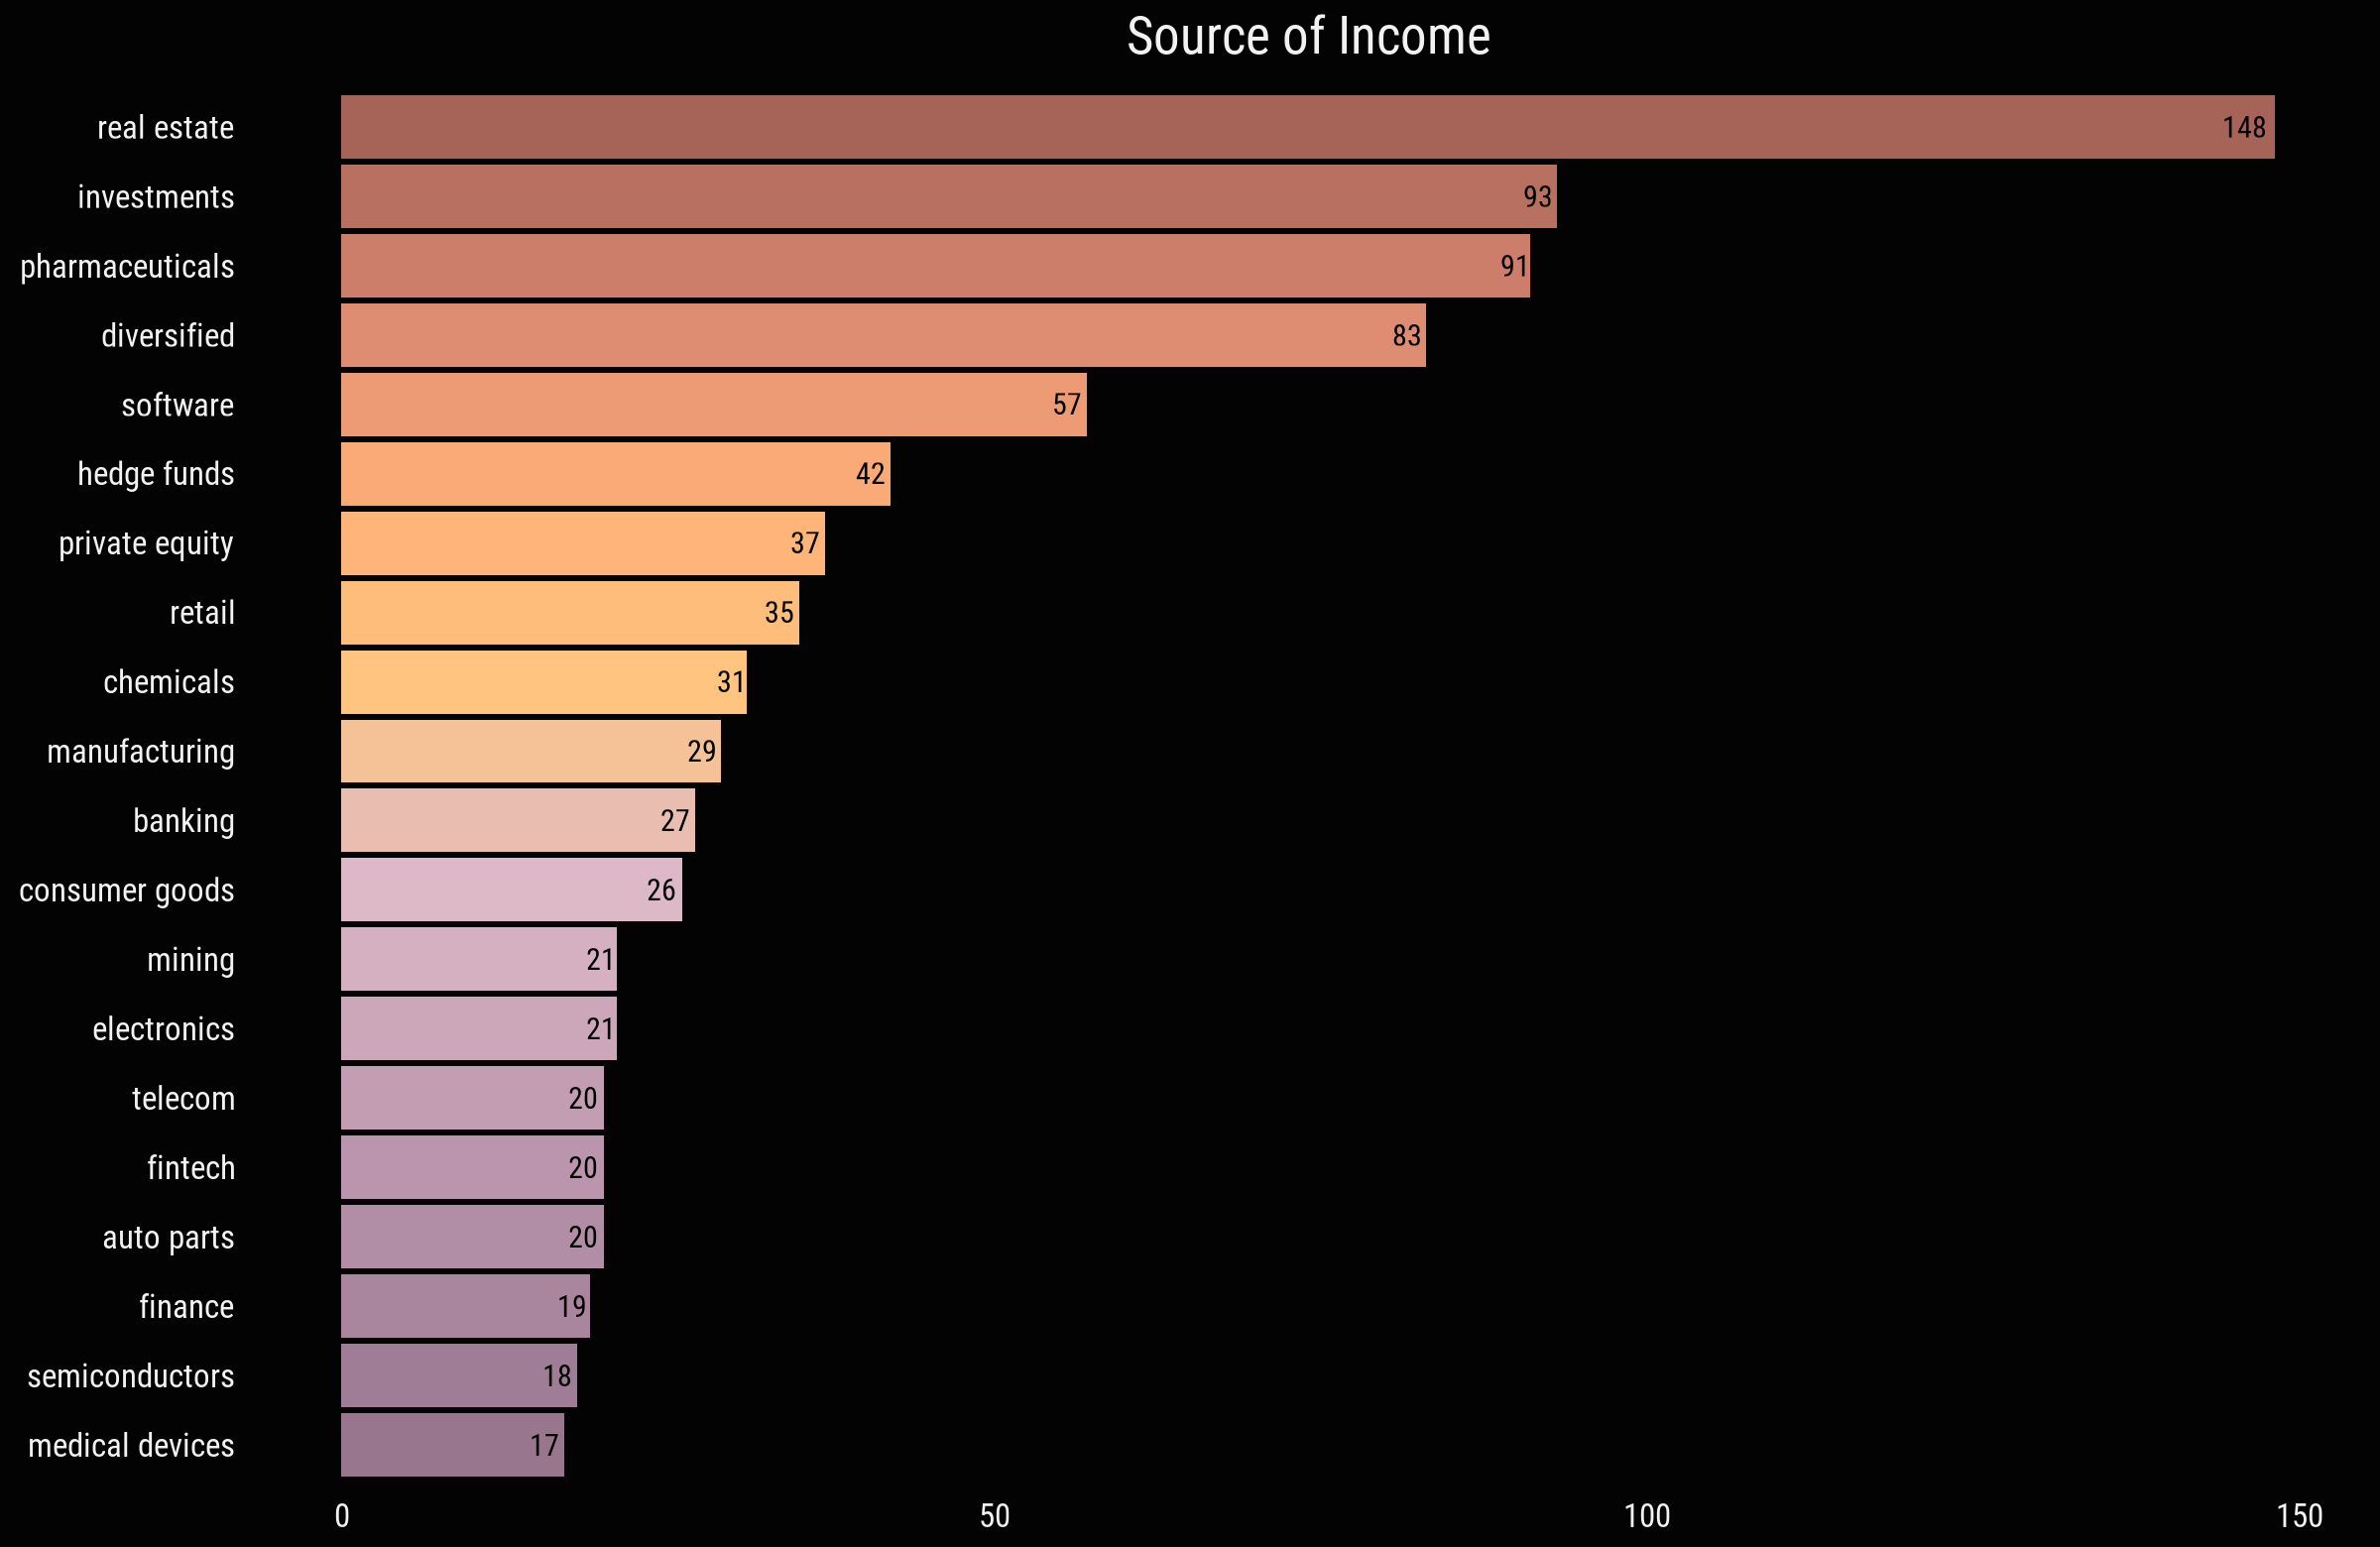

In [115]:
final %>%
count(Source, sort = TRUE)%>%
head(20)%>%
ggplot(aes(fct_reorder(Source,n),n, fill = fct_reorder(Source,n)))+
geom_bar(stat = "identity")+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = n), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Source of Income")

## Industry

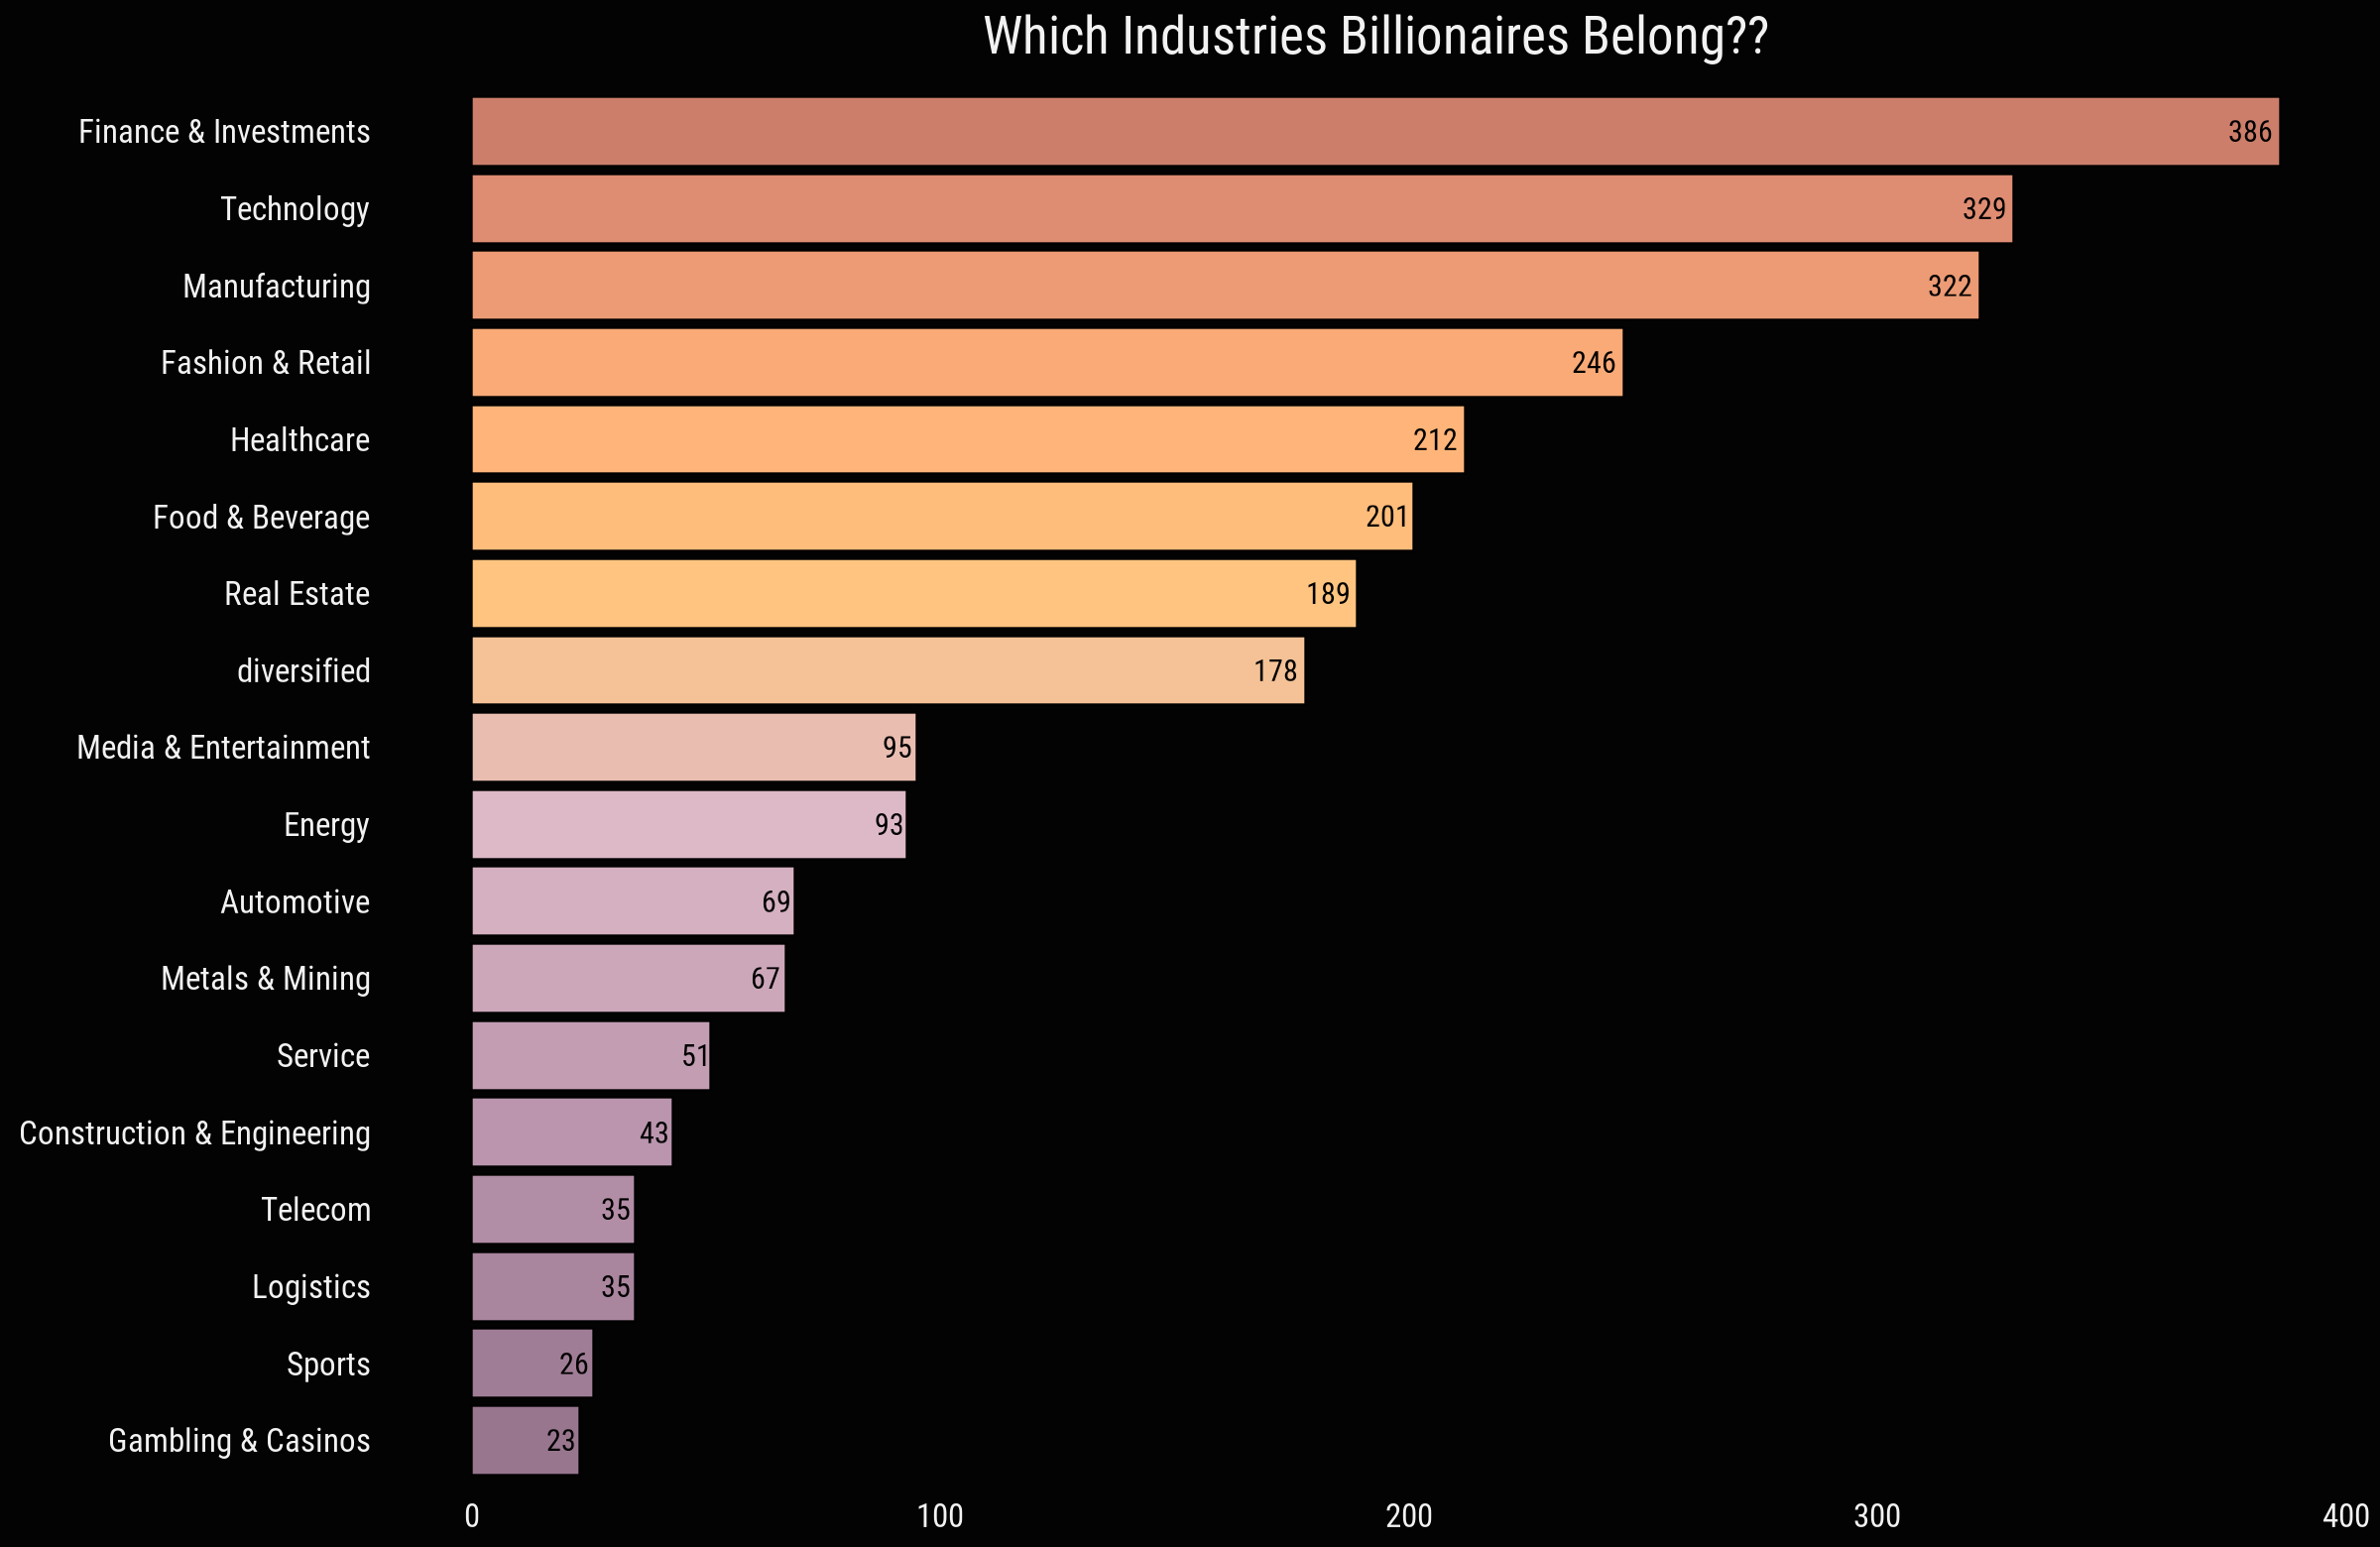

In [116]:
final %>%
count(Industry, sort = TRUE)%>%
ggplot(aes(fct_reorder(Industry,n),n, fill = fct_reorder(Industry,n)))+
geom_bar(stat = "identity", color = 'black')+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern",20))+
my_theme()+
theme(axis.title.y = element_blank())+
theme(axis.title.x = element_blank())+
geom_text(aes(label = n), size = 8, hjust = 1.2, color = 'black', fontface='bold', family = "Roboto")+
labs(title = "Which Industries Billionaires Belong??")

## Top 10 From Each Industry

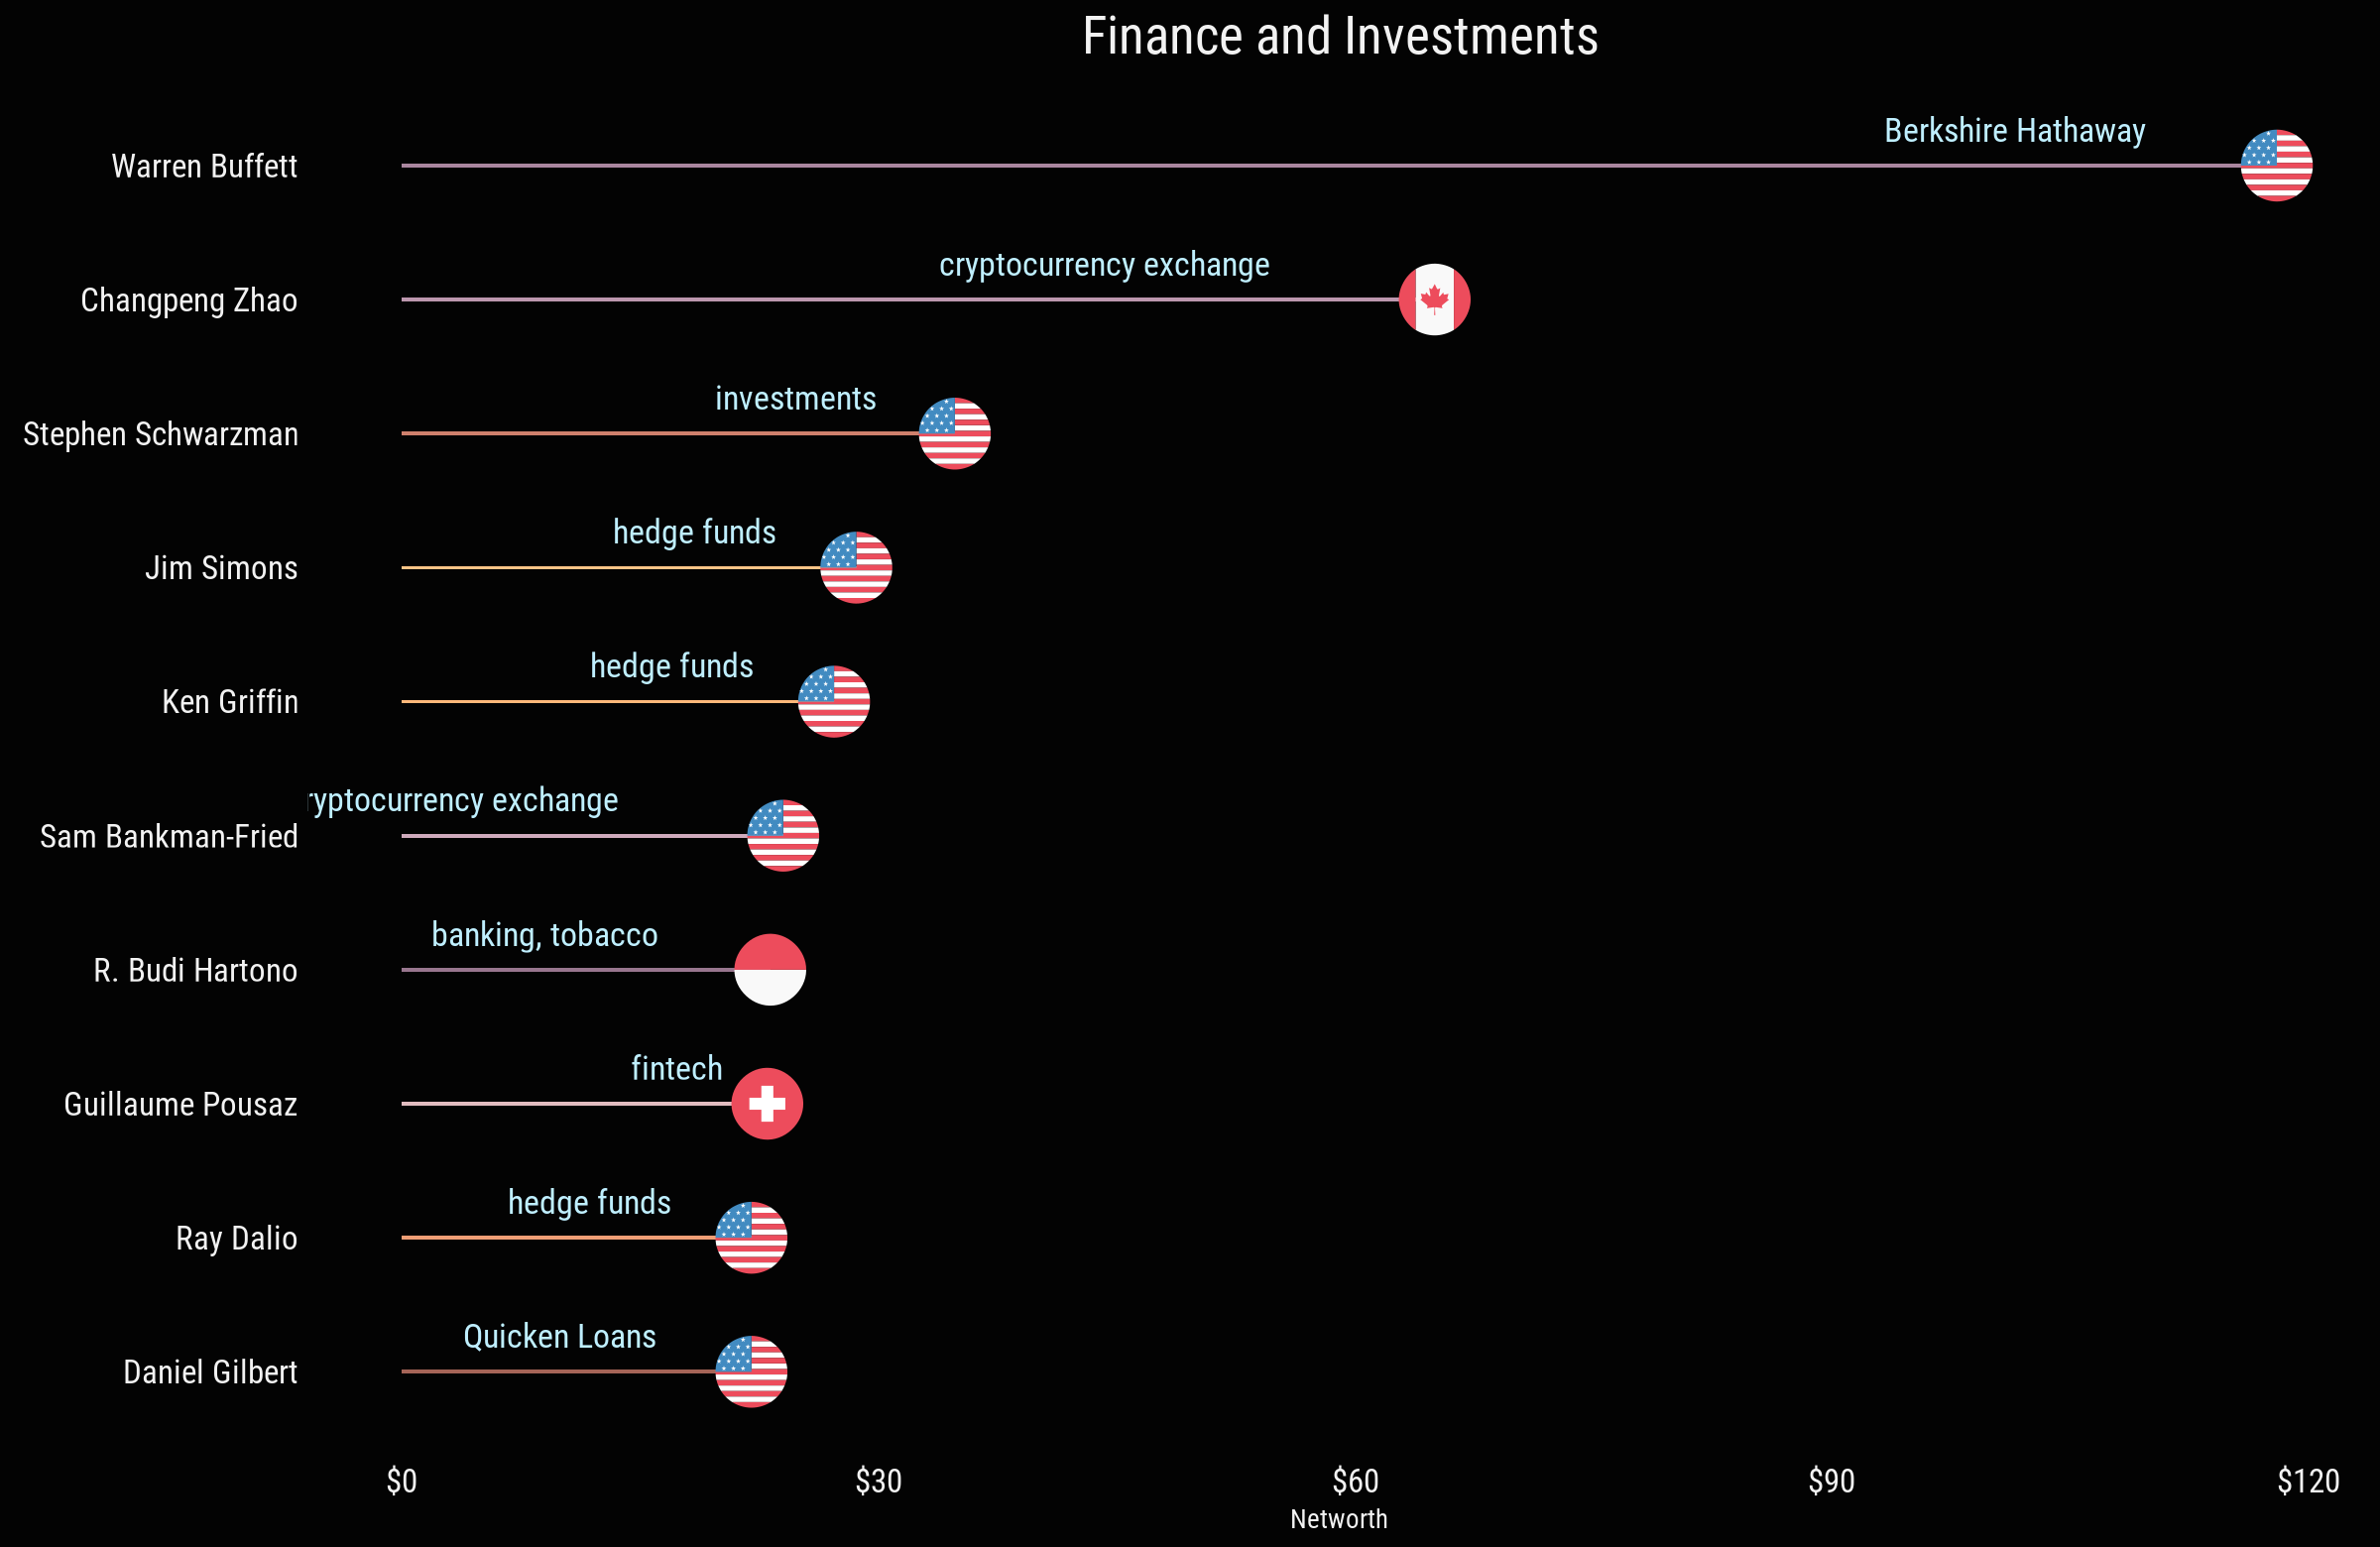

In [63]:
p1 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Finance & Investments")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Finance and Investments")
p1

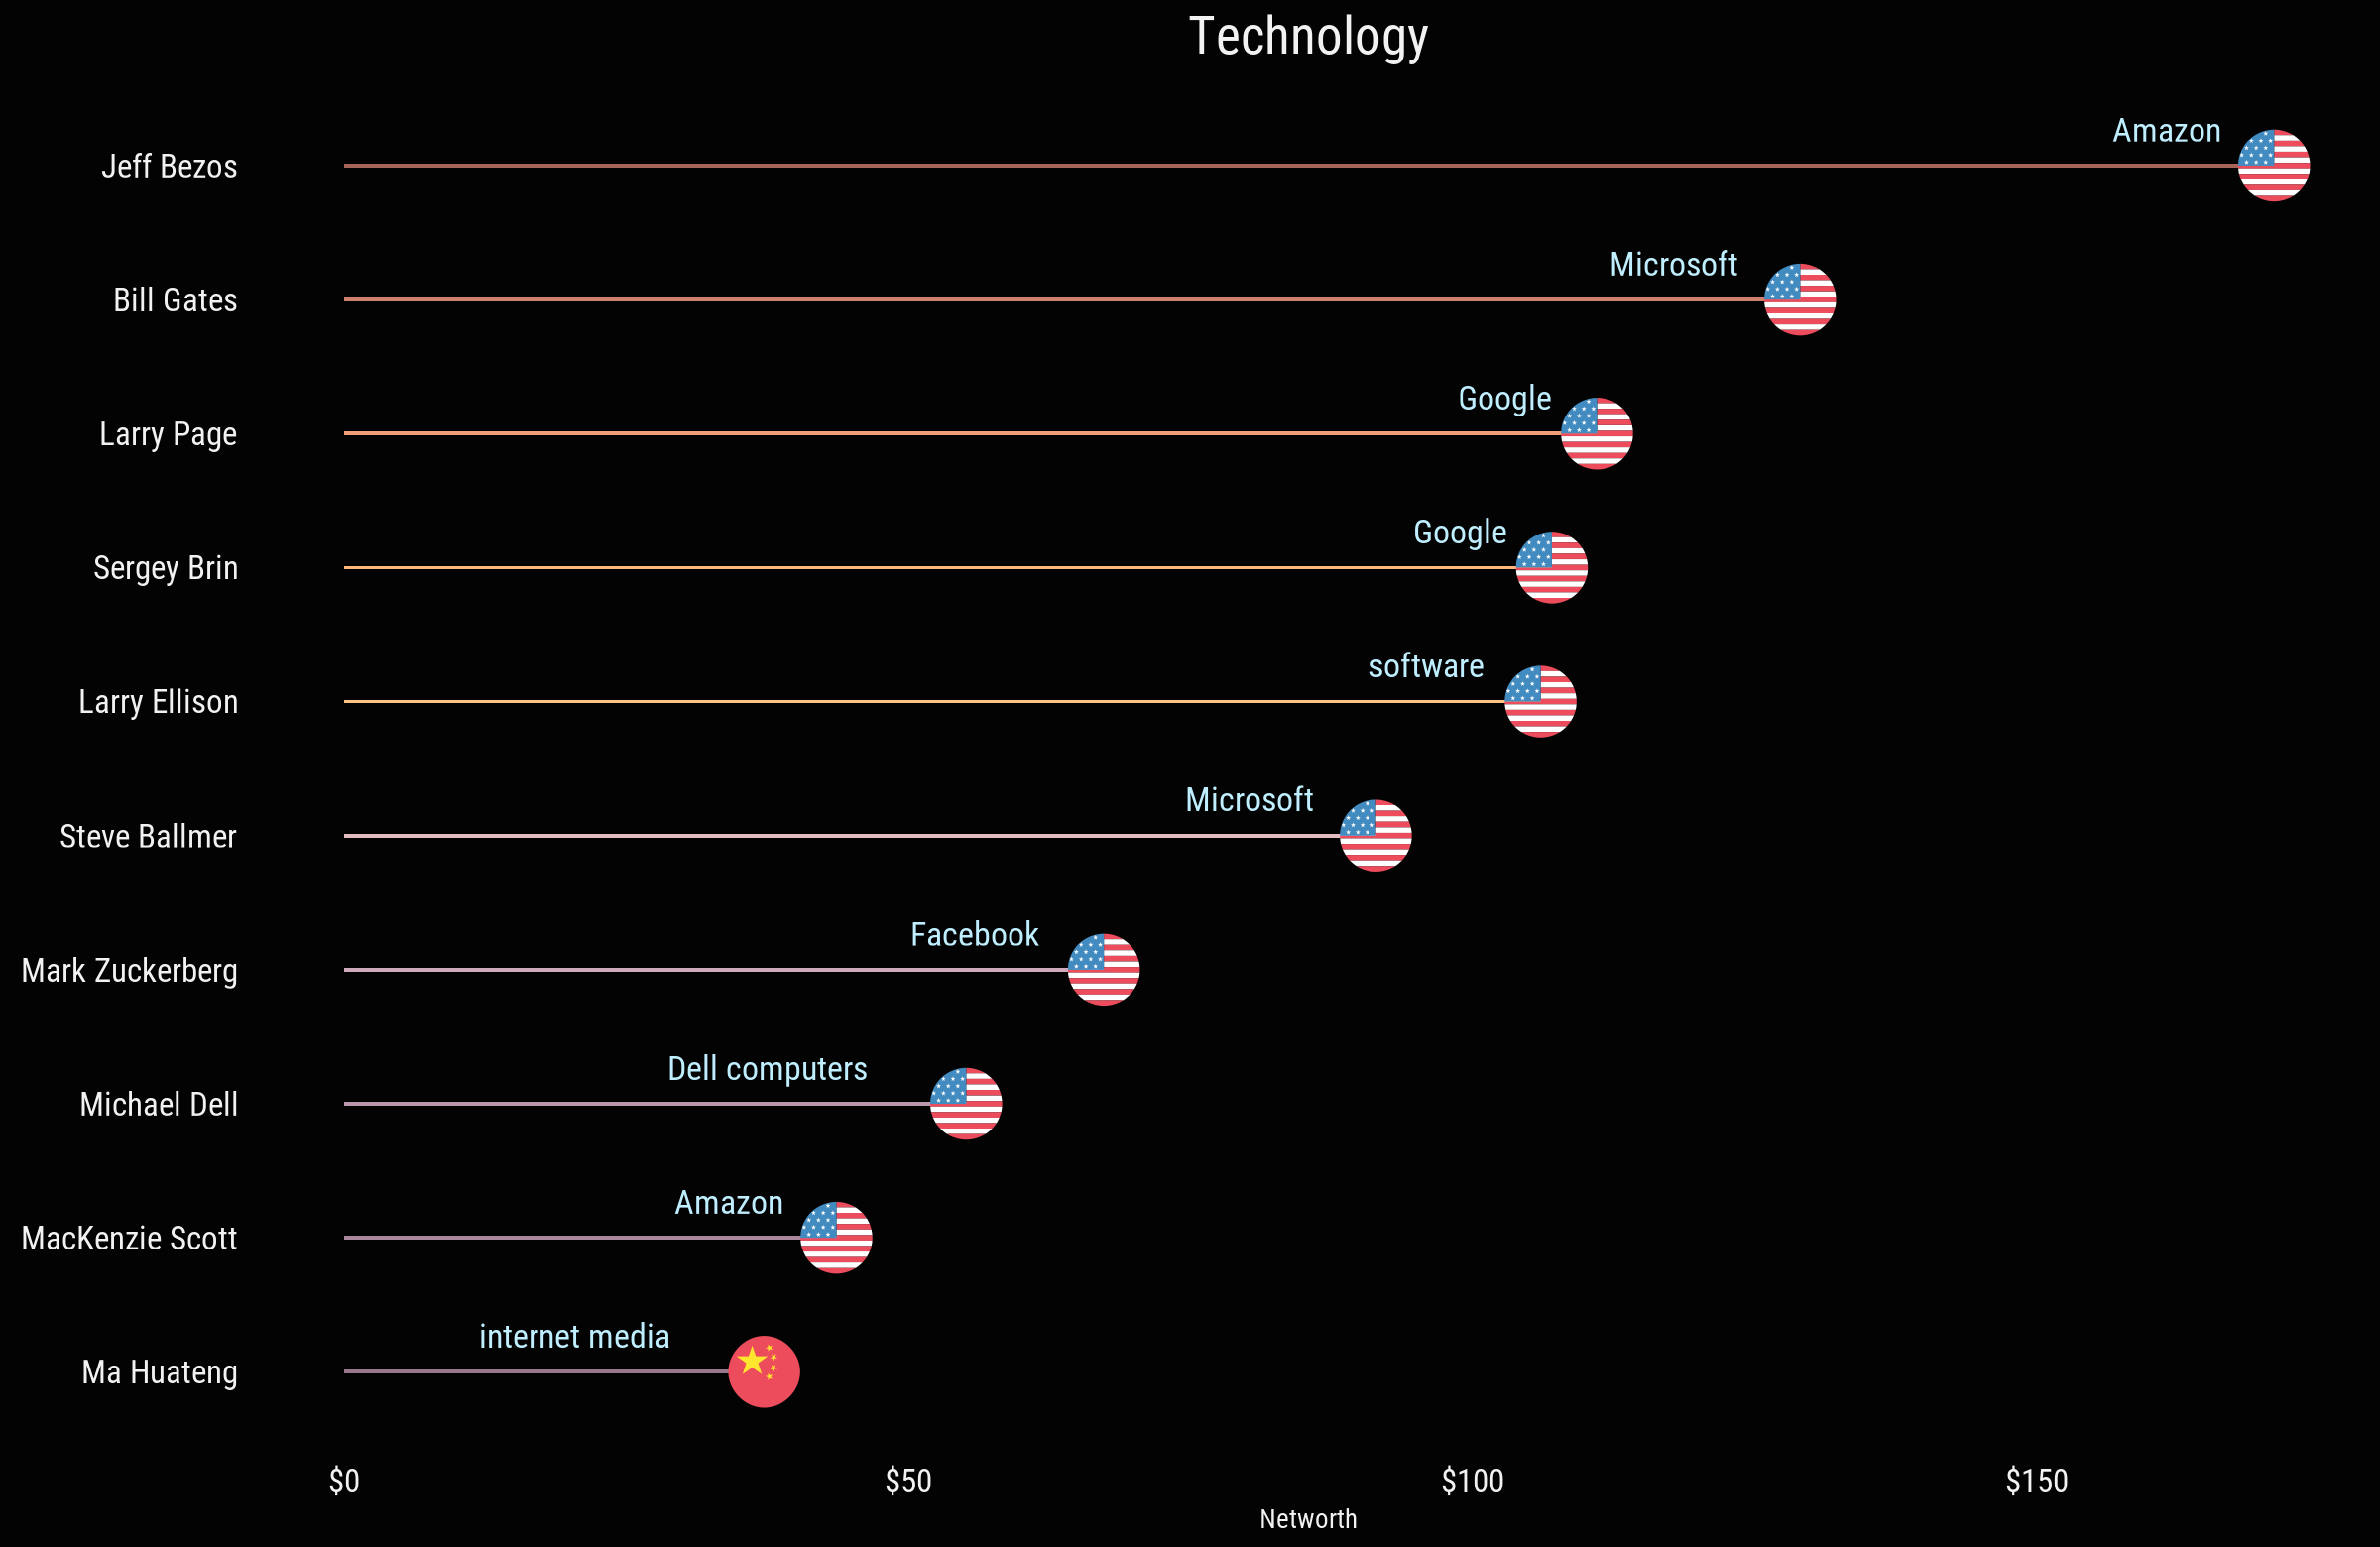

In [65]:
p2 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Technology")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Technology")
p2

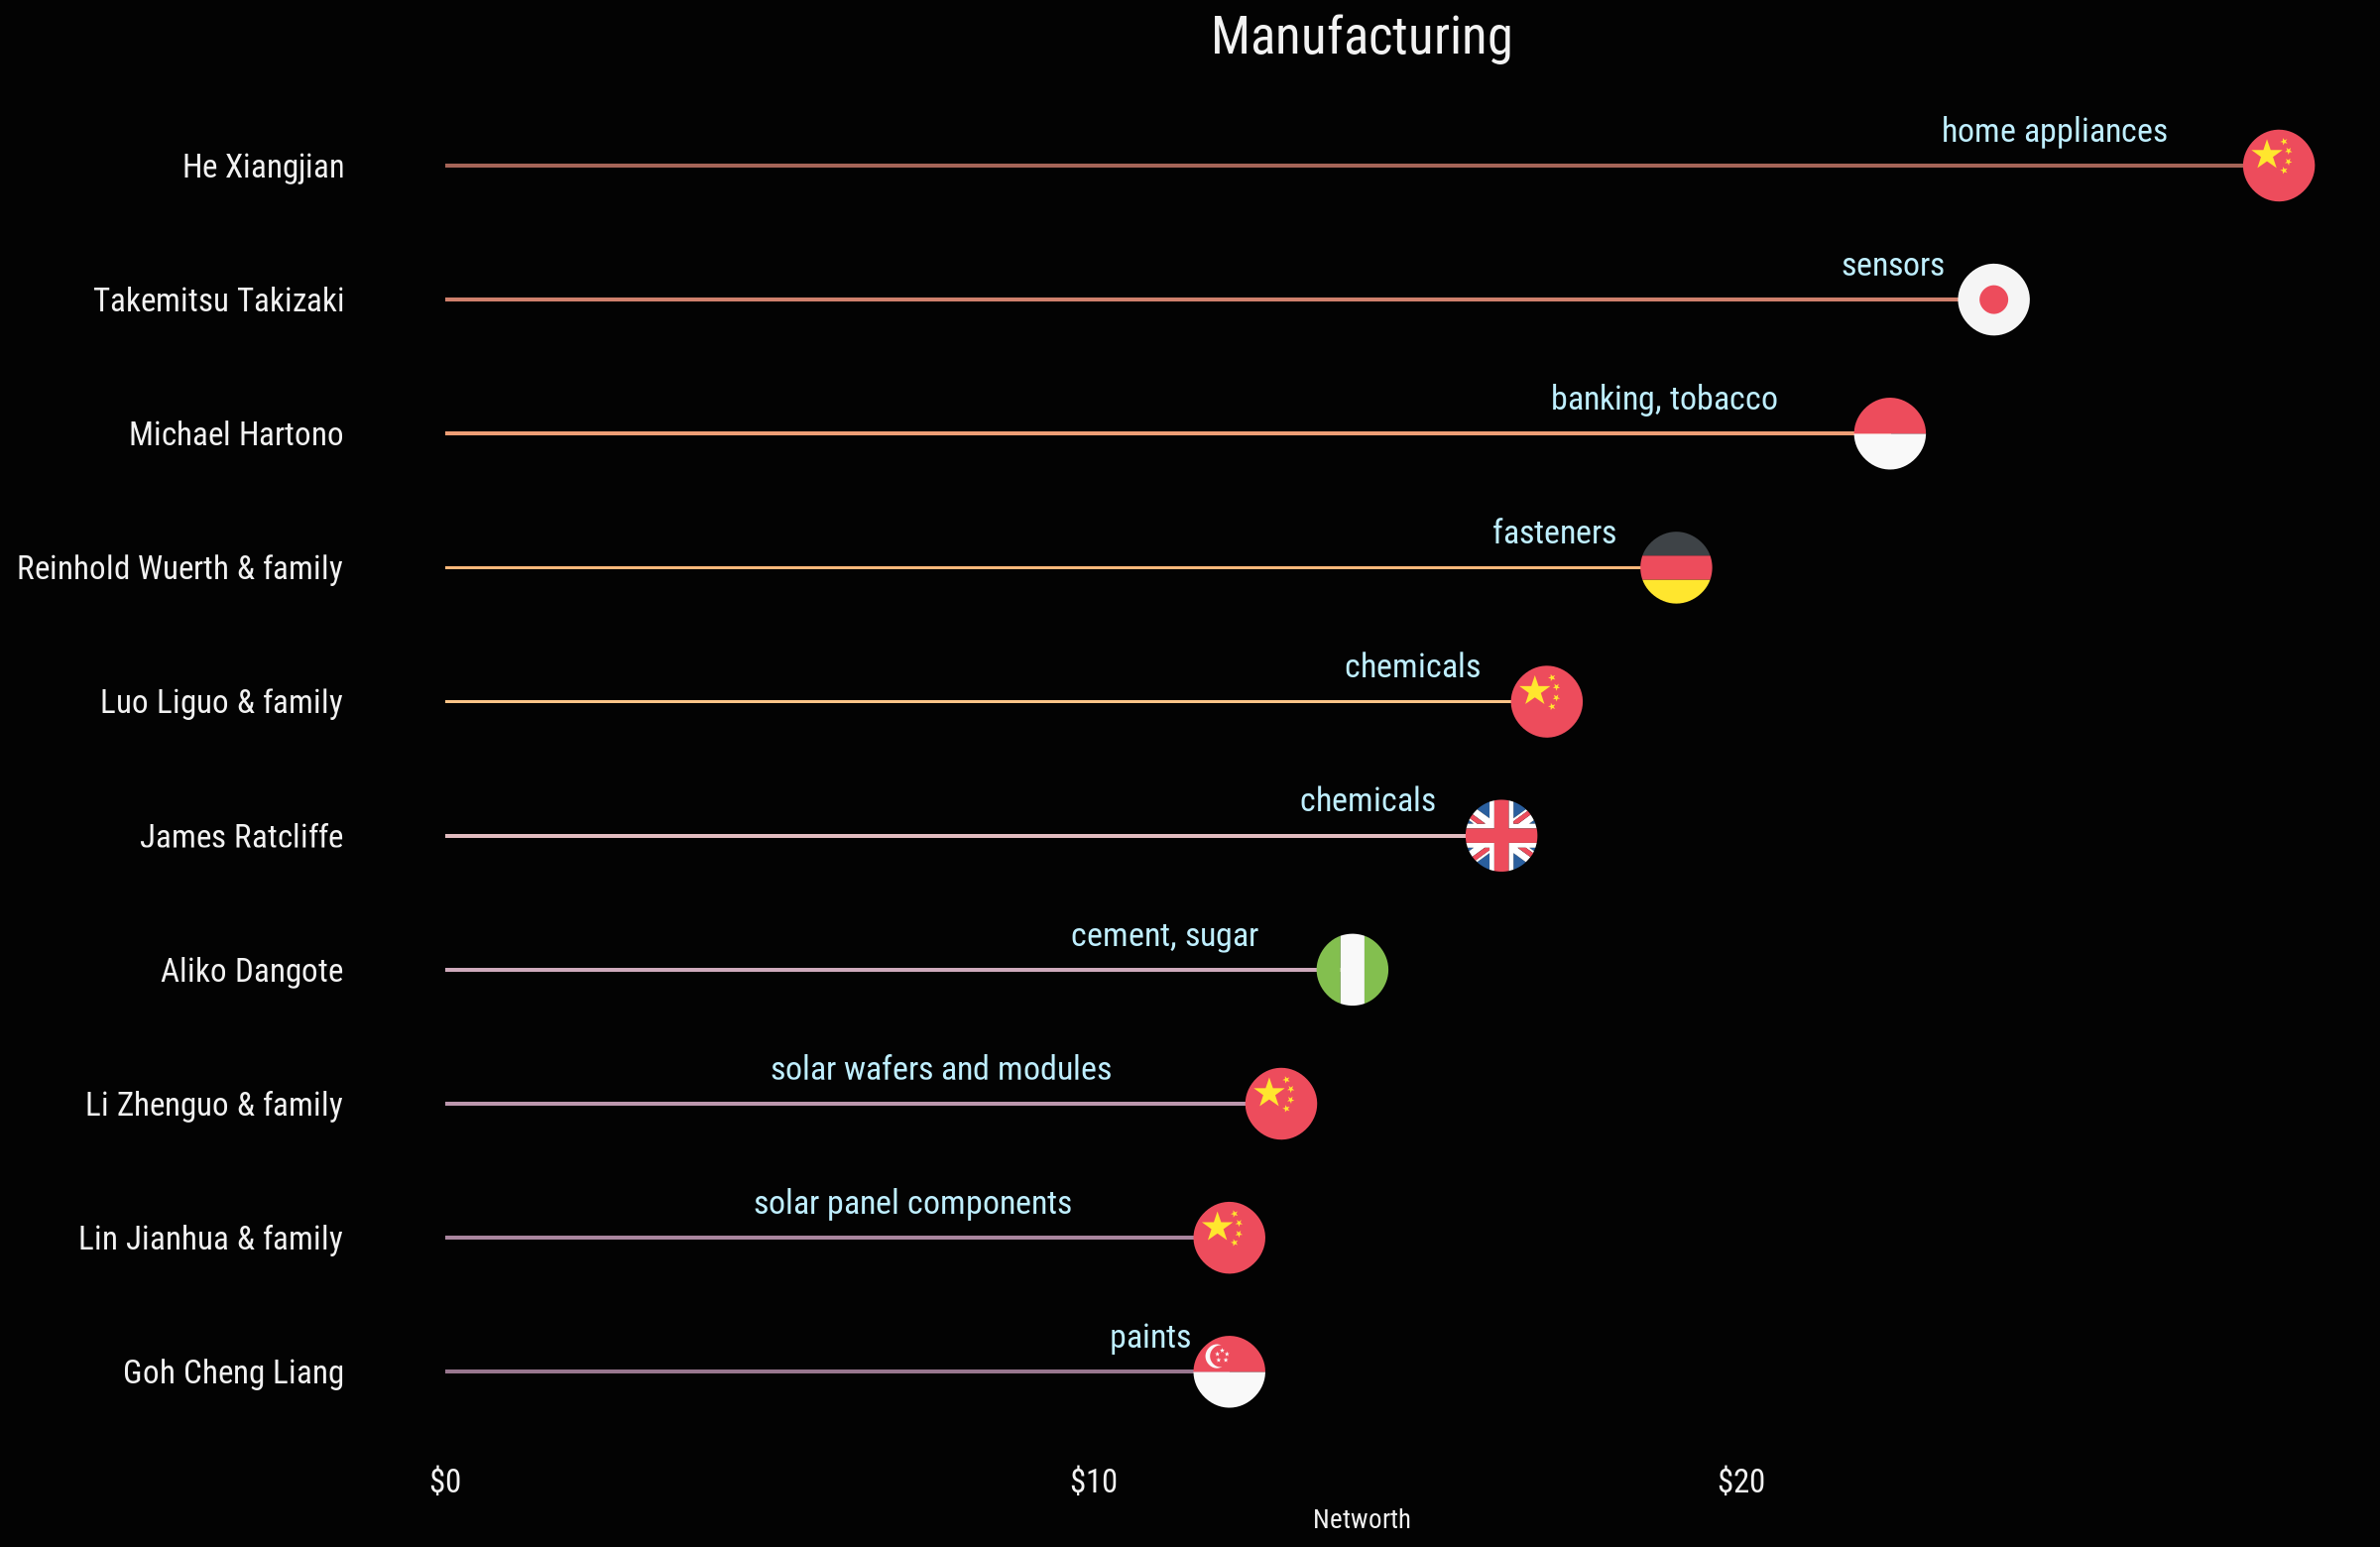

In [67]:
p3 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Manufacturing")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Manufacturing")
p3

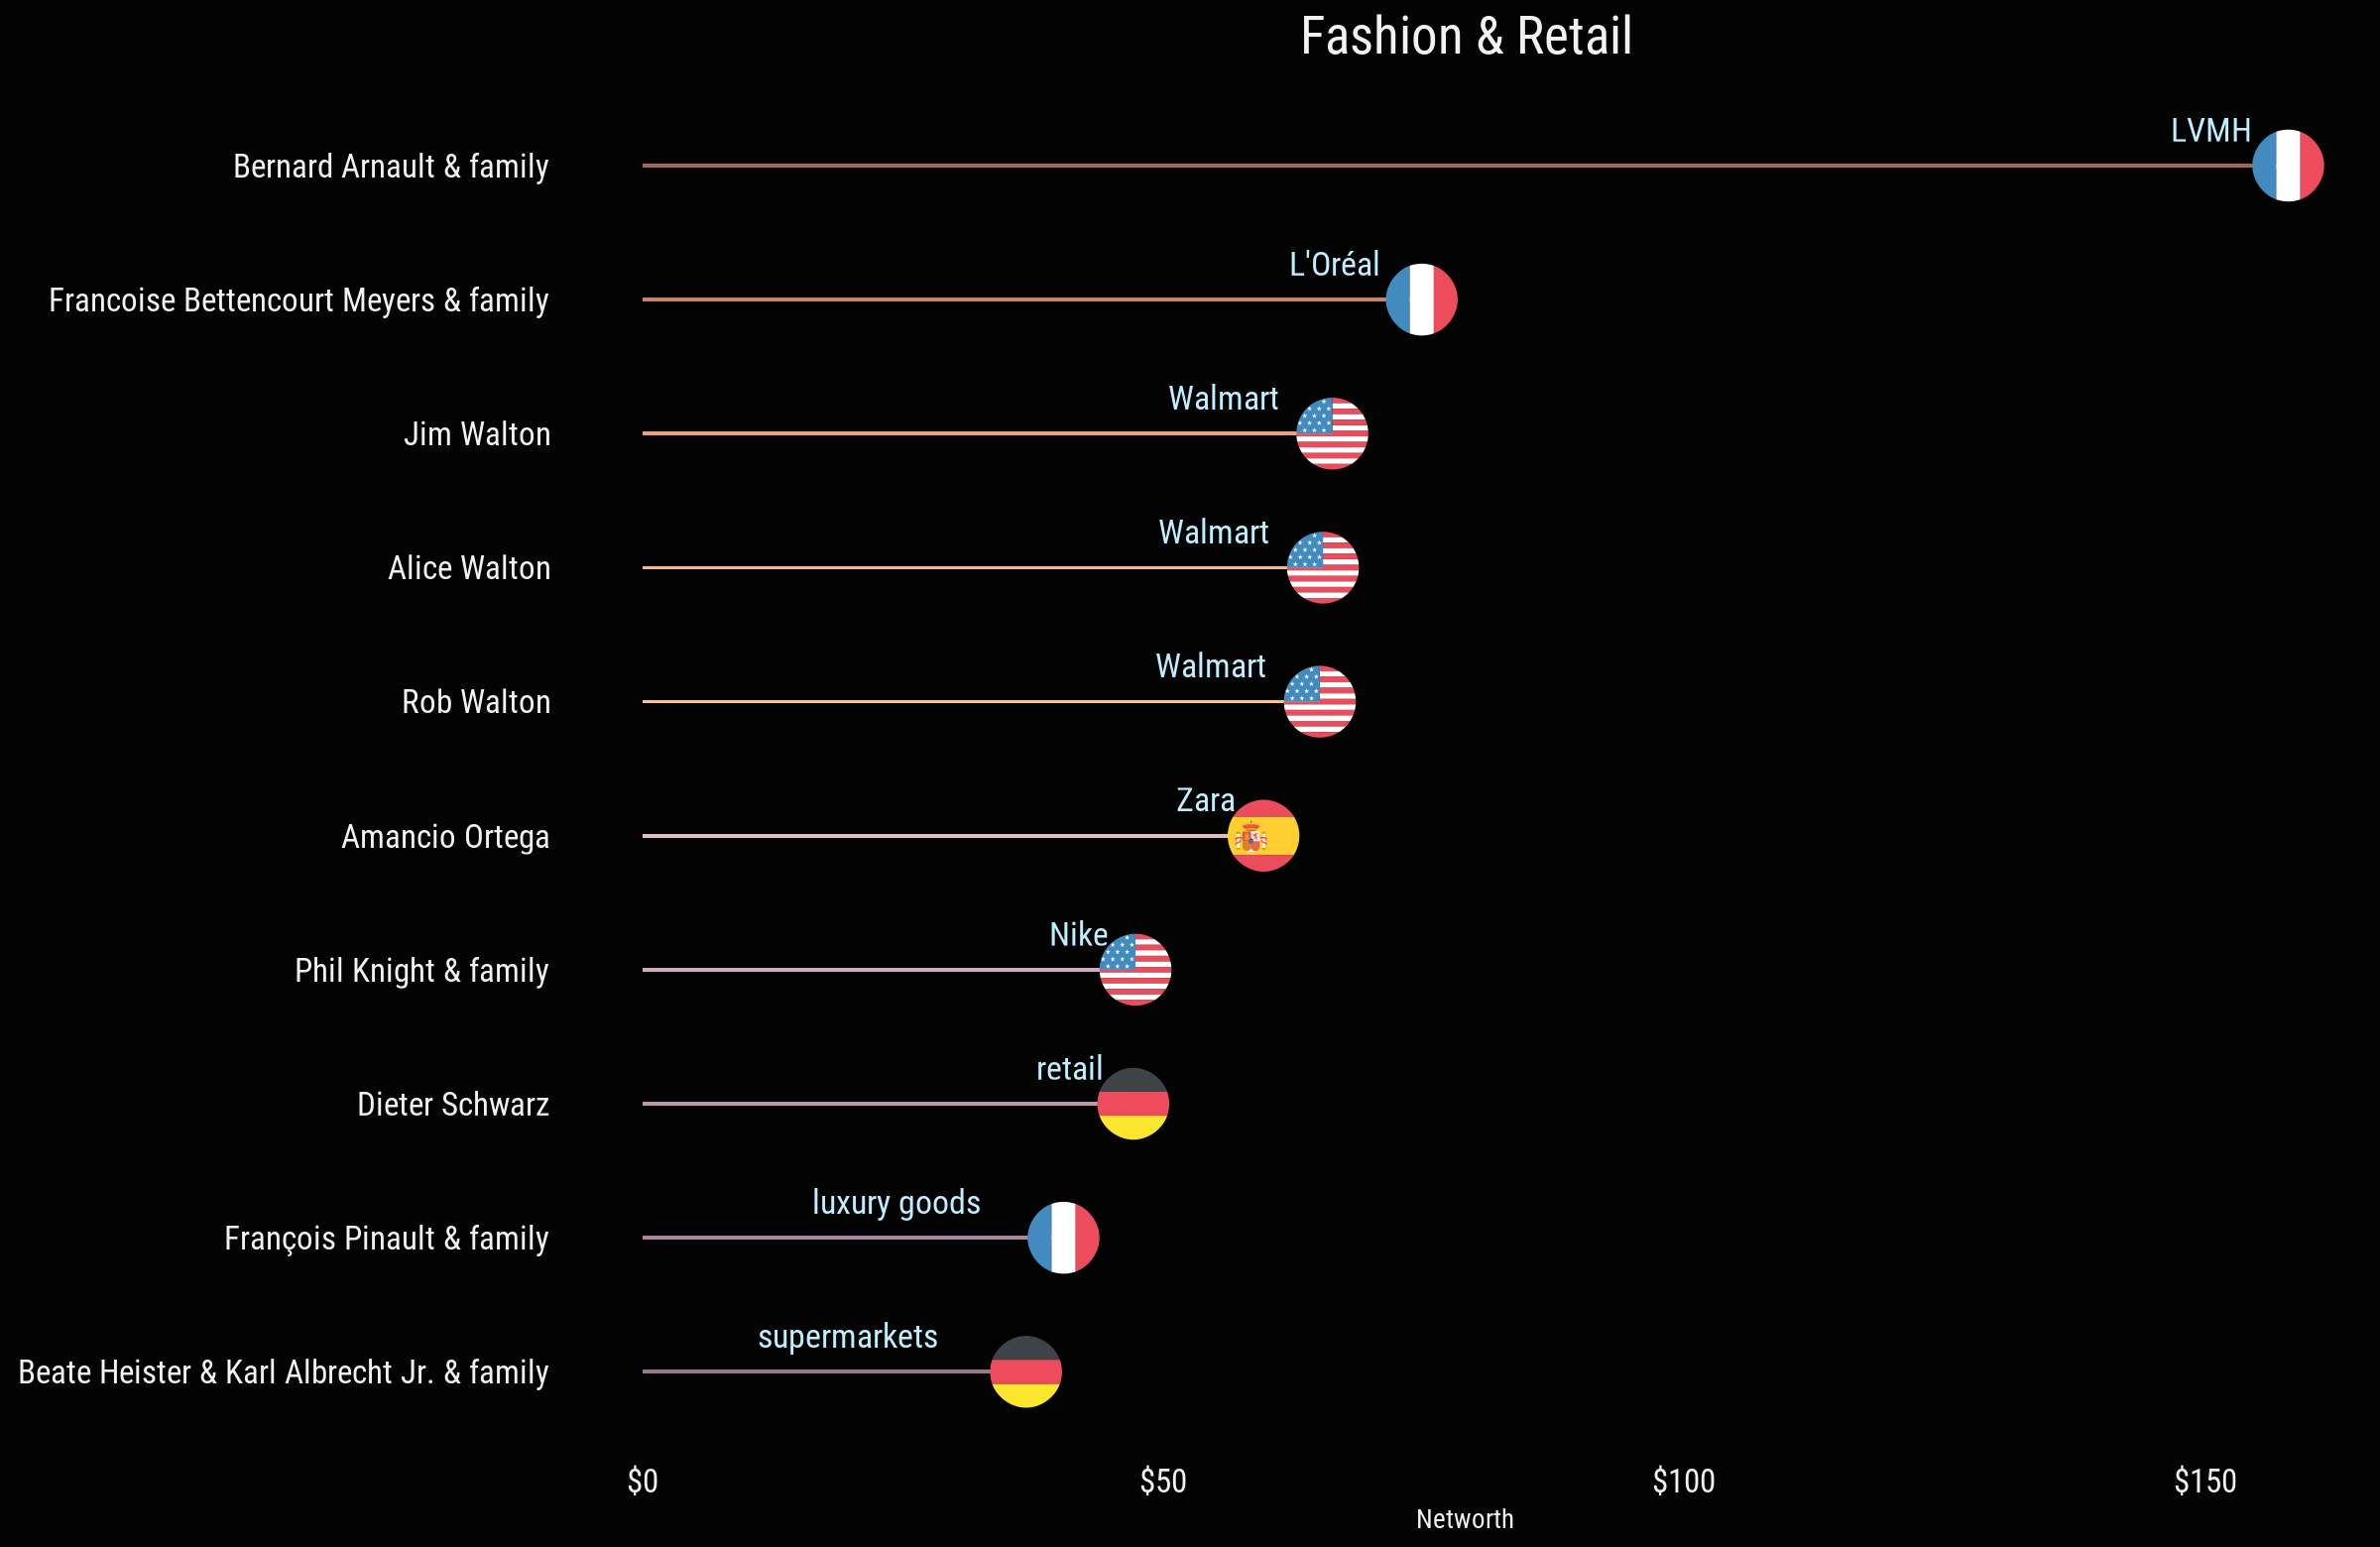

In [69]:
p4 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Fashion & Retail")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Fashion & Retail")
p4

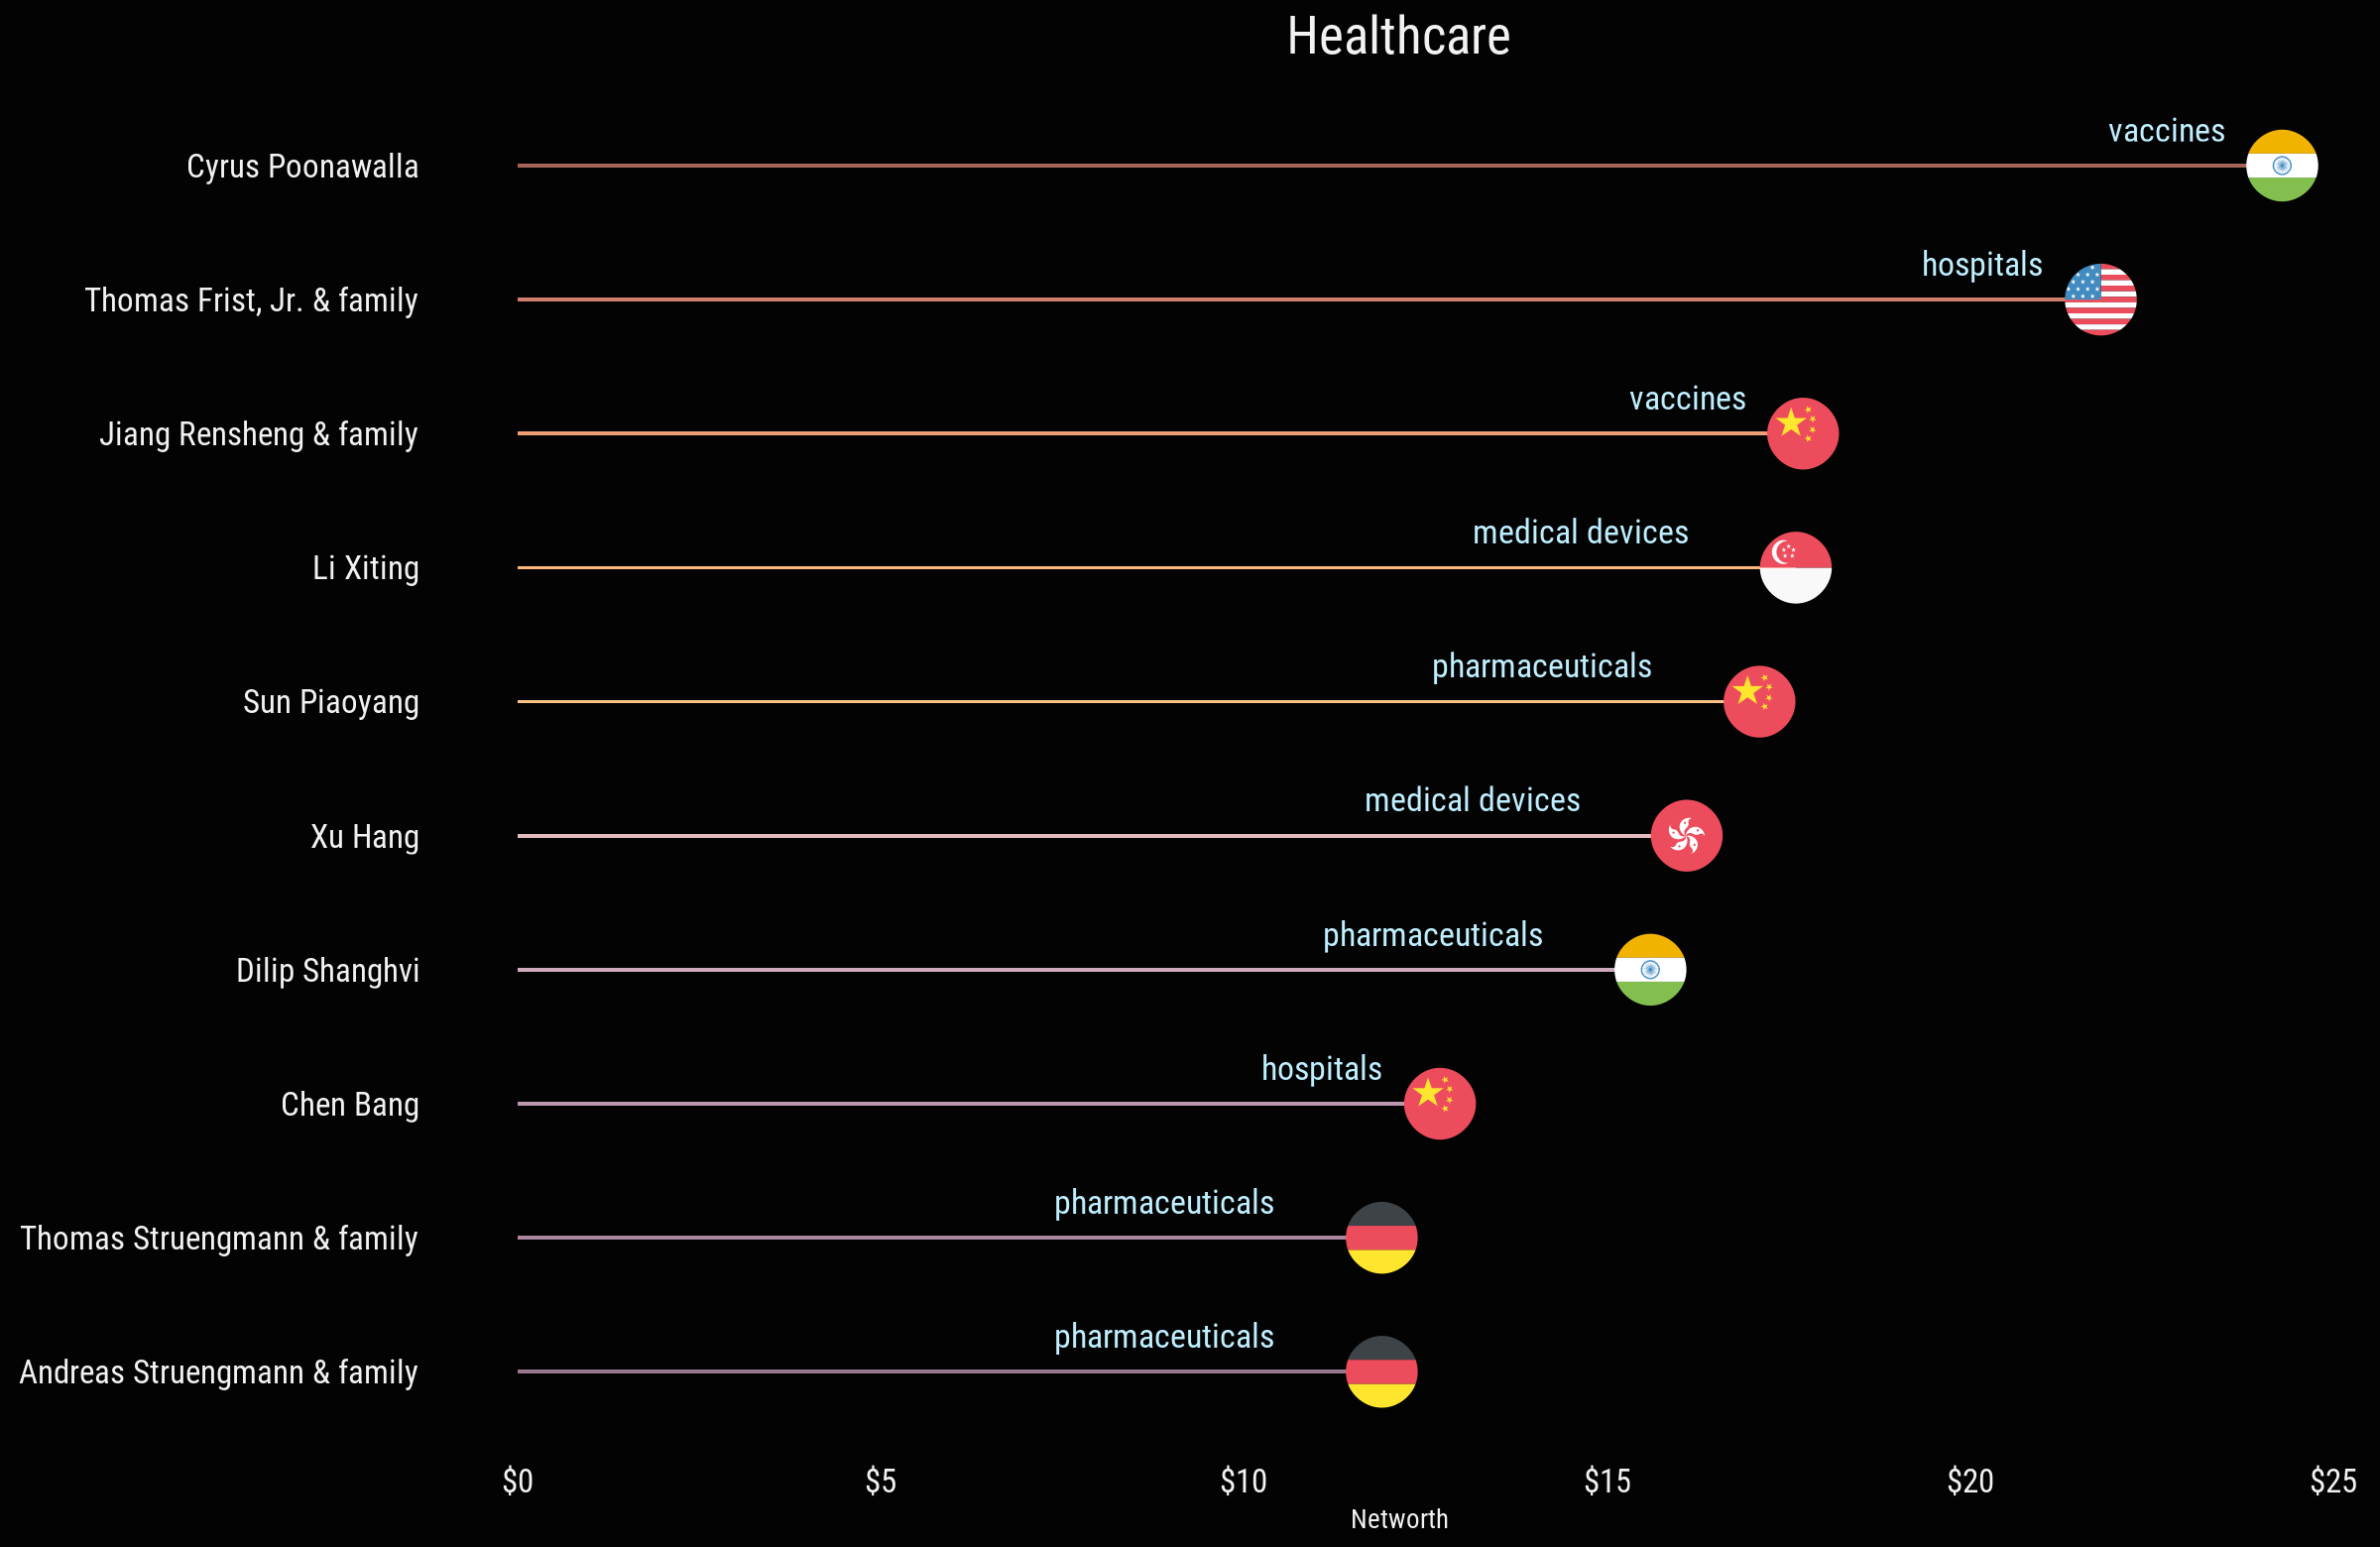

In [71]:
p5 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Healthcare")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Healthcare")
p5

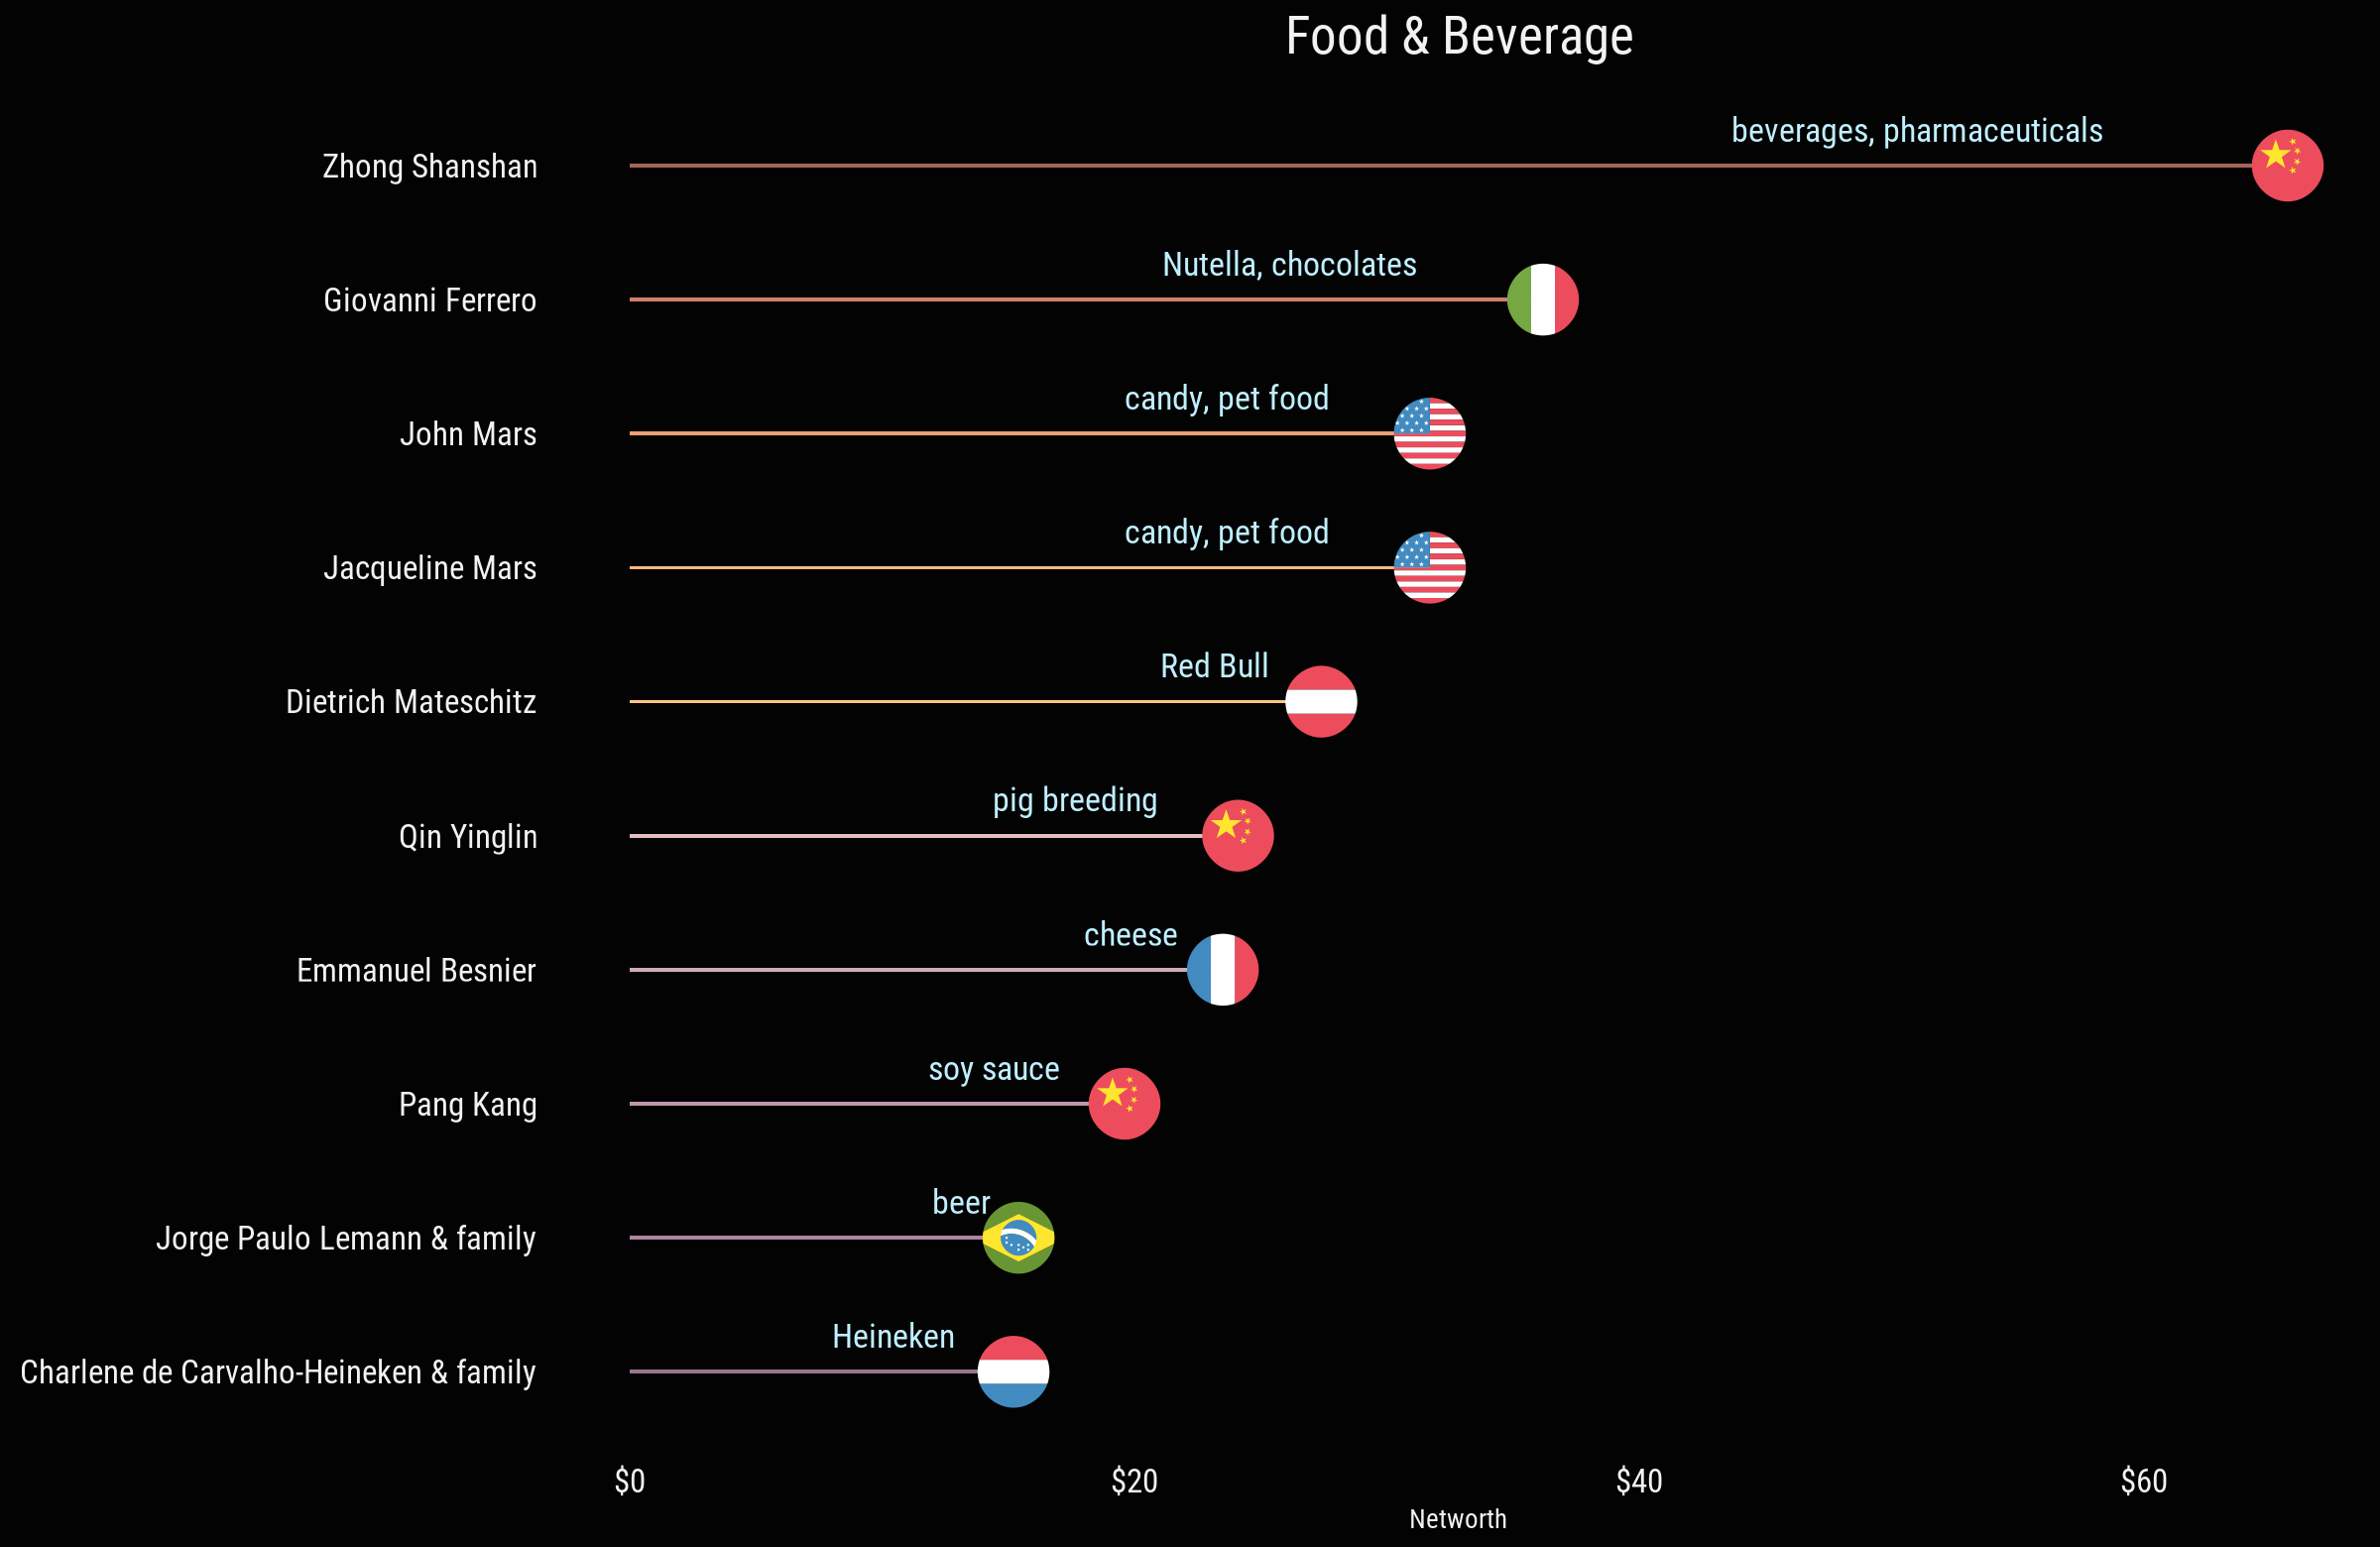

In [72]:
p6 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Food & Beverage")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Food & Beverage")
p6

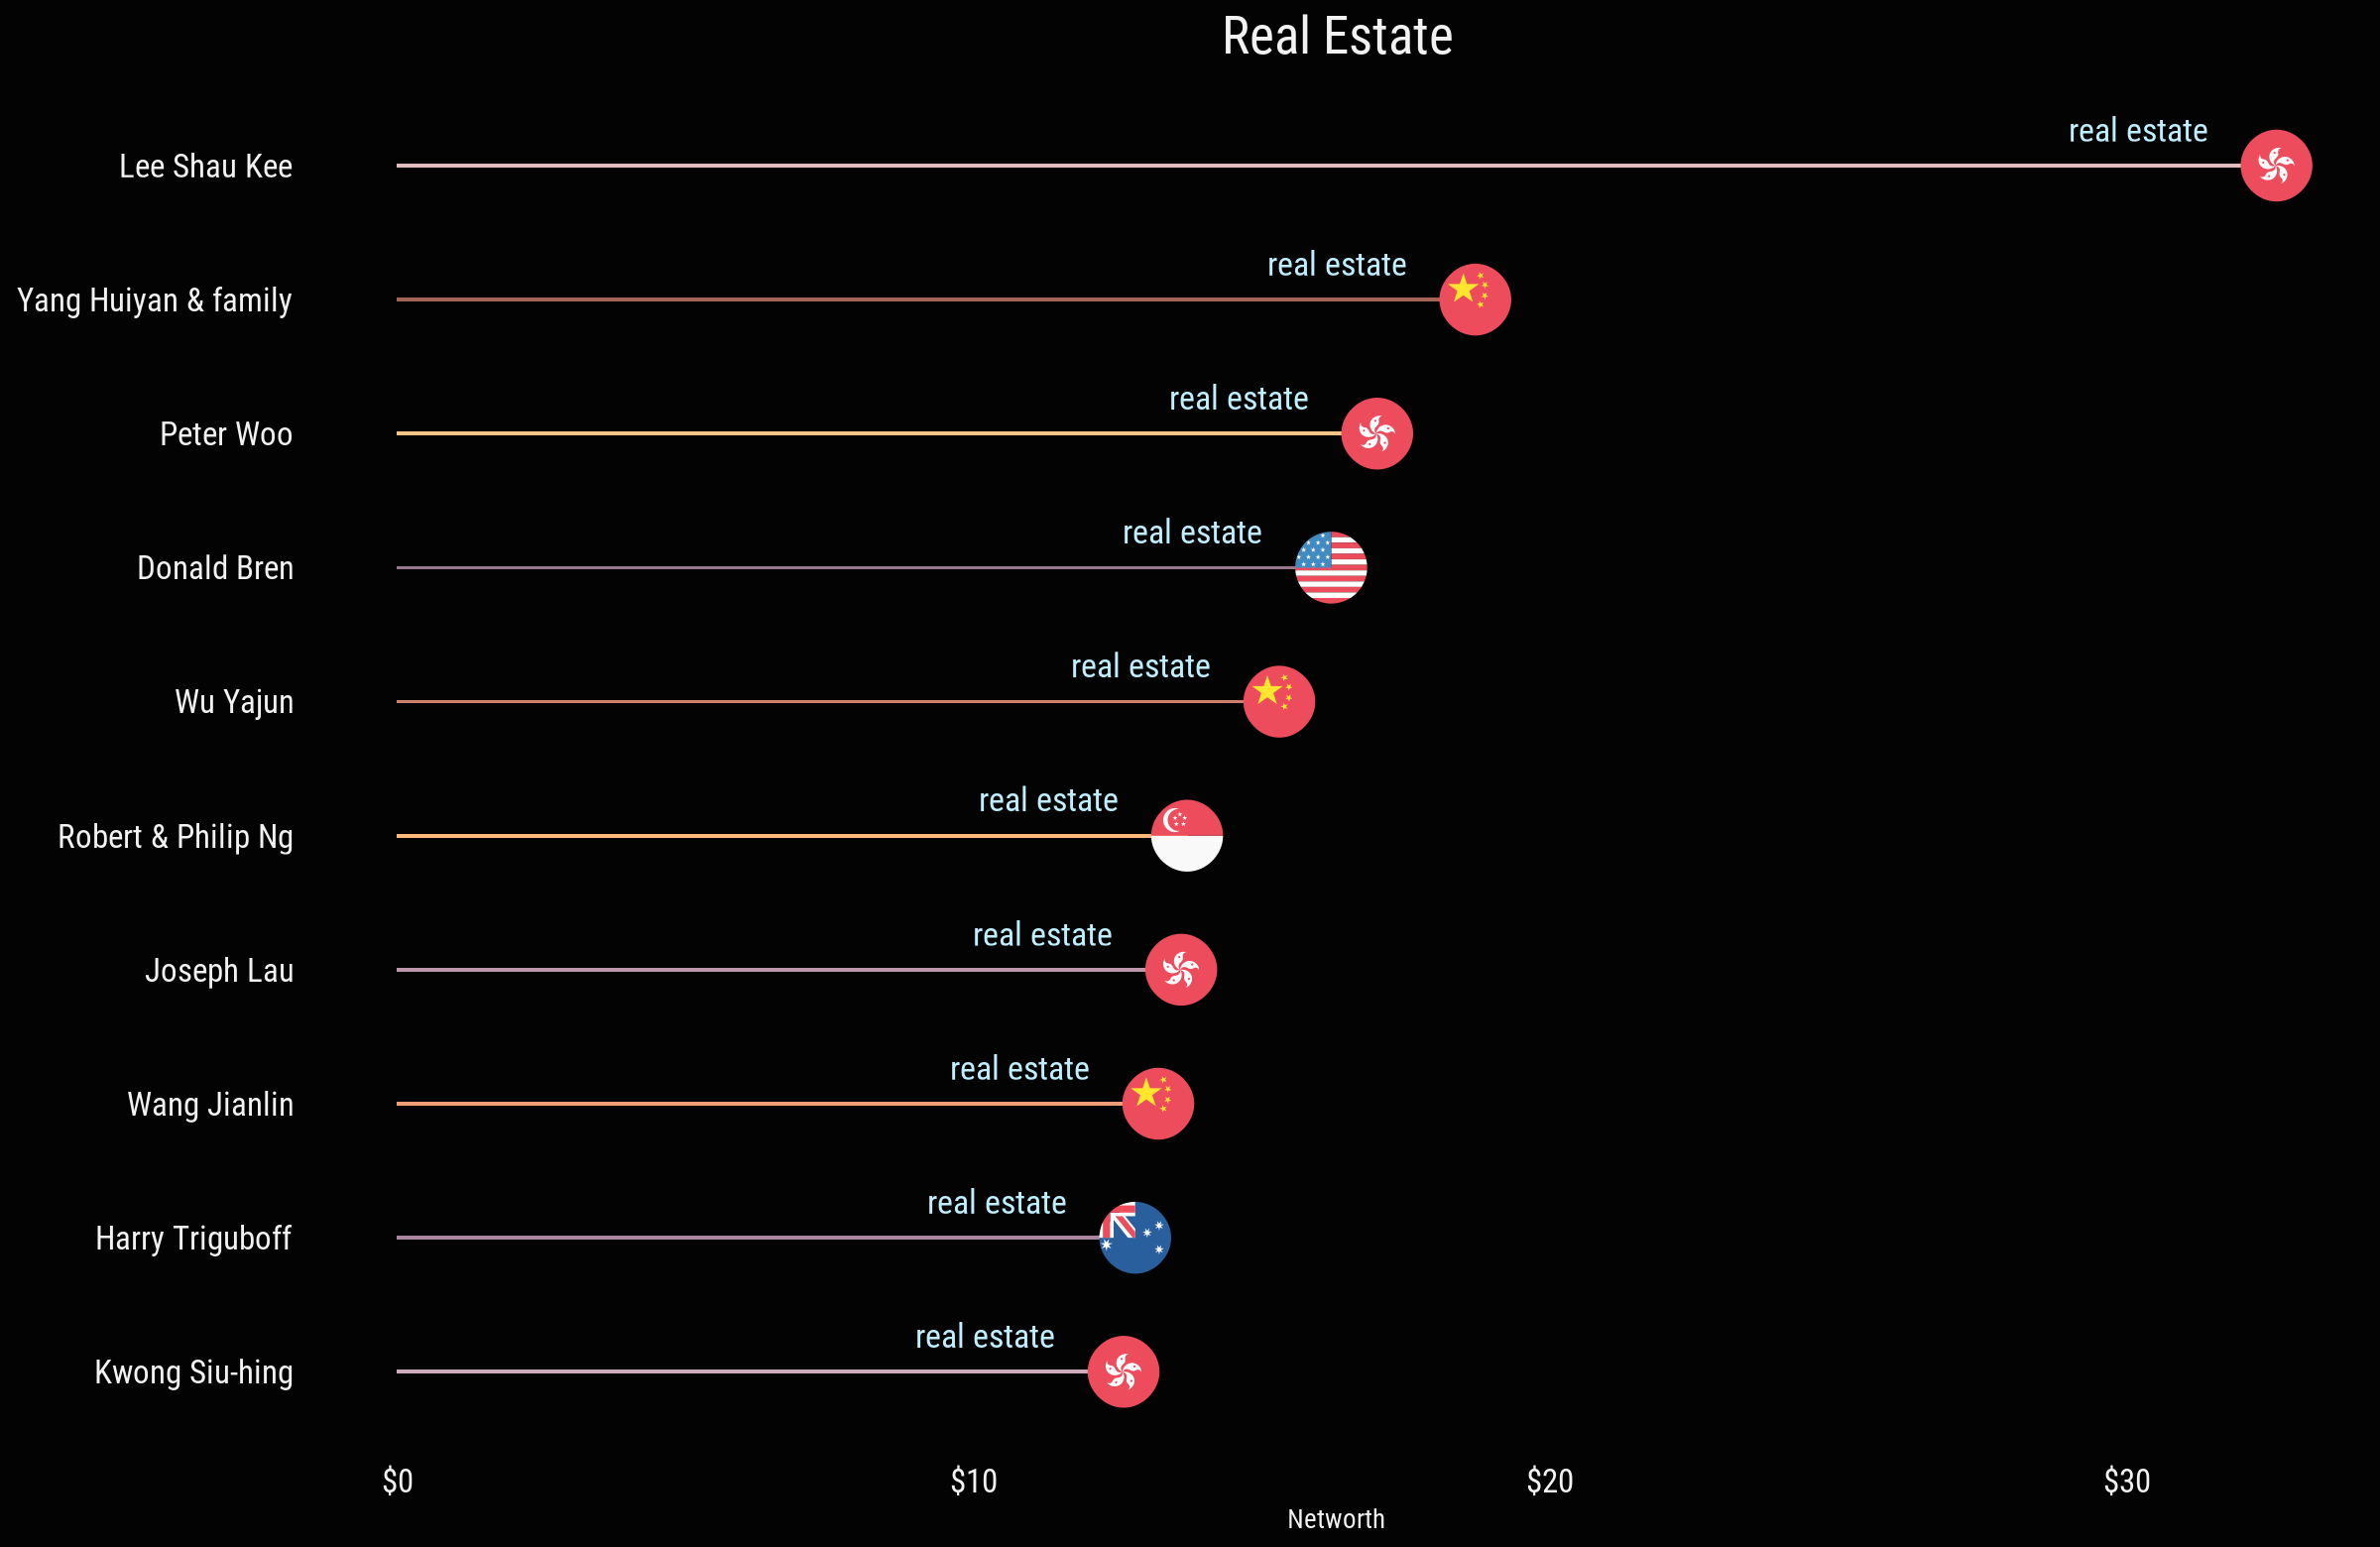

In [74]:
p7 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Real Estate")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Real Estate")
p7

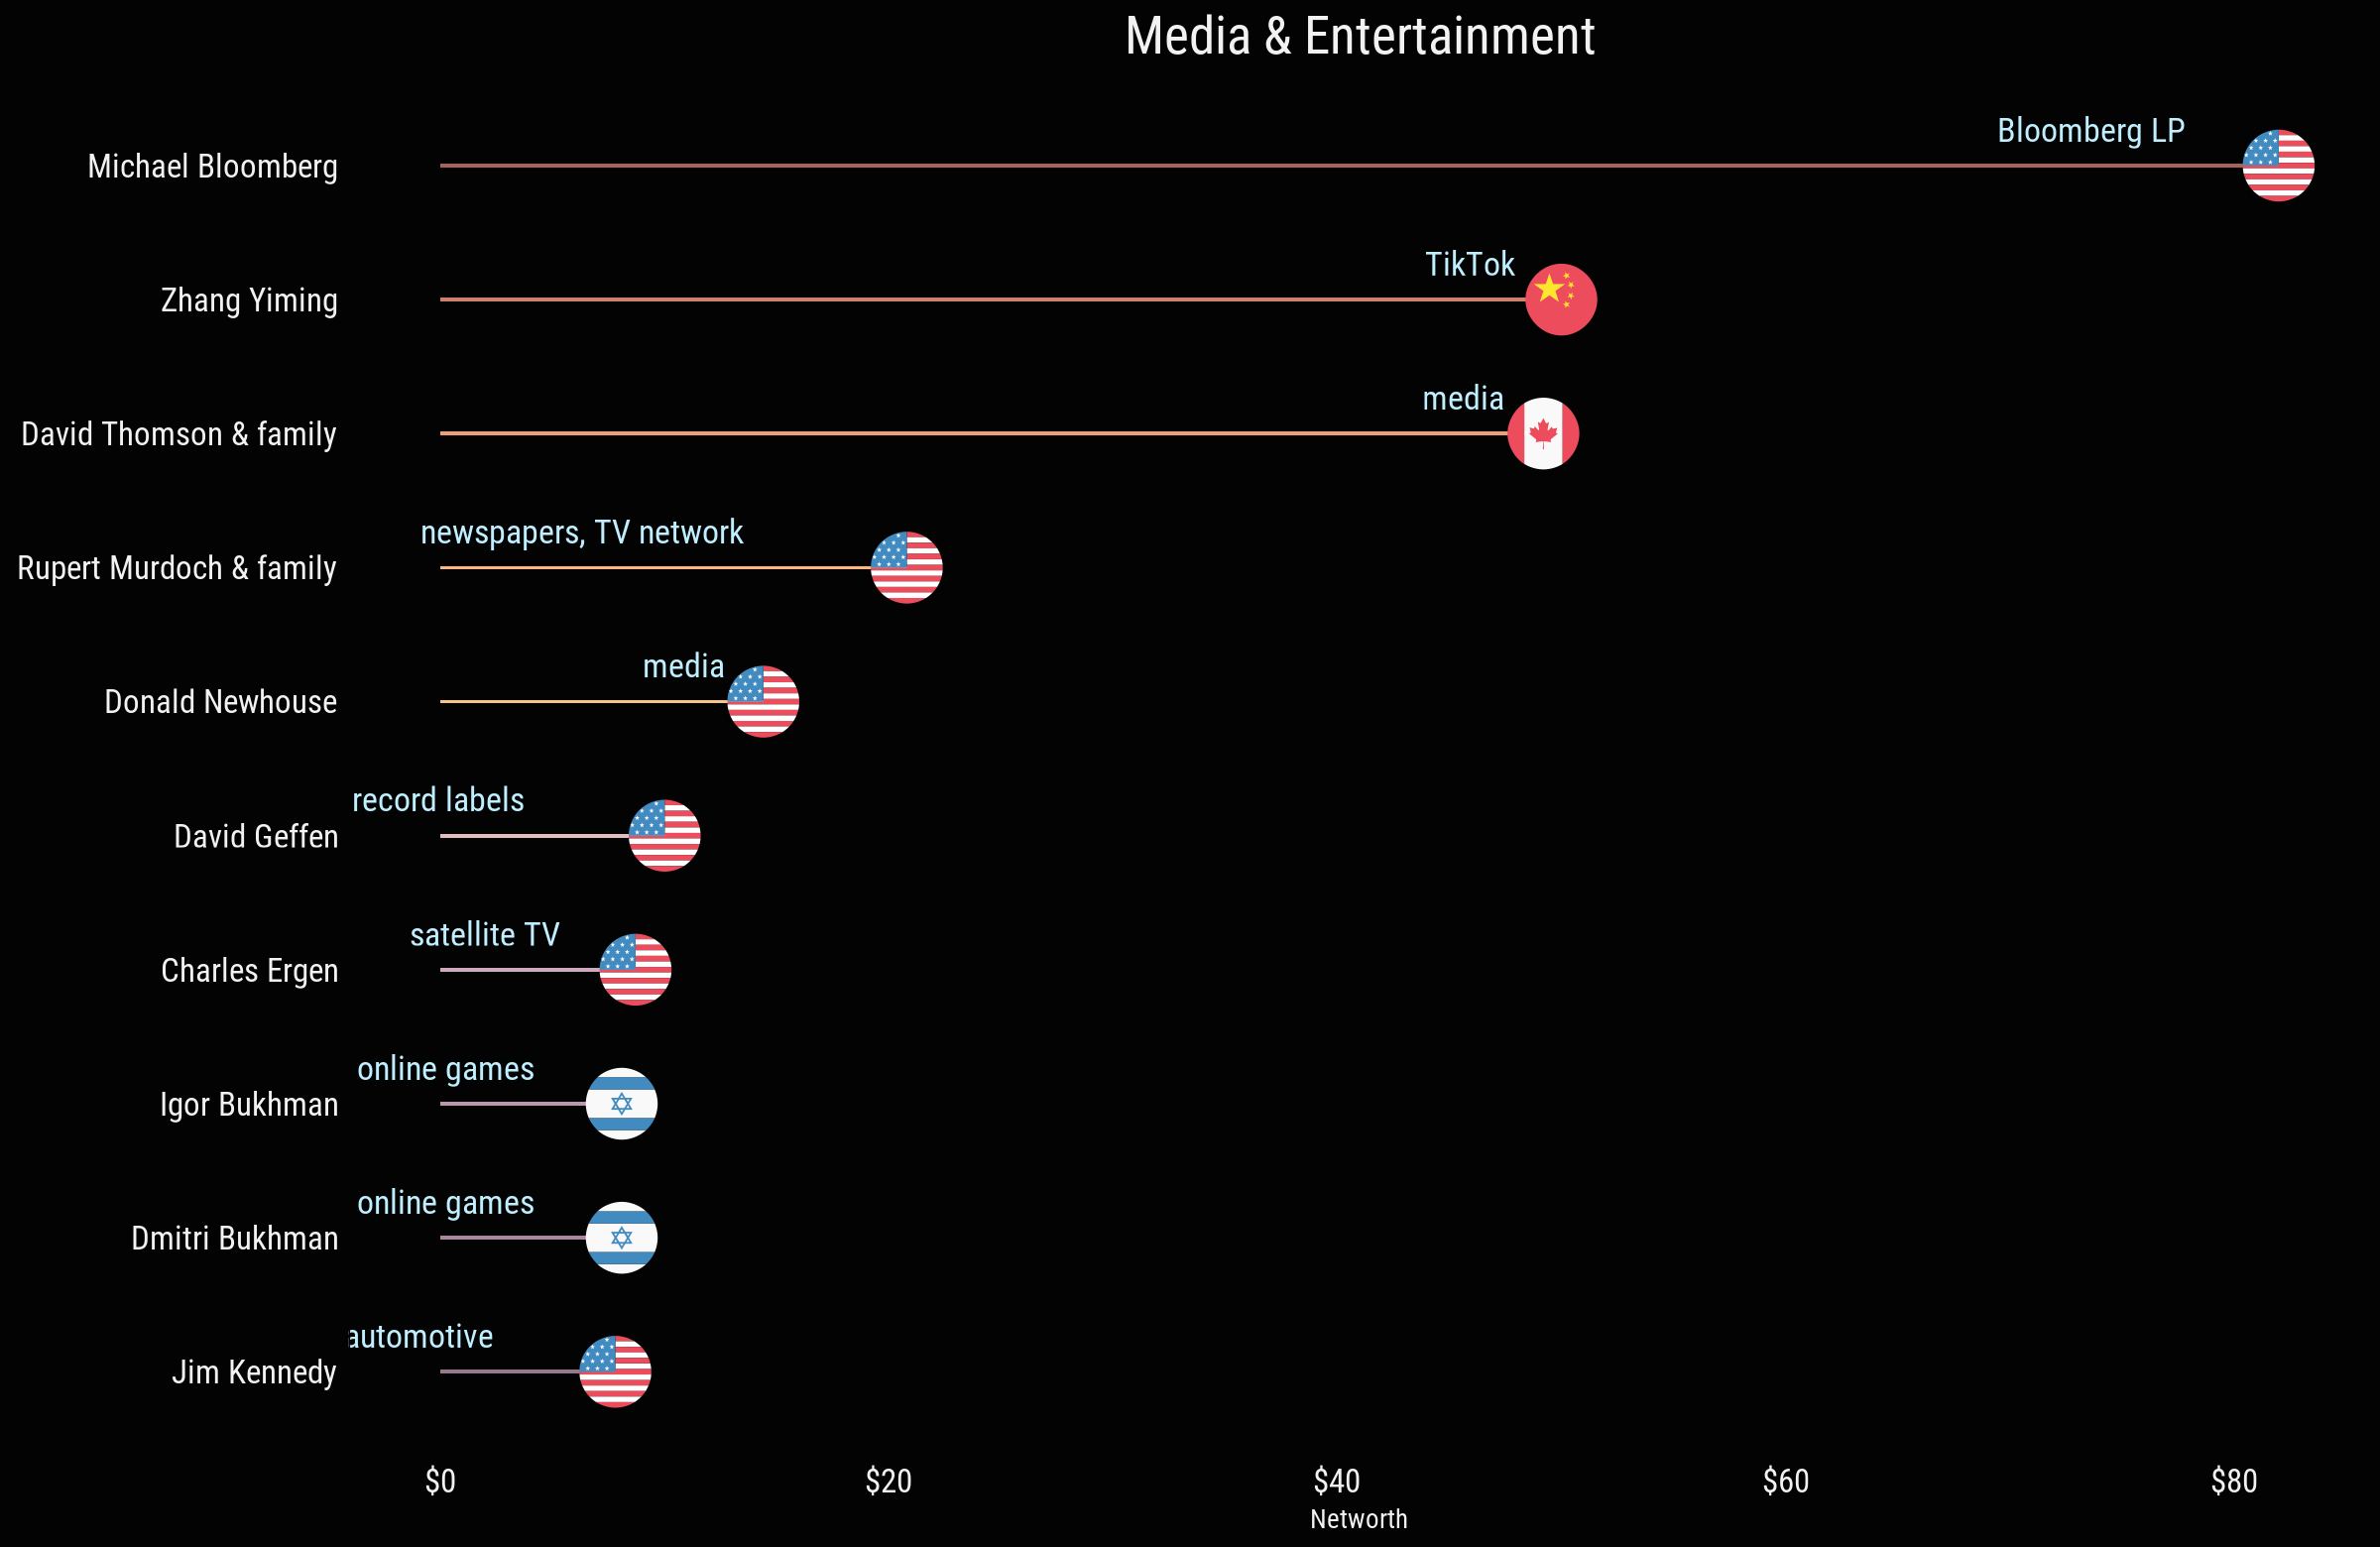

In [76]:
p8 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Media & Entertainment")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Media & Entertainment")
p8

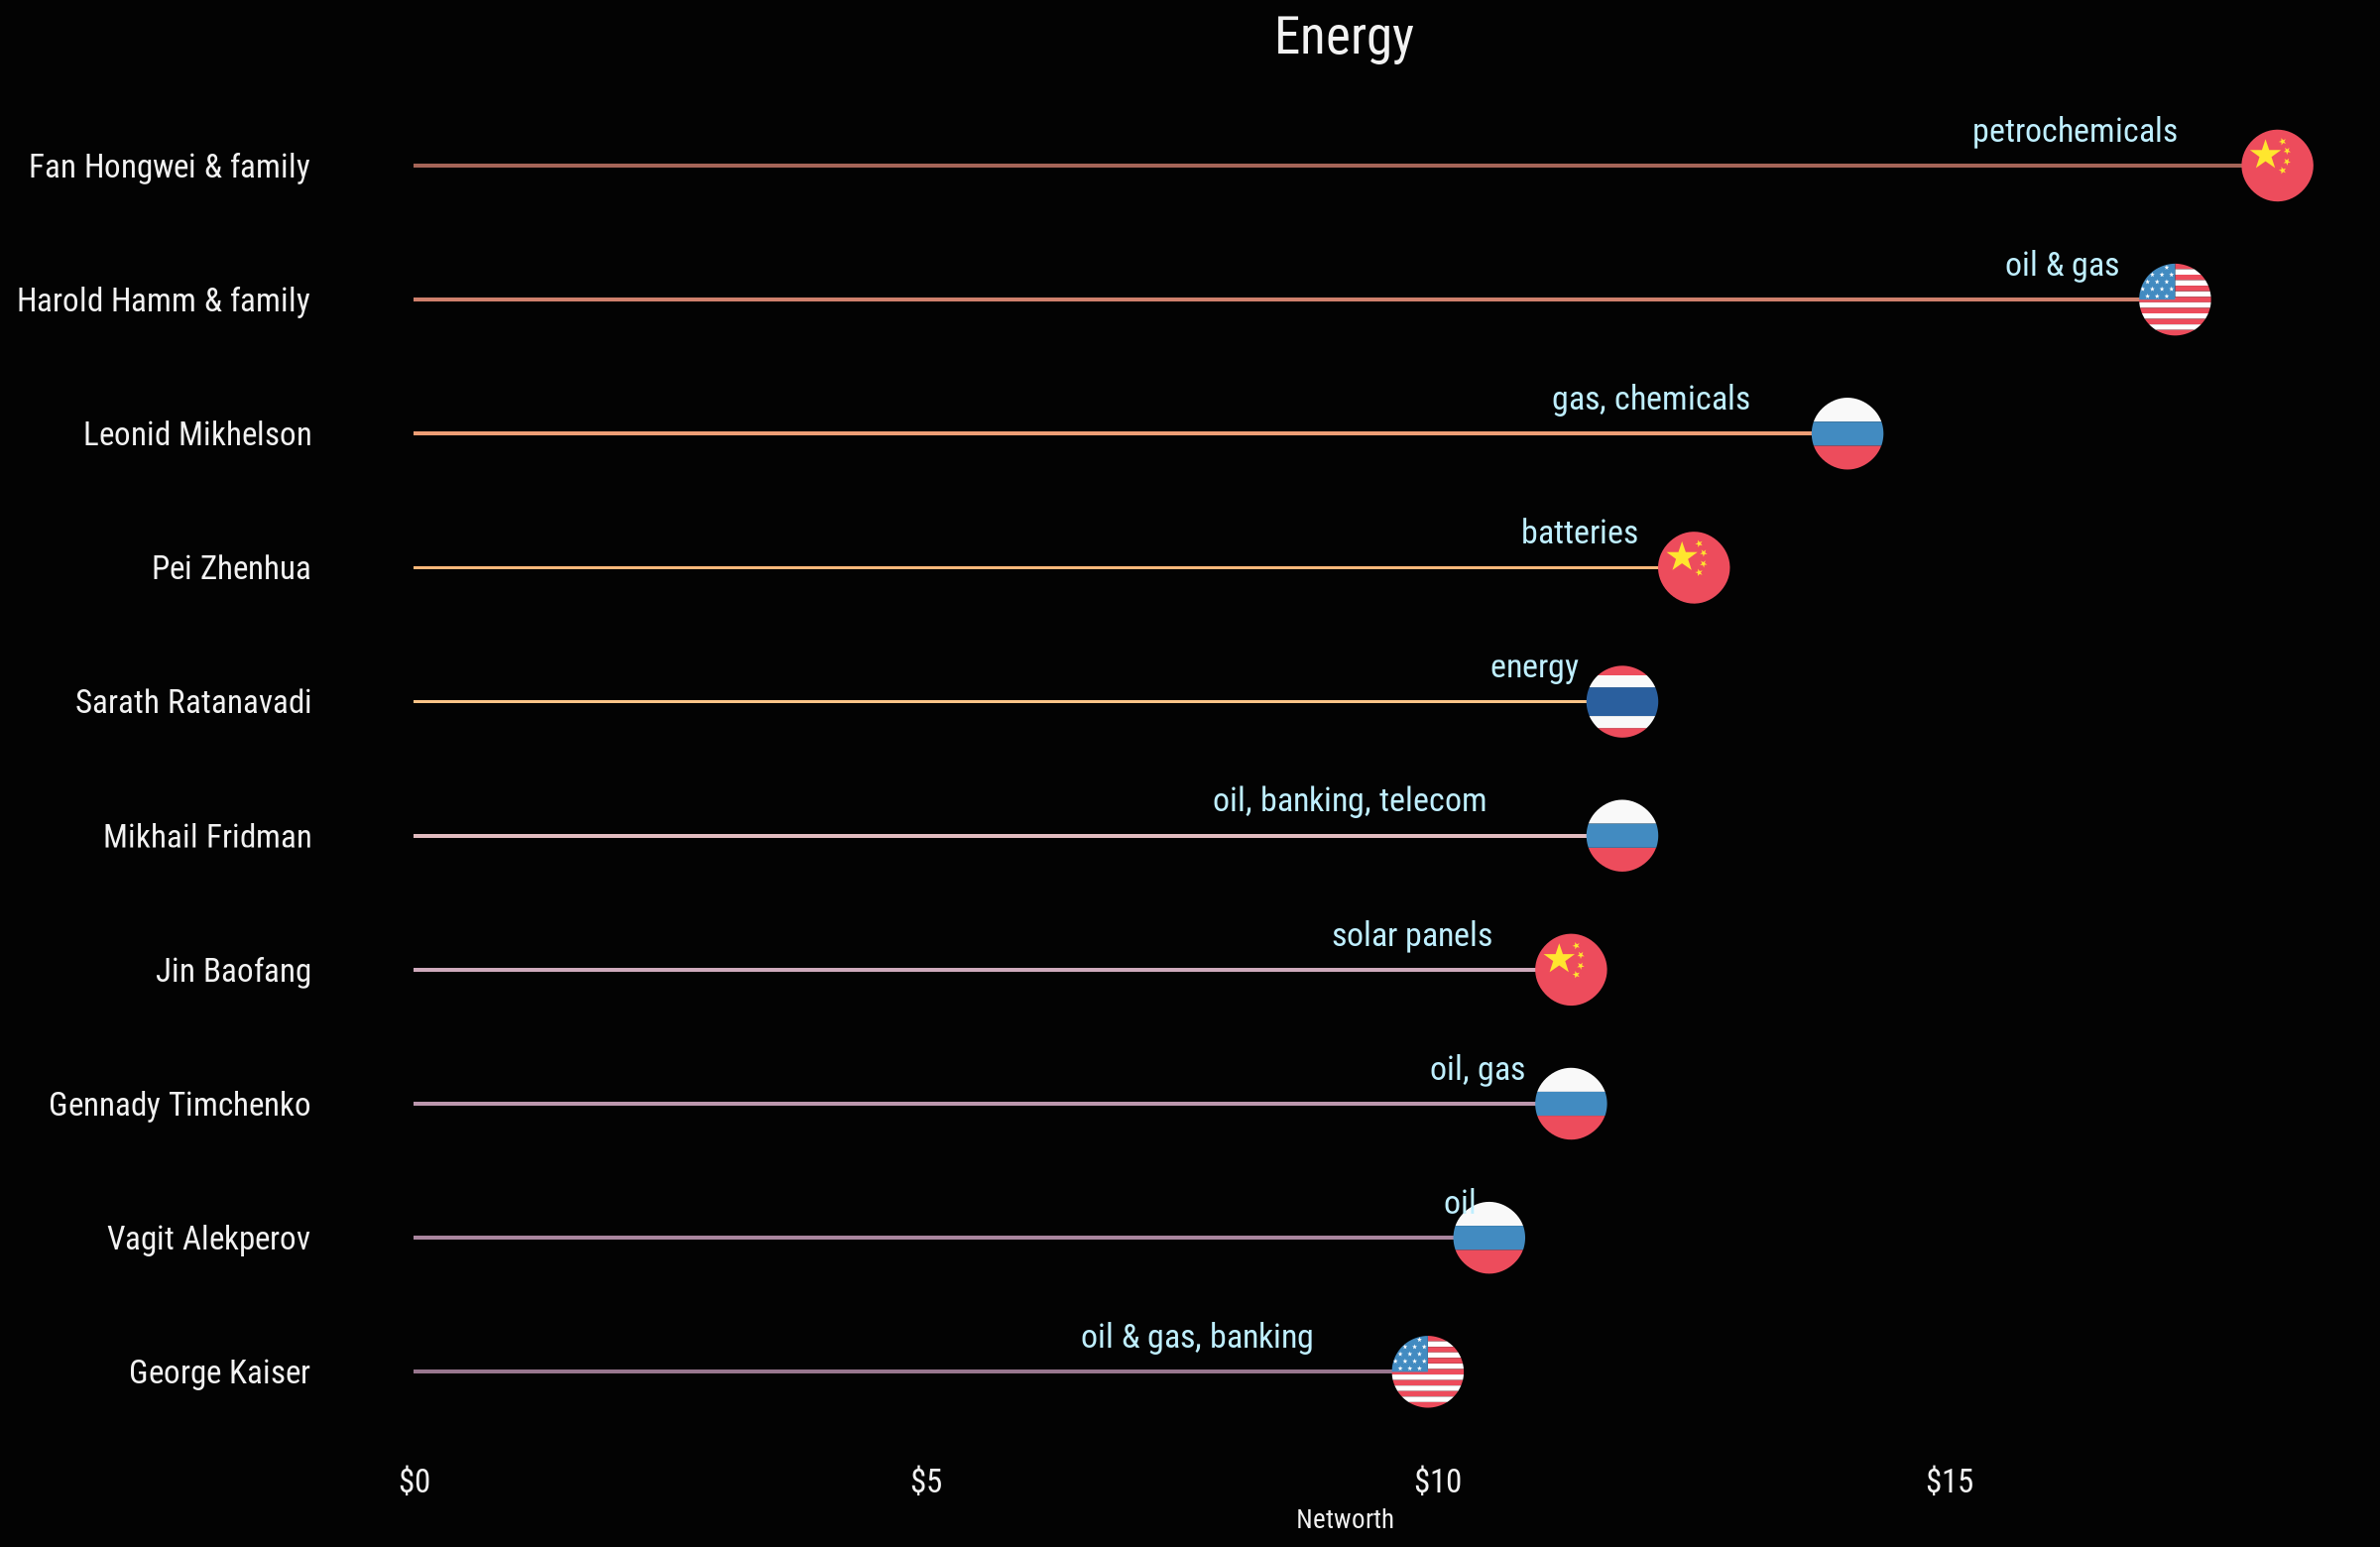

In [77]:
p9 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Energy")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Energy")
p9

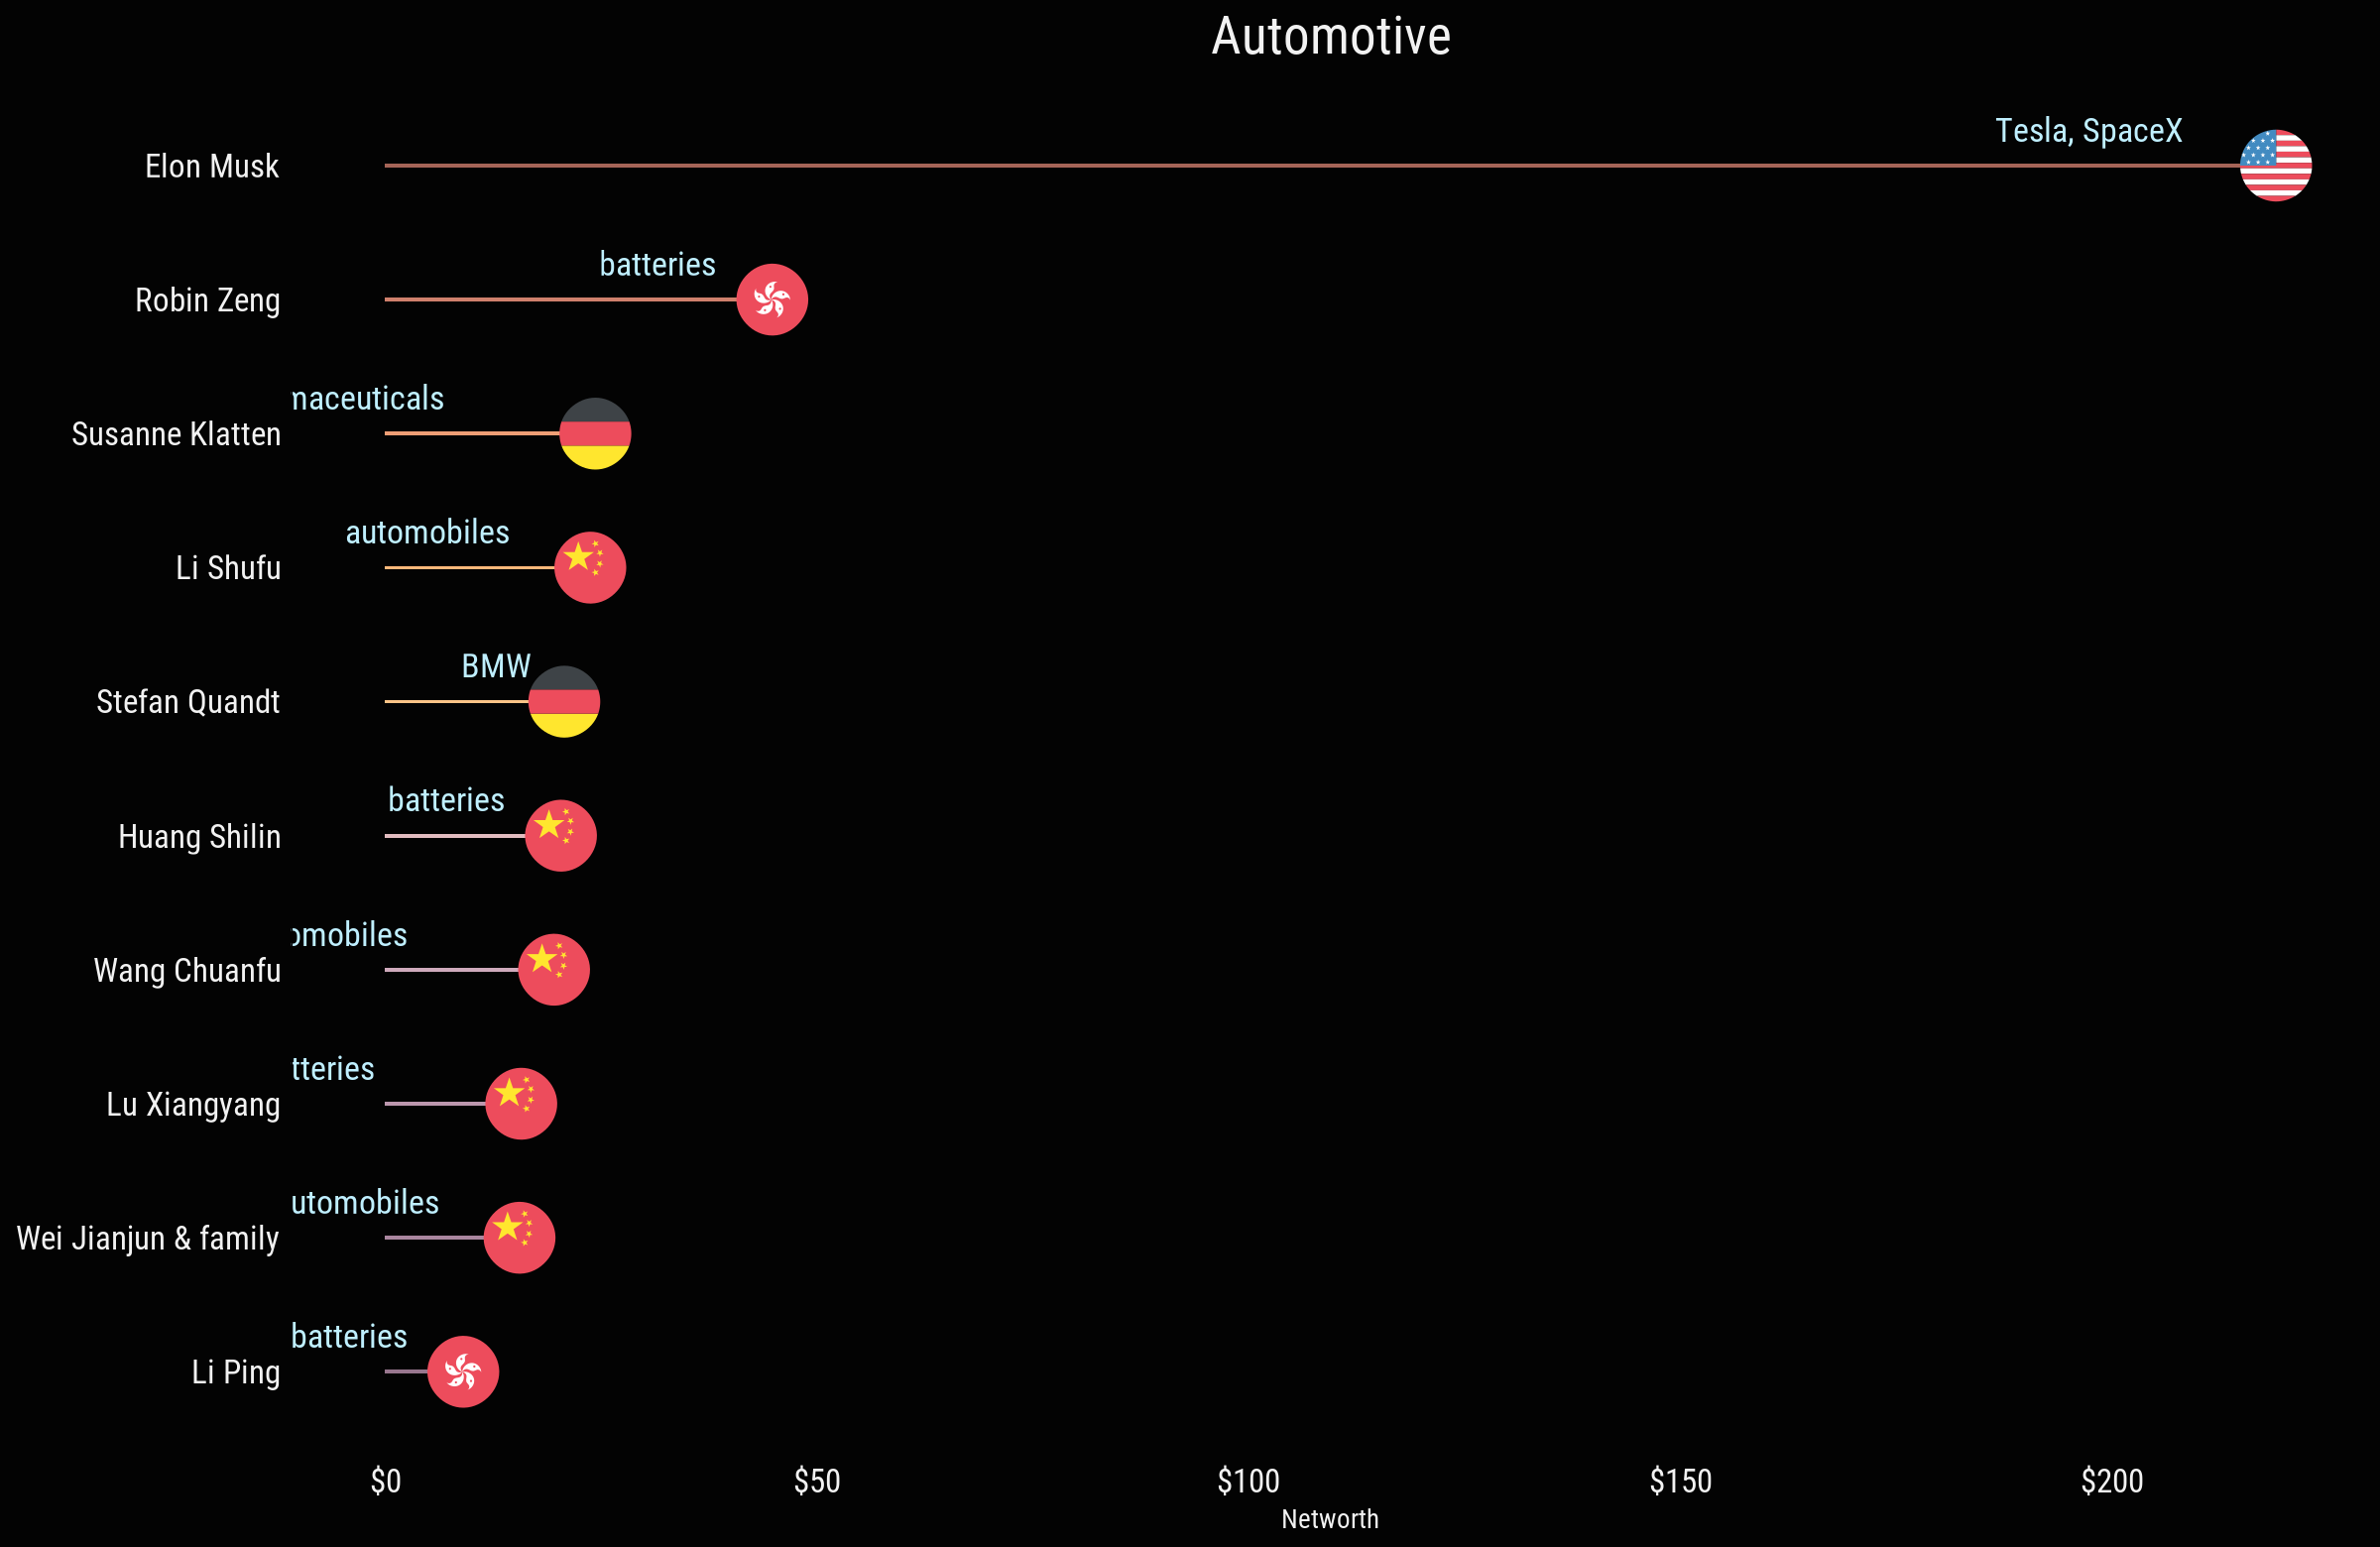

In [79]:
p10 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Automotive")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Networth)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Automotive")
p10

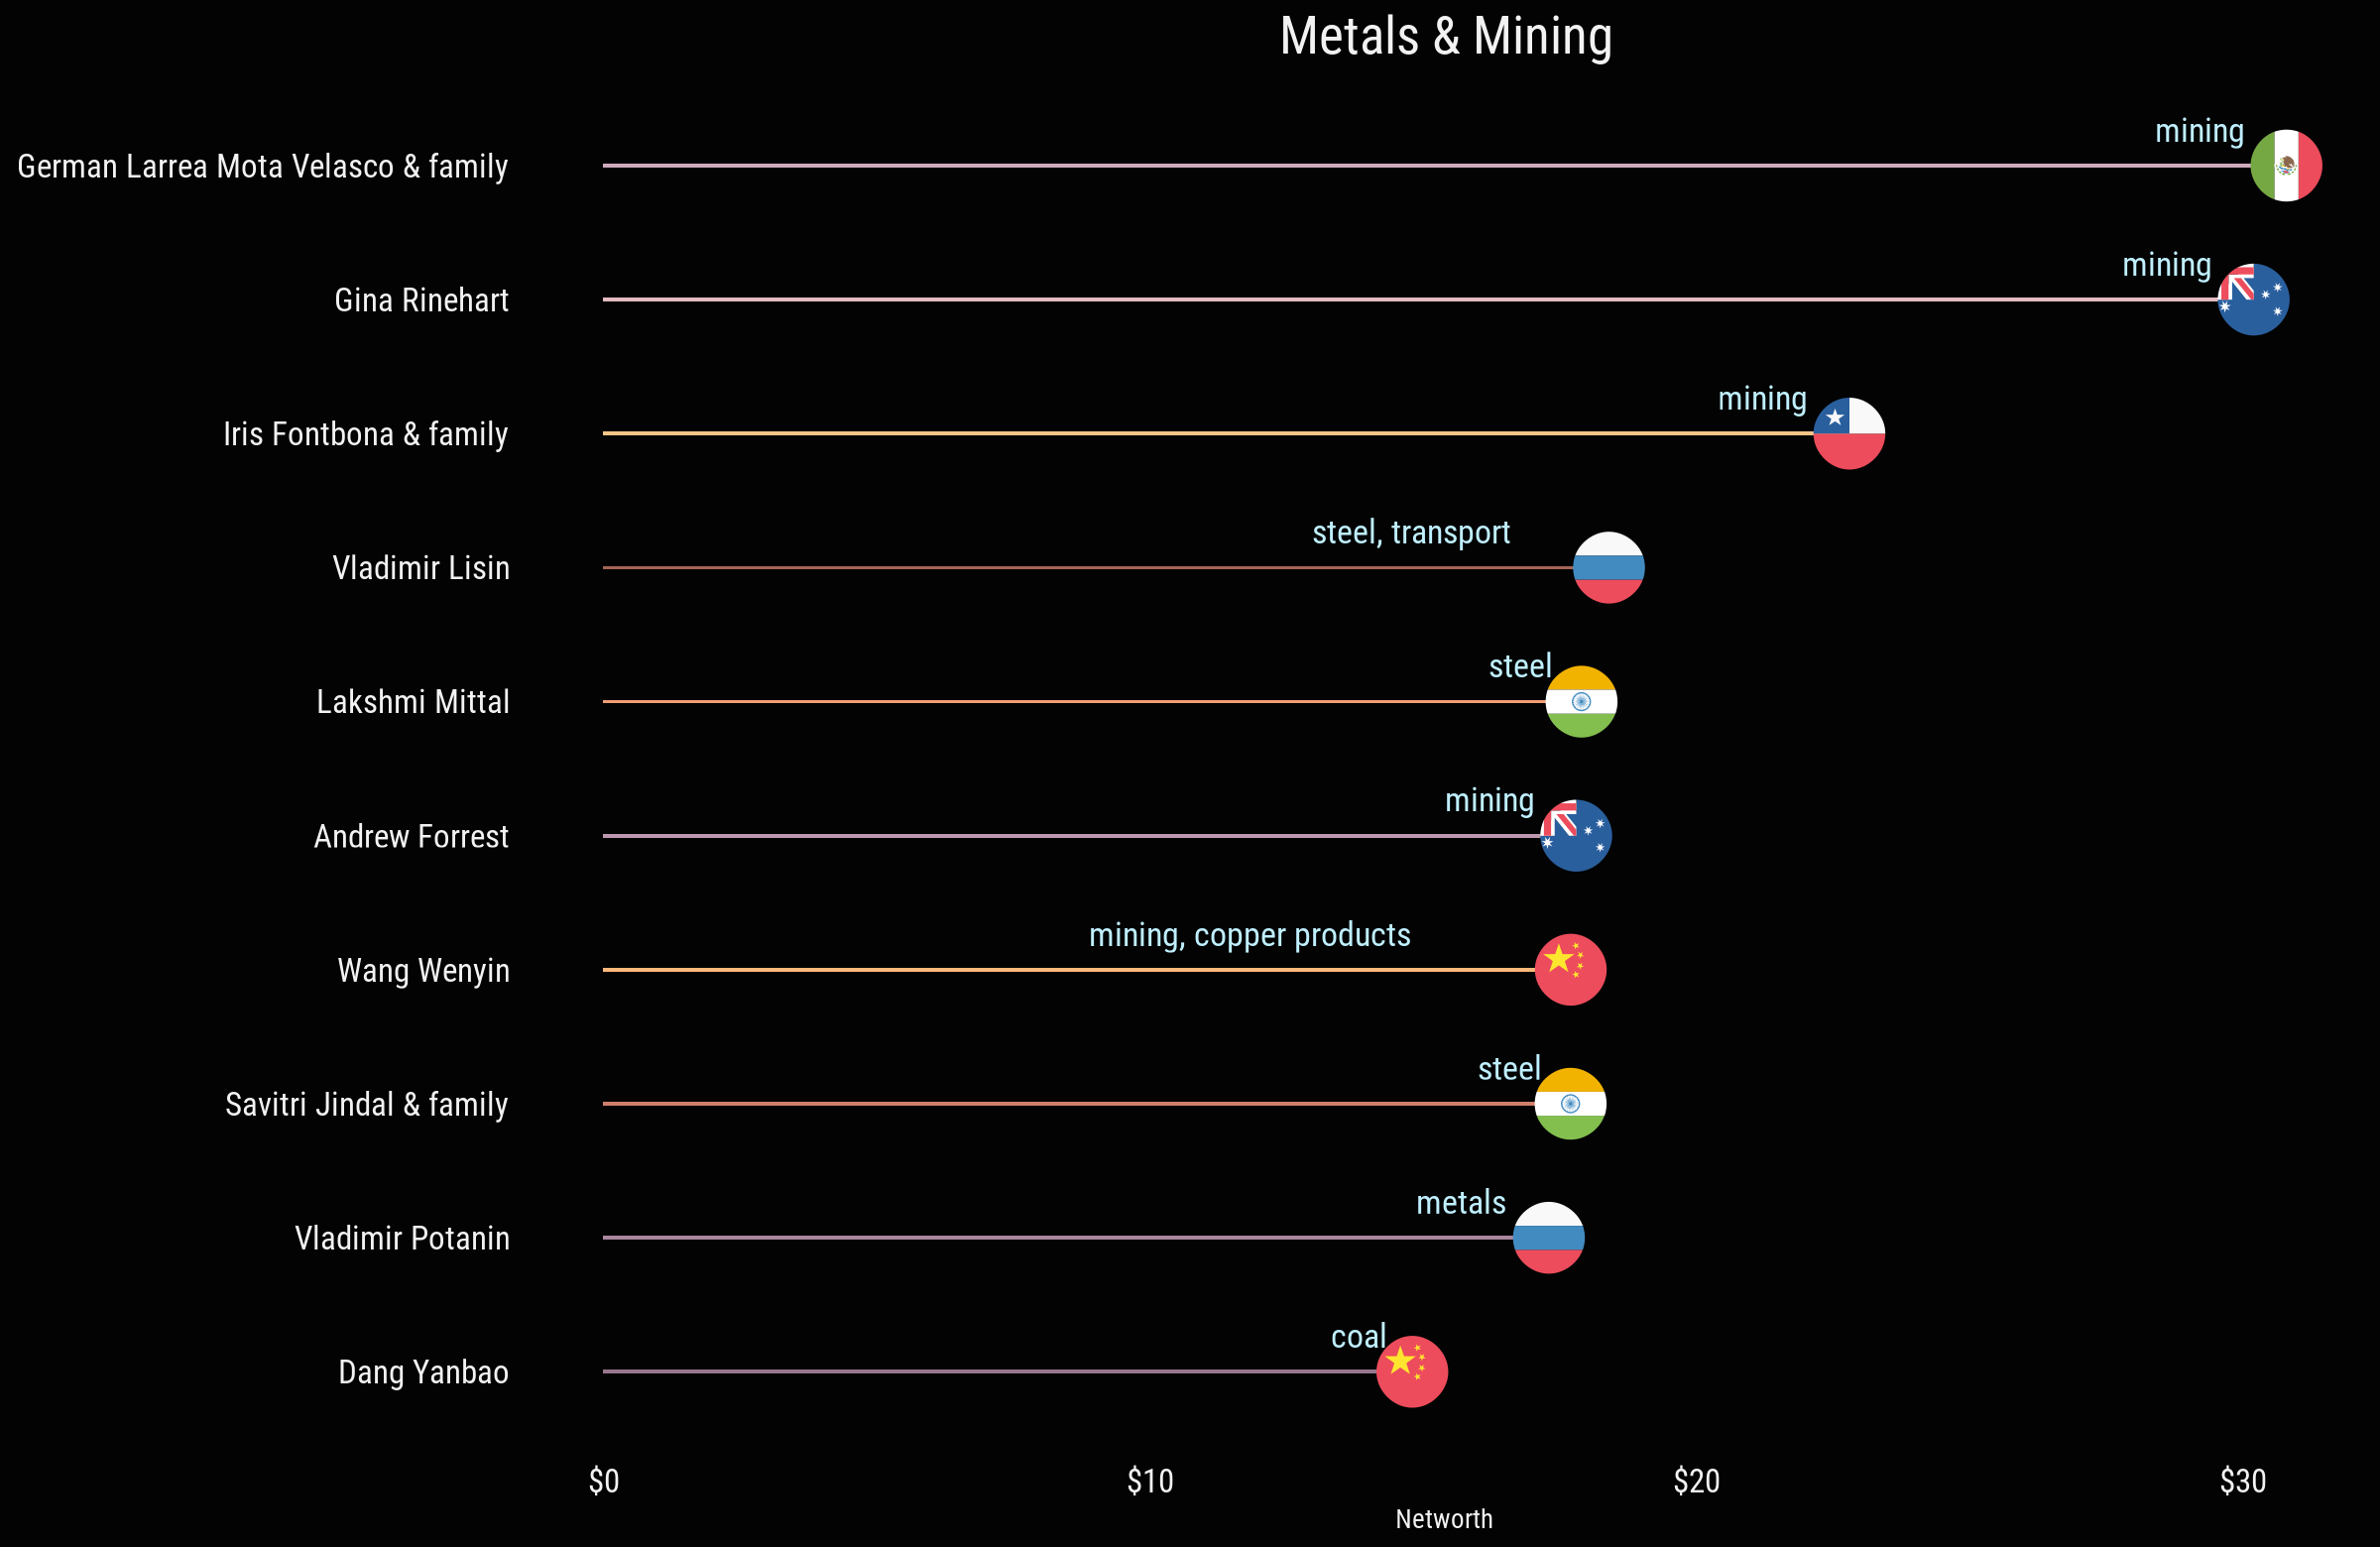

In [81]:
p11 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Metals & Mining")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Metals & Mining ")
p11

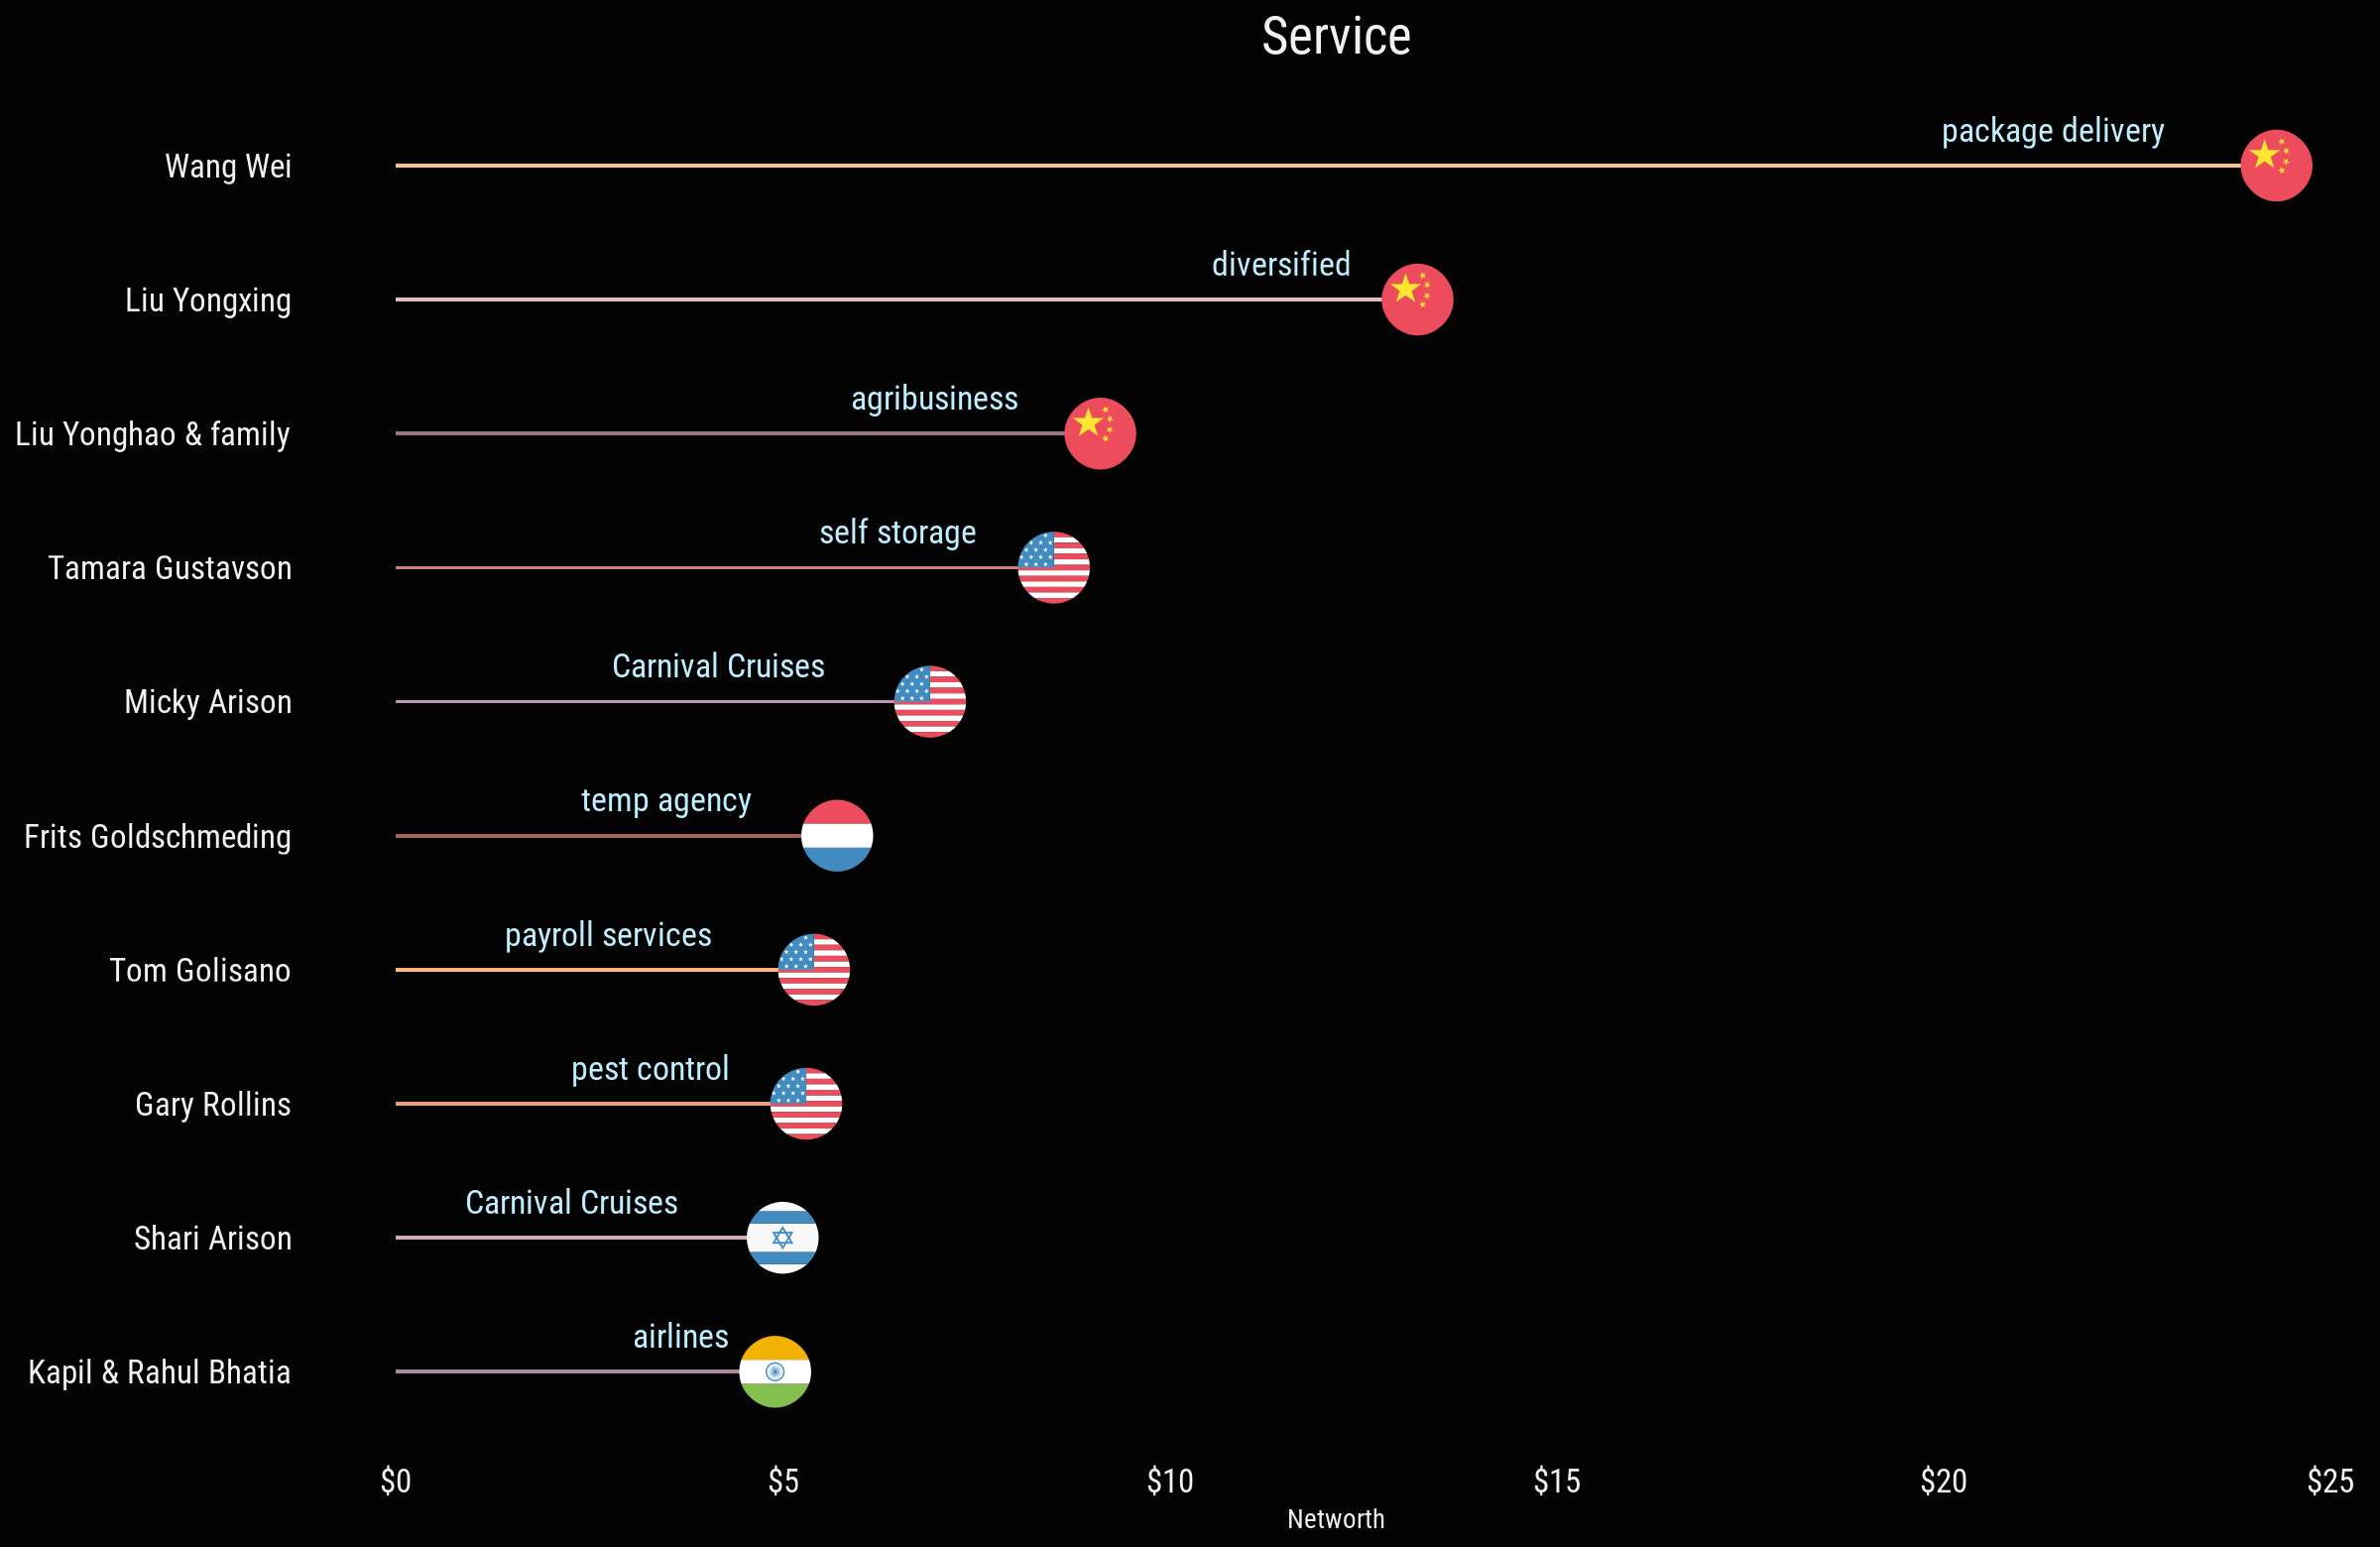

In [83]:
p12 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Service")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Service")
p12

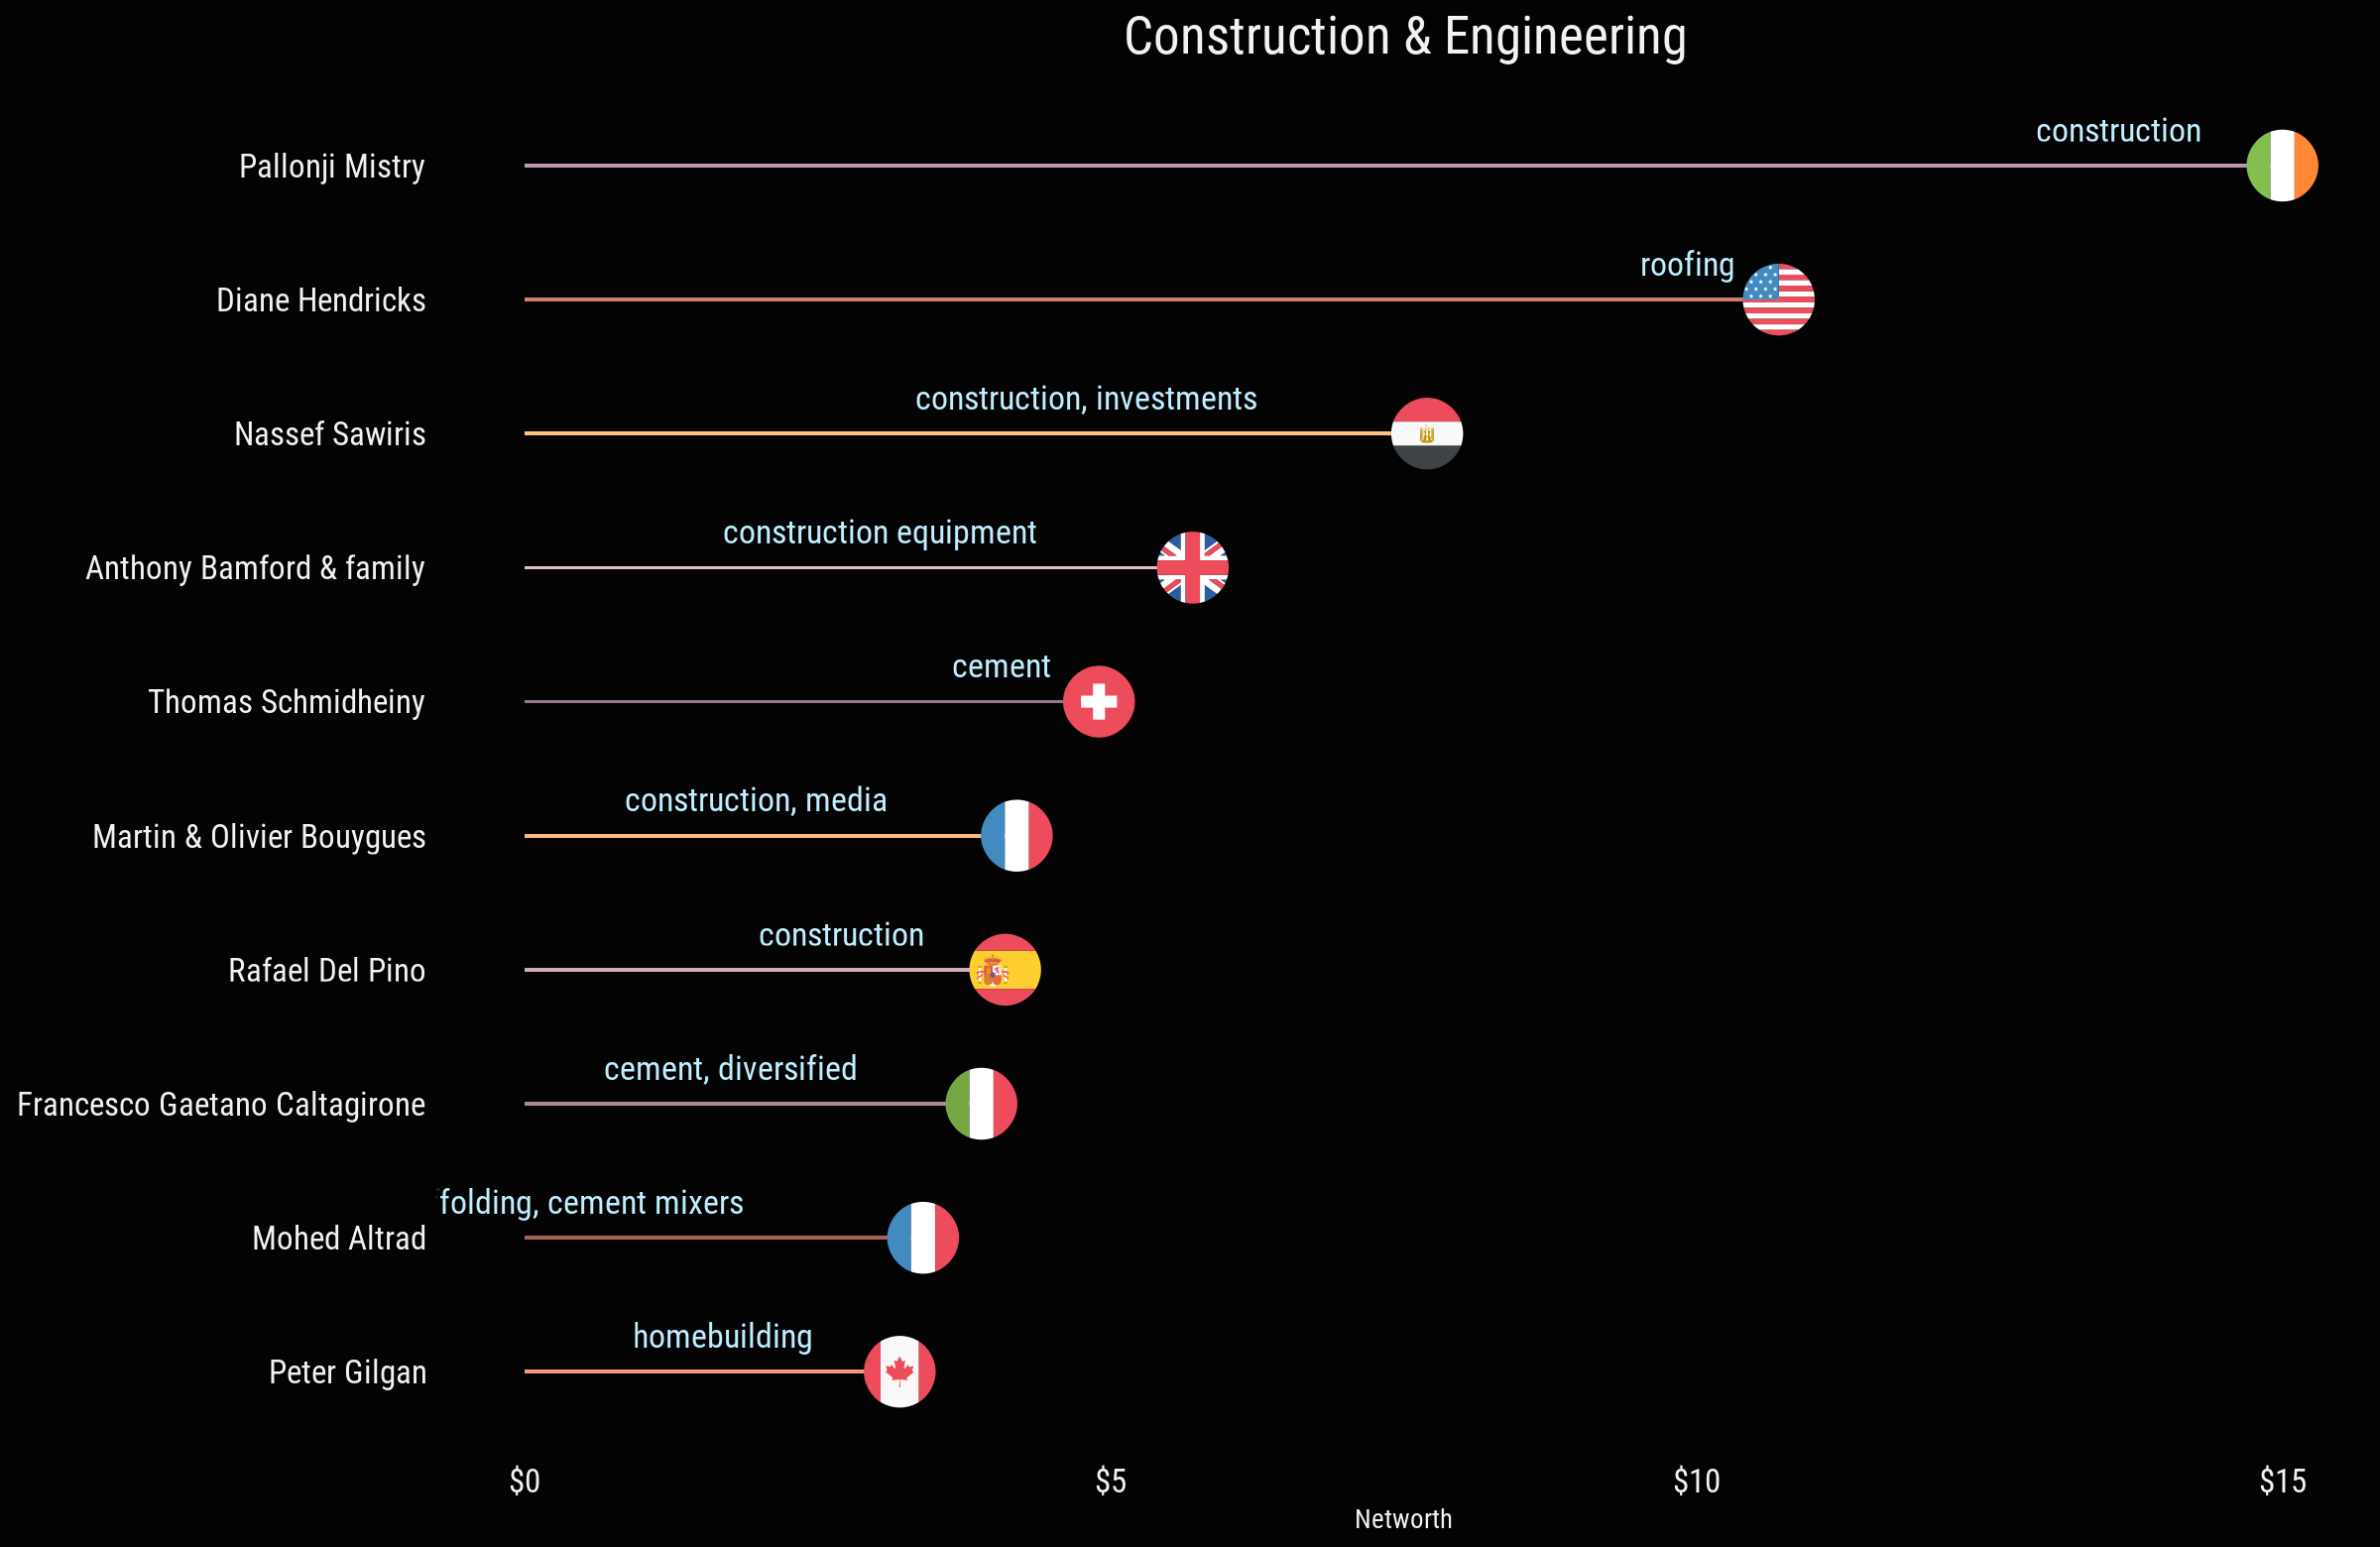

In [85]:
p13 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Construction & Engineering")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Construction & Engineering")
p13

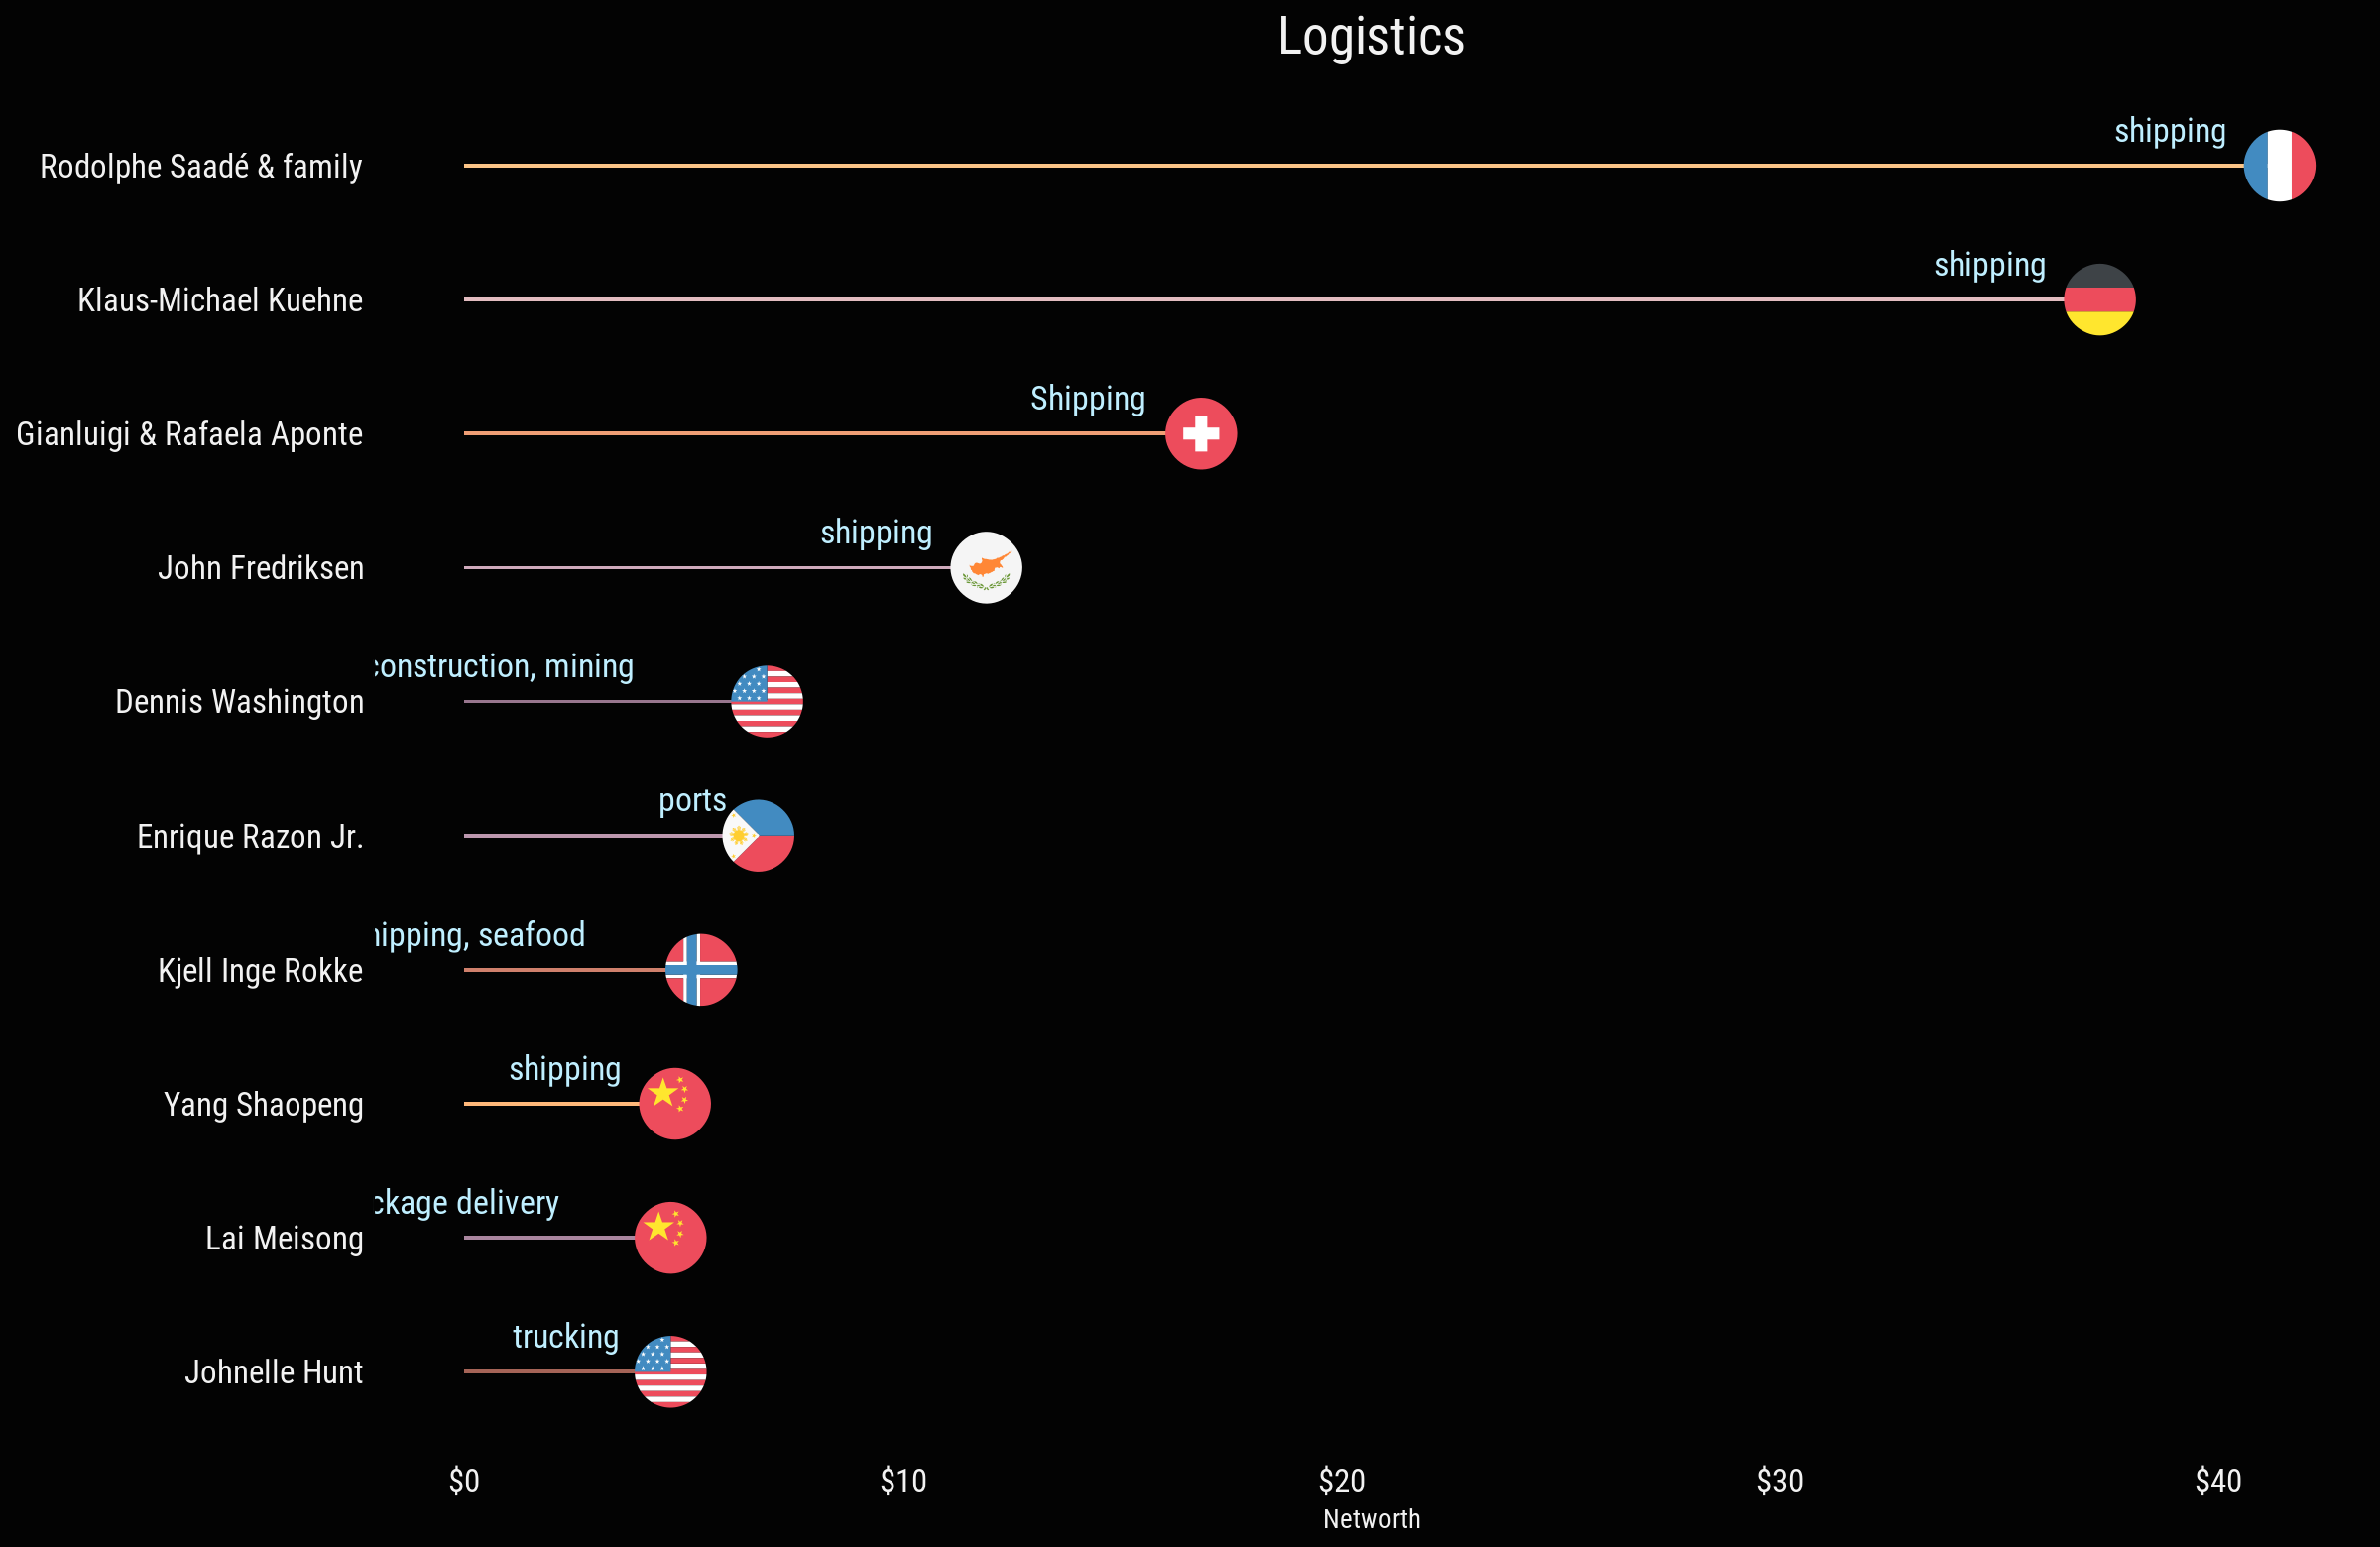

In [88]:
p14 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Logistics")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Logistics")
p14

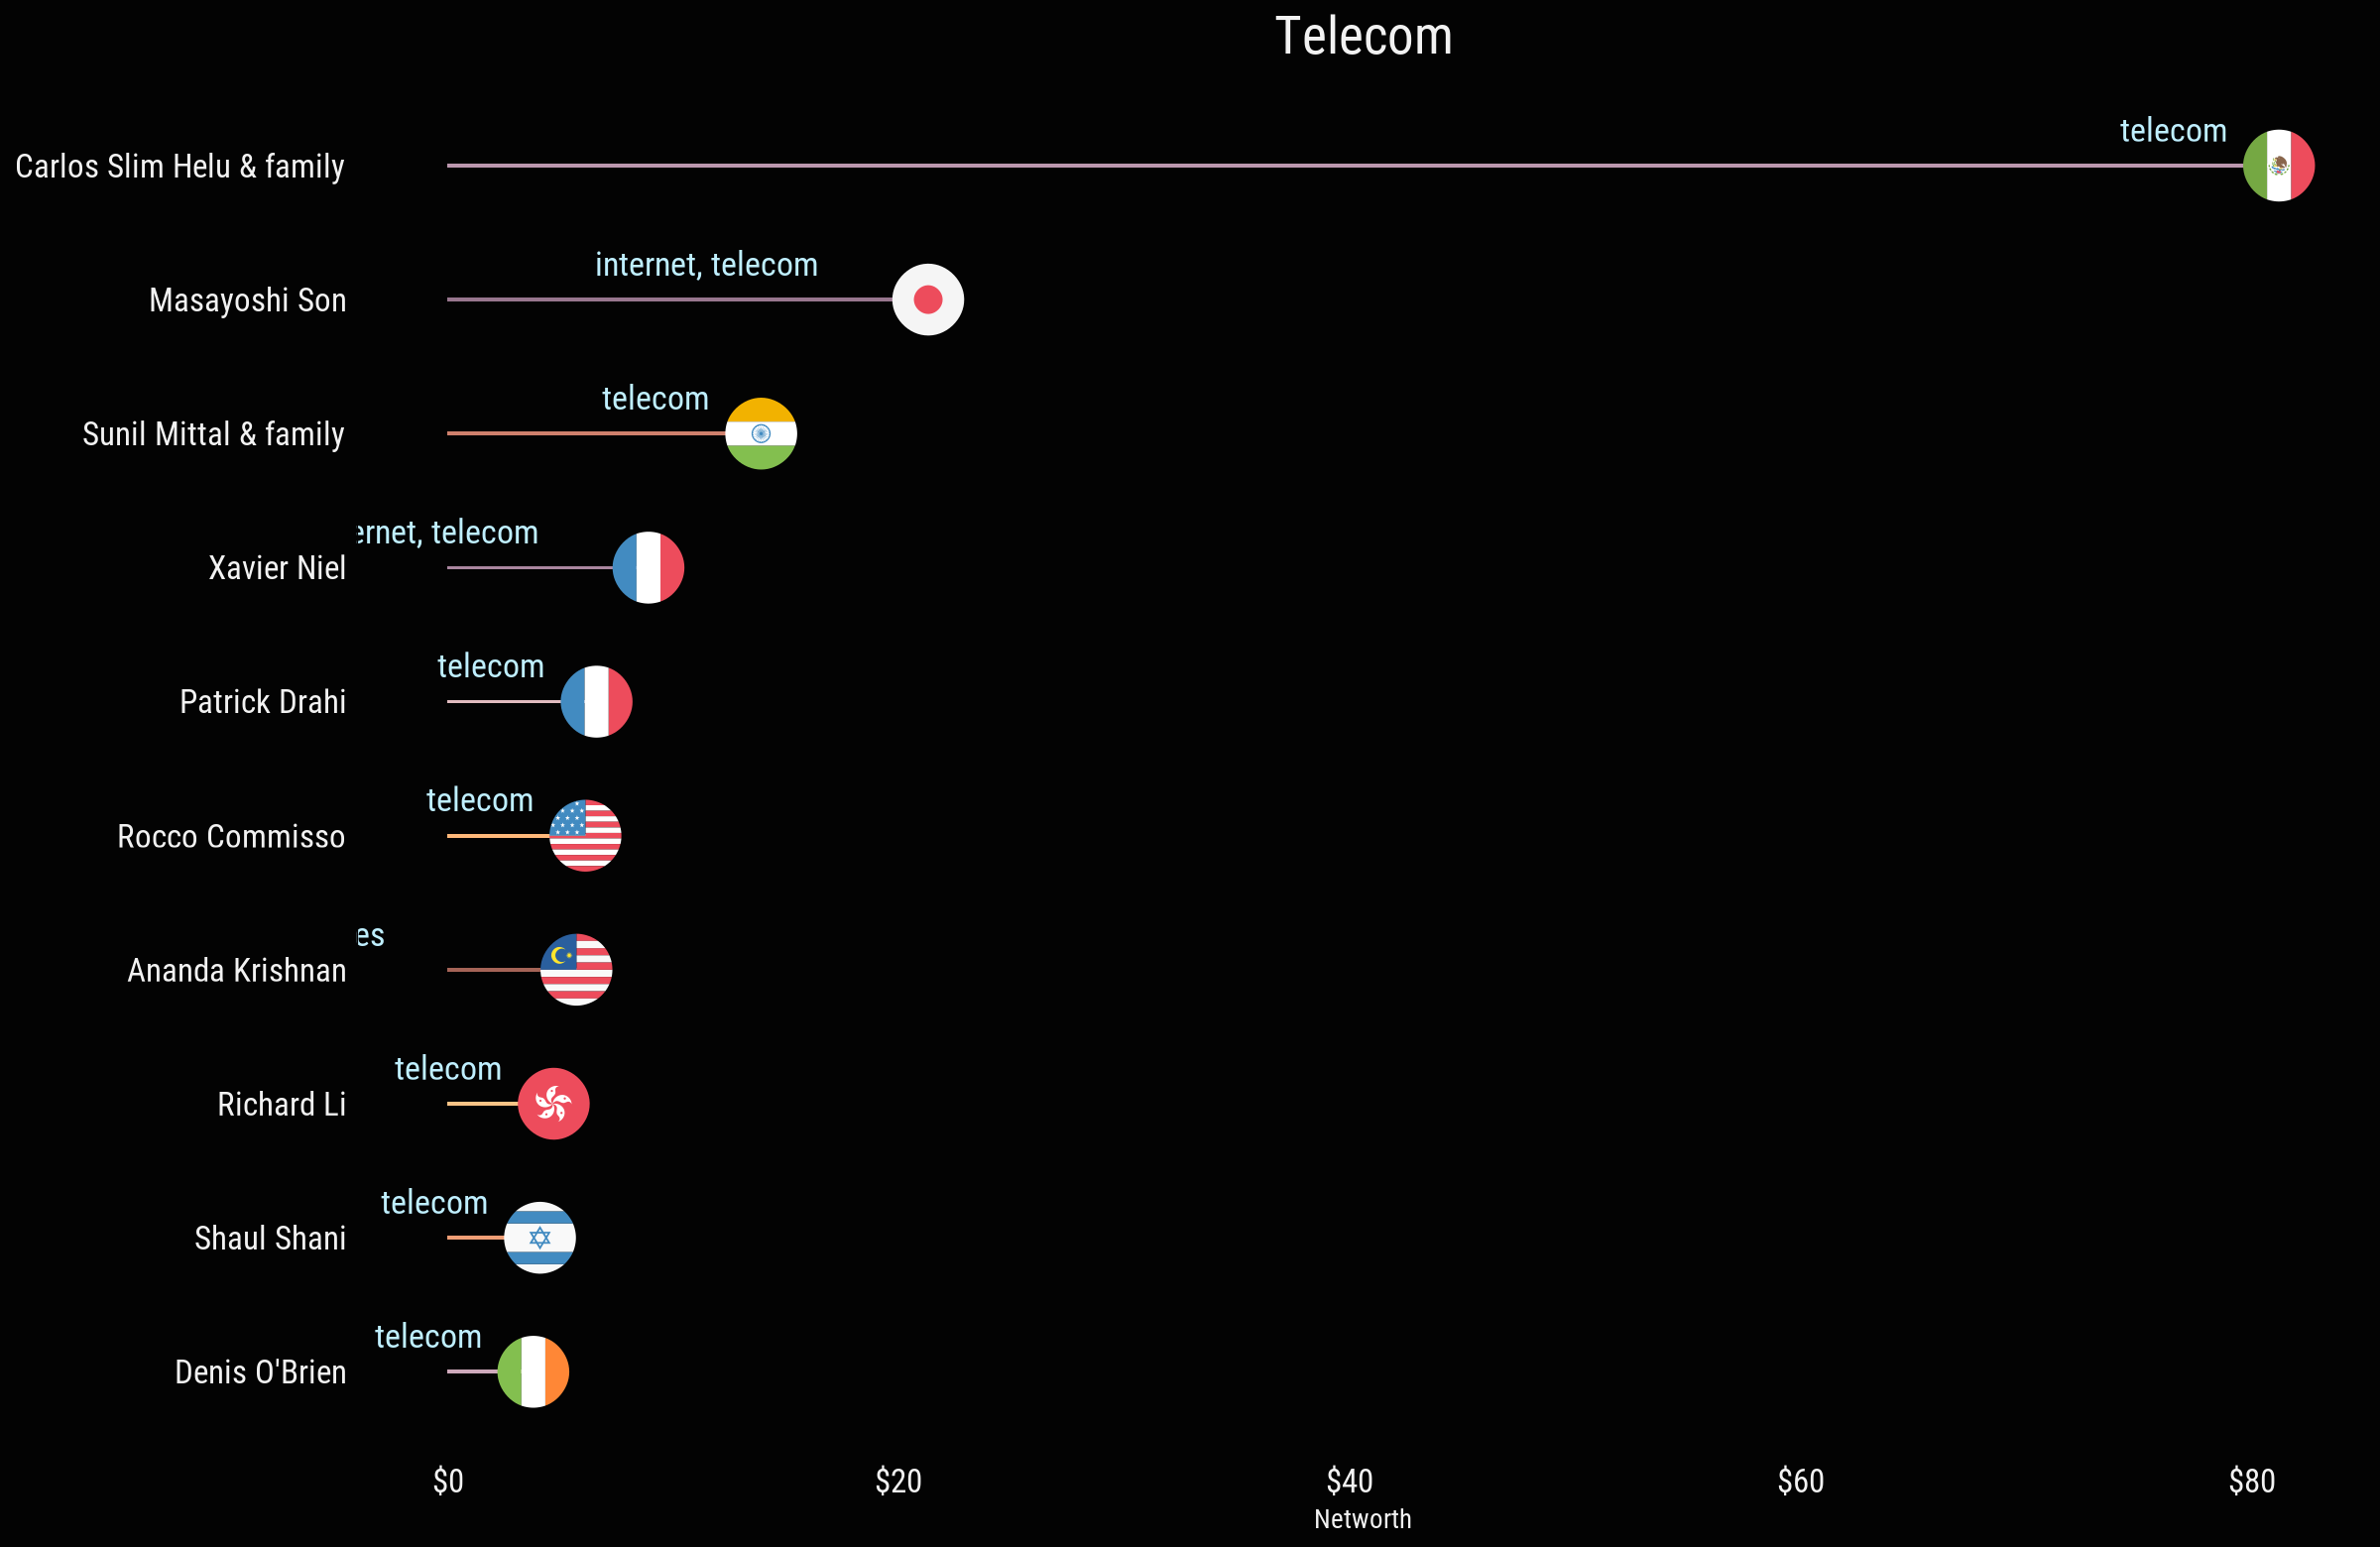

In [89]:
p15 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Telecom")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Telecom")
p15

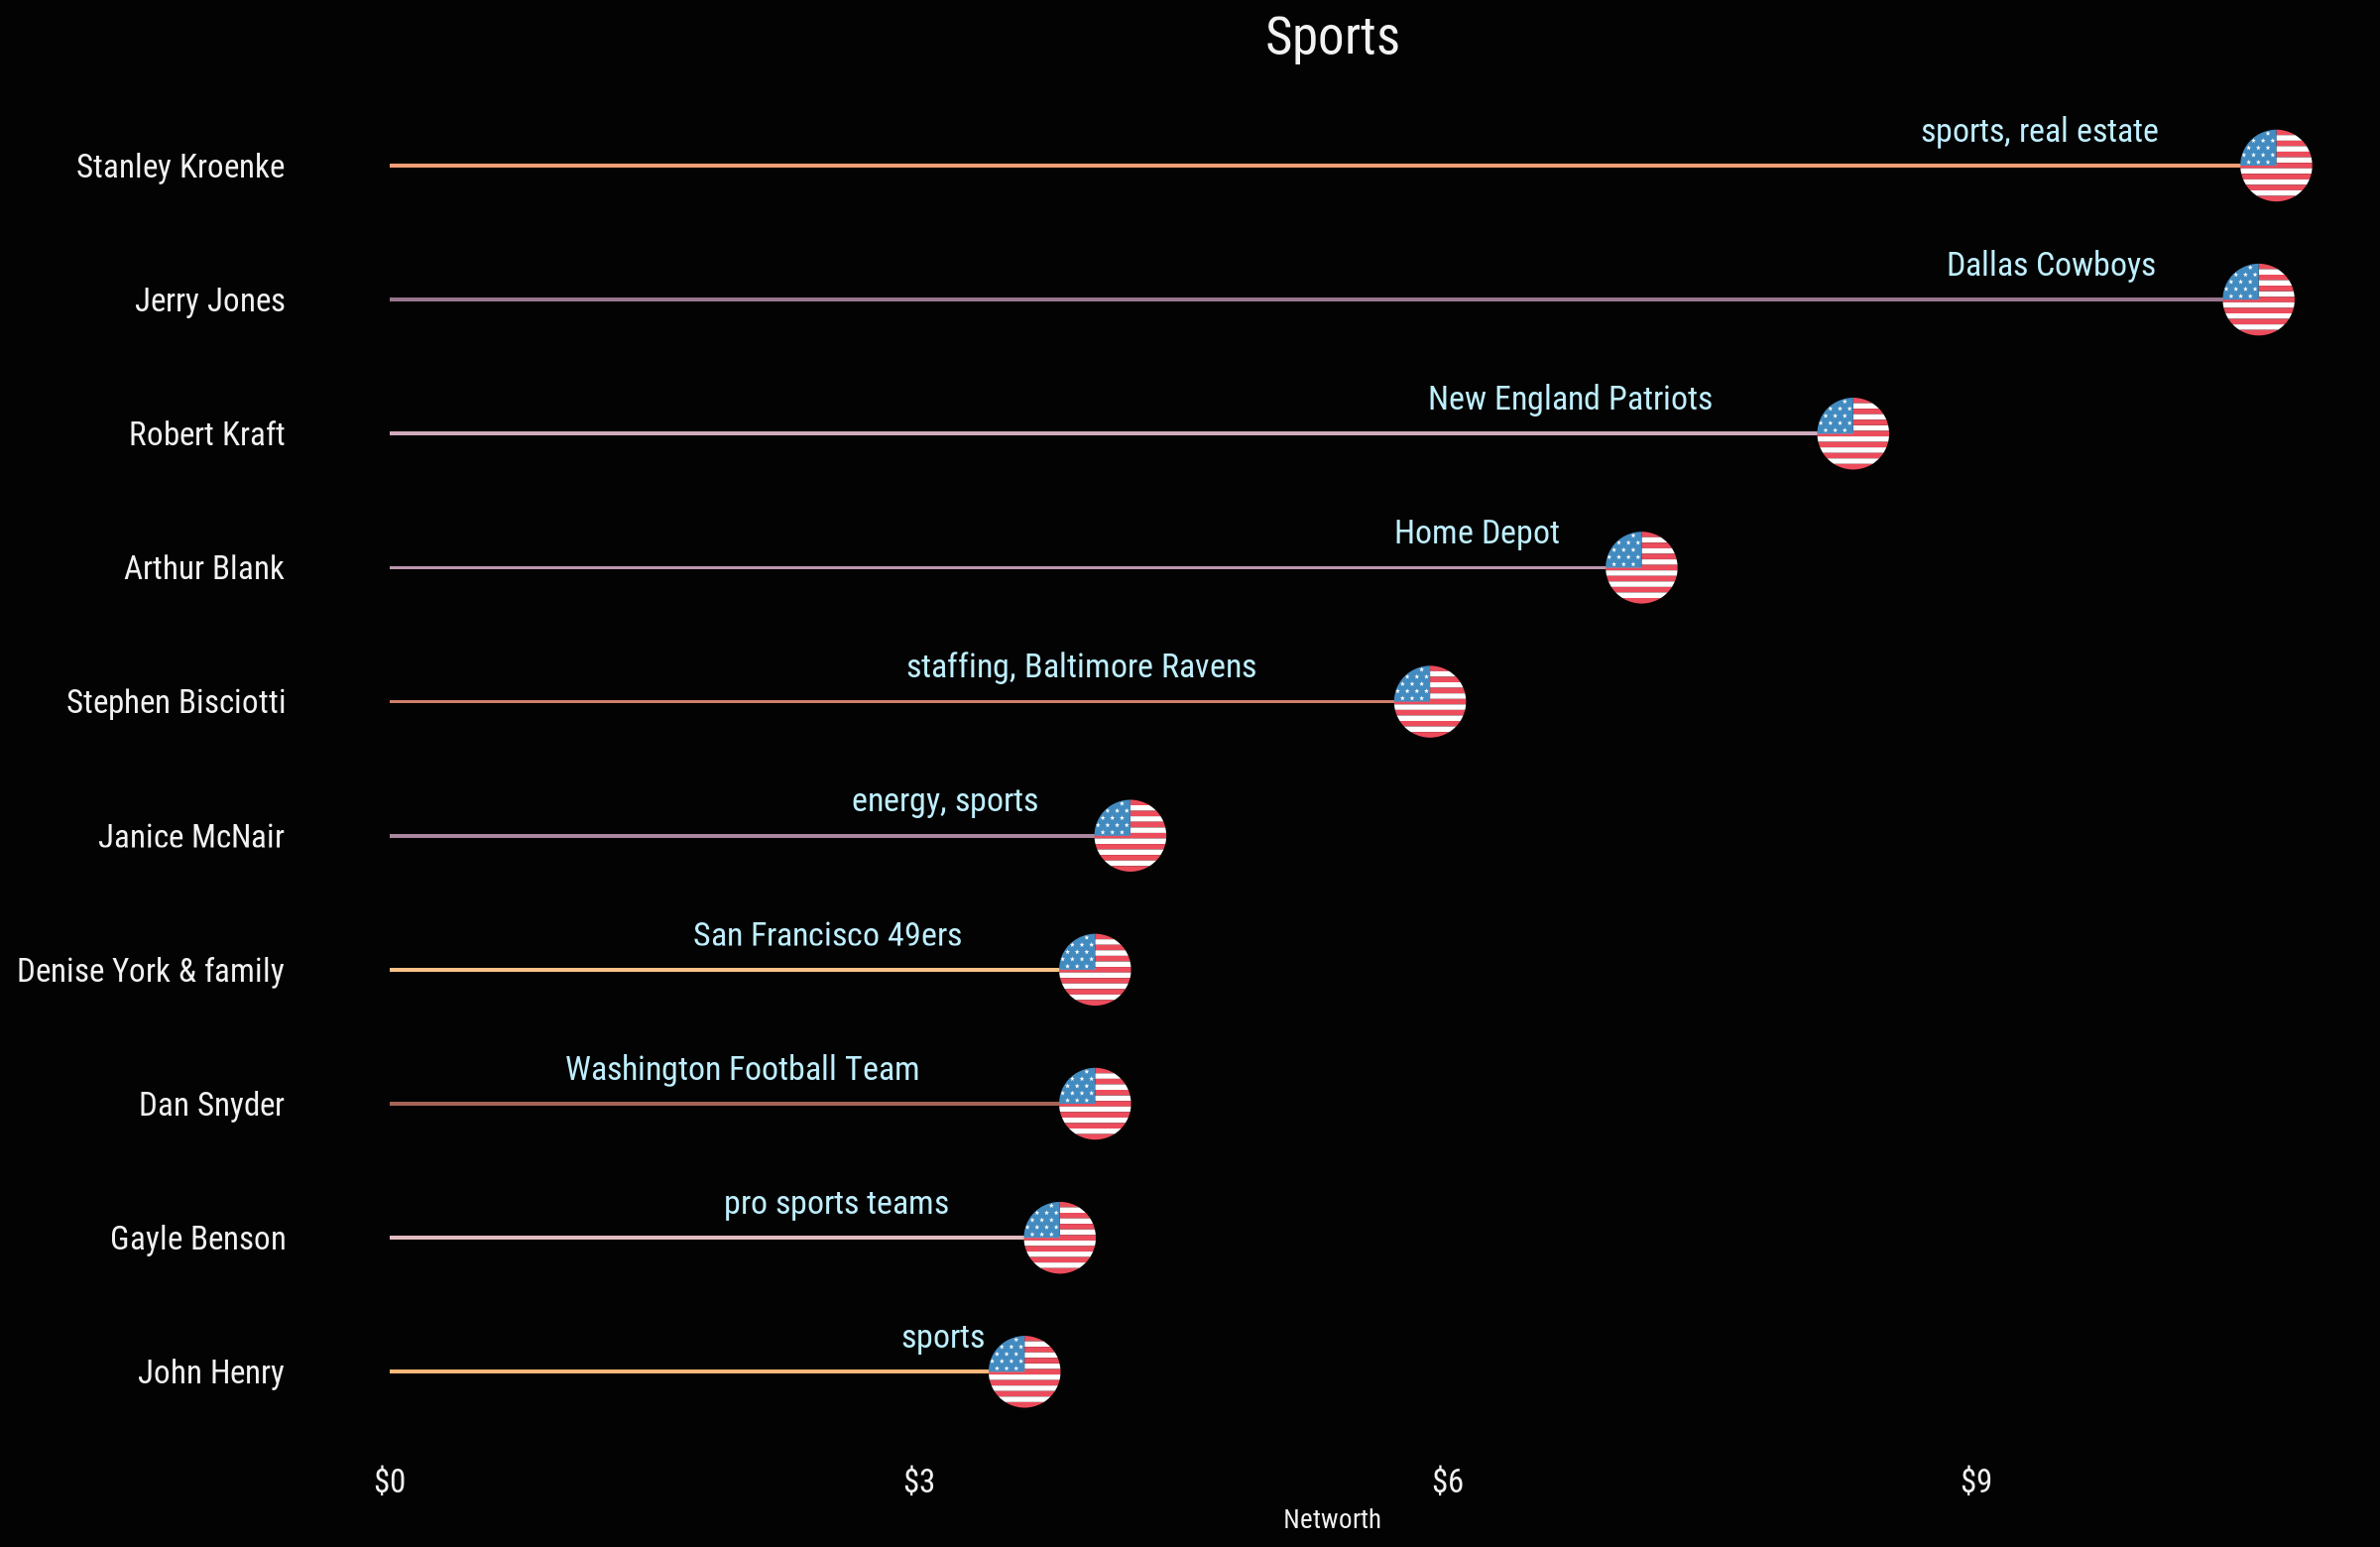

In [90]:
p16 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Sports")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Sports")
p16

Warning message:
“Removed 1 rows containing missing values (geom_flag).”


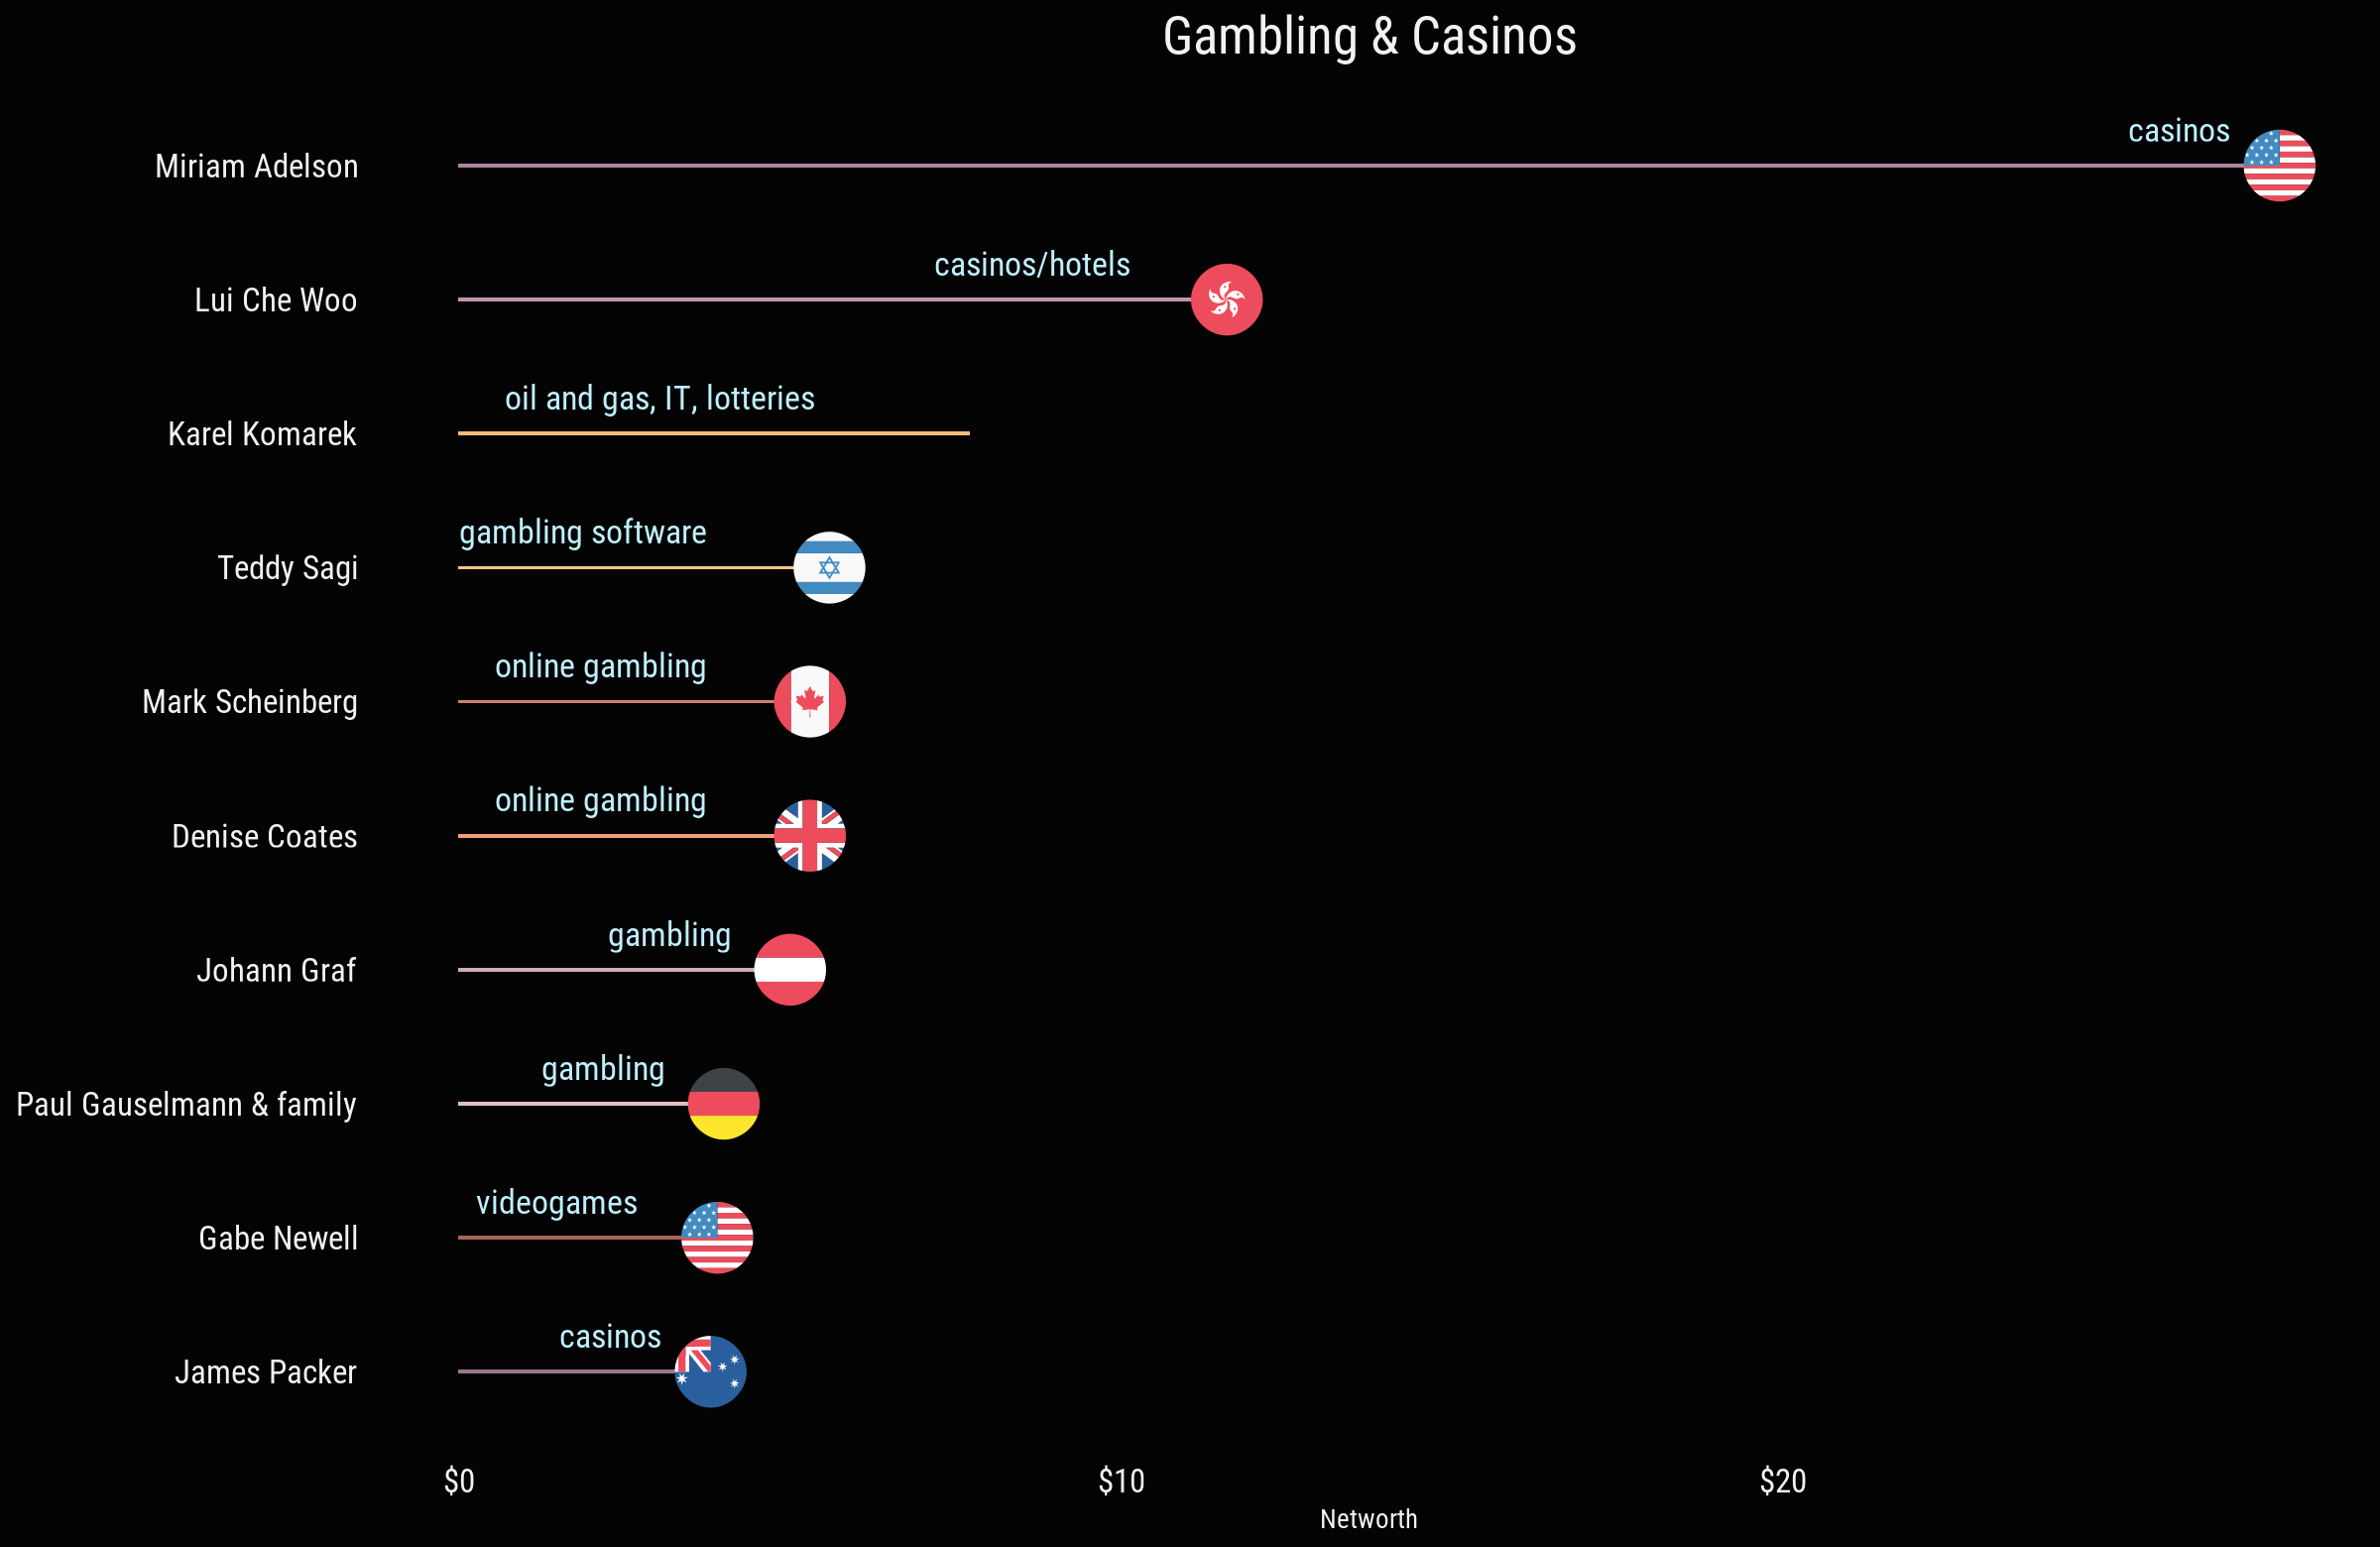

In [91]:
p17 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "Gambling & Casinos")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Gambling & Casinos")
p17

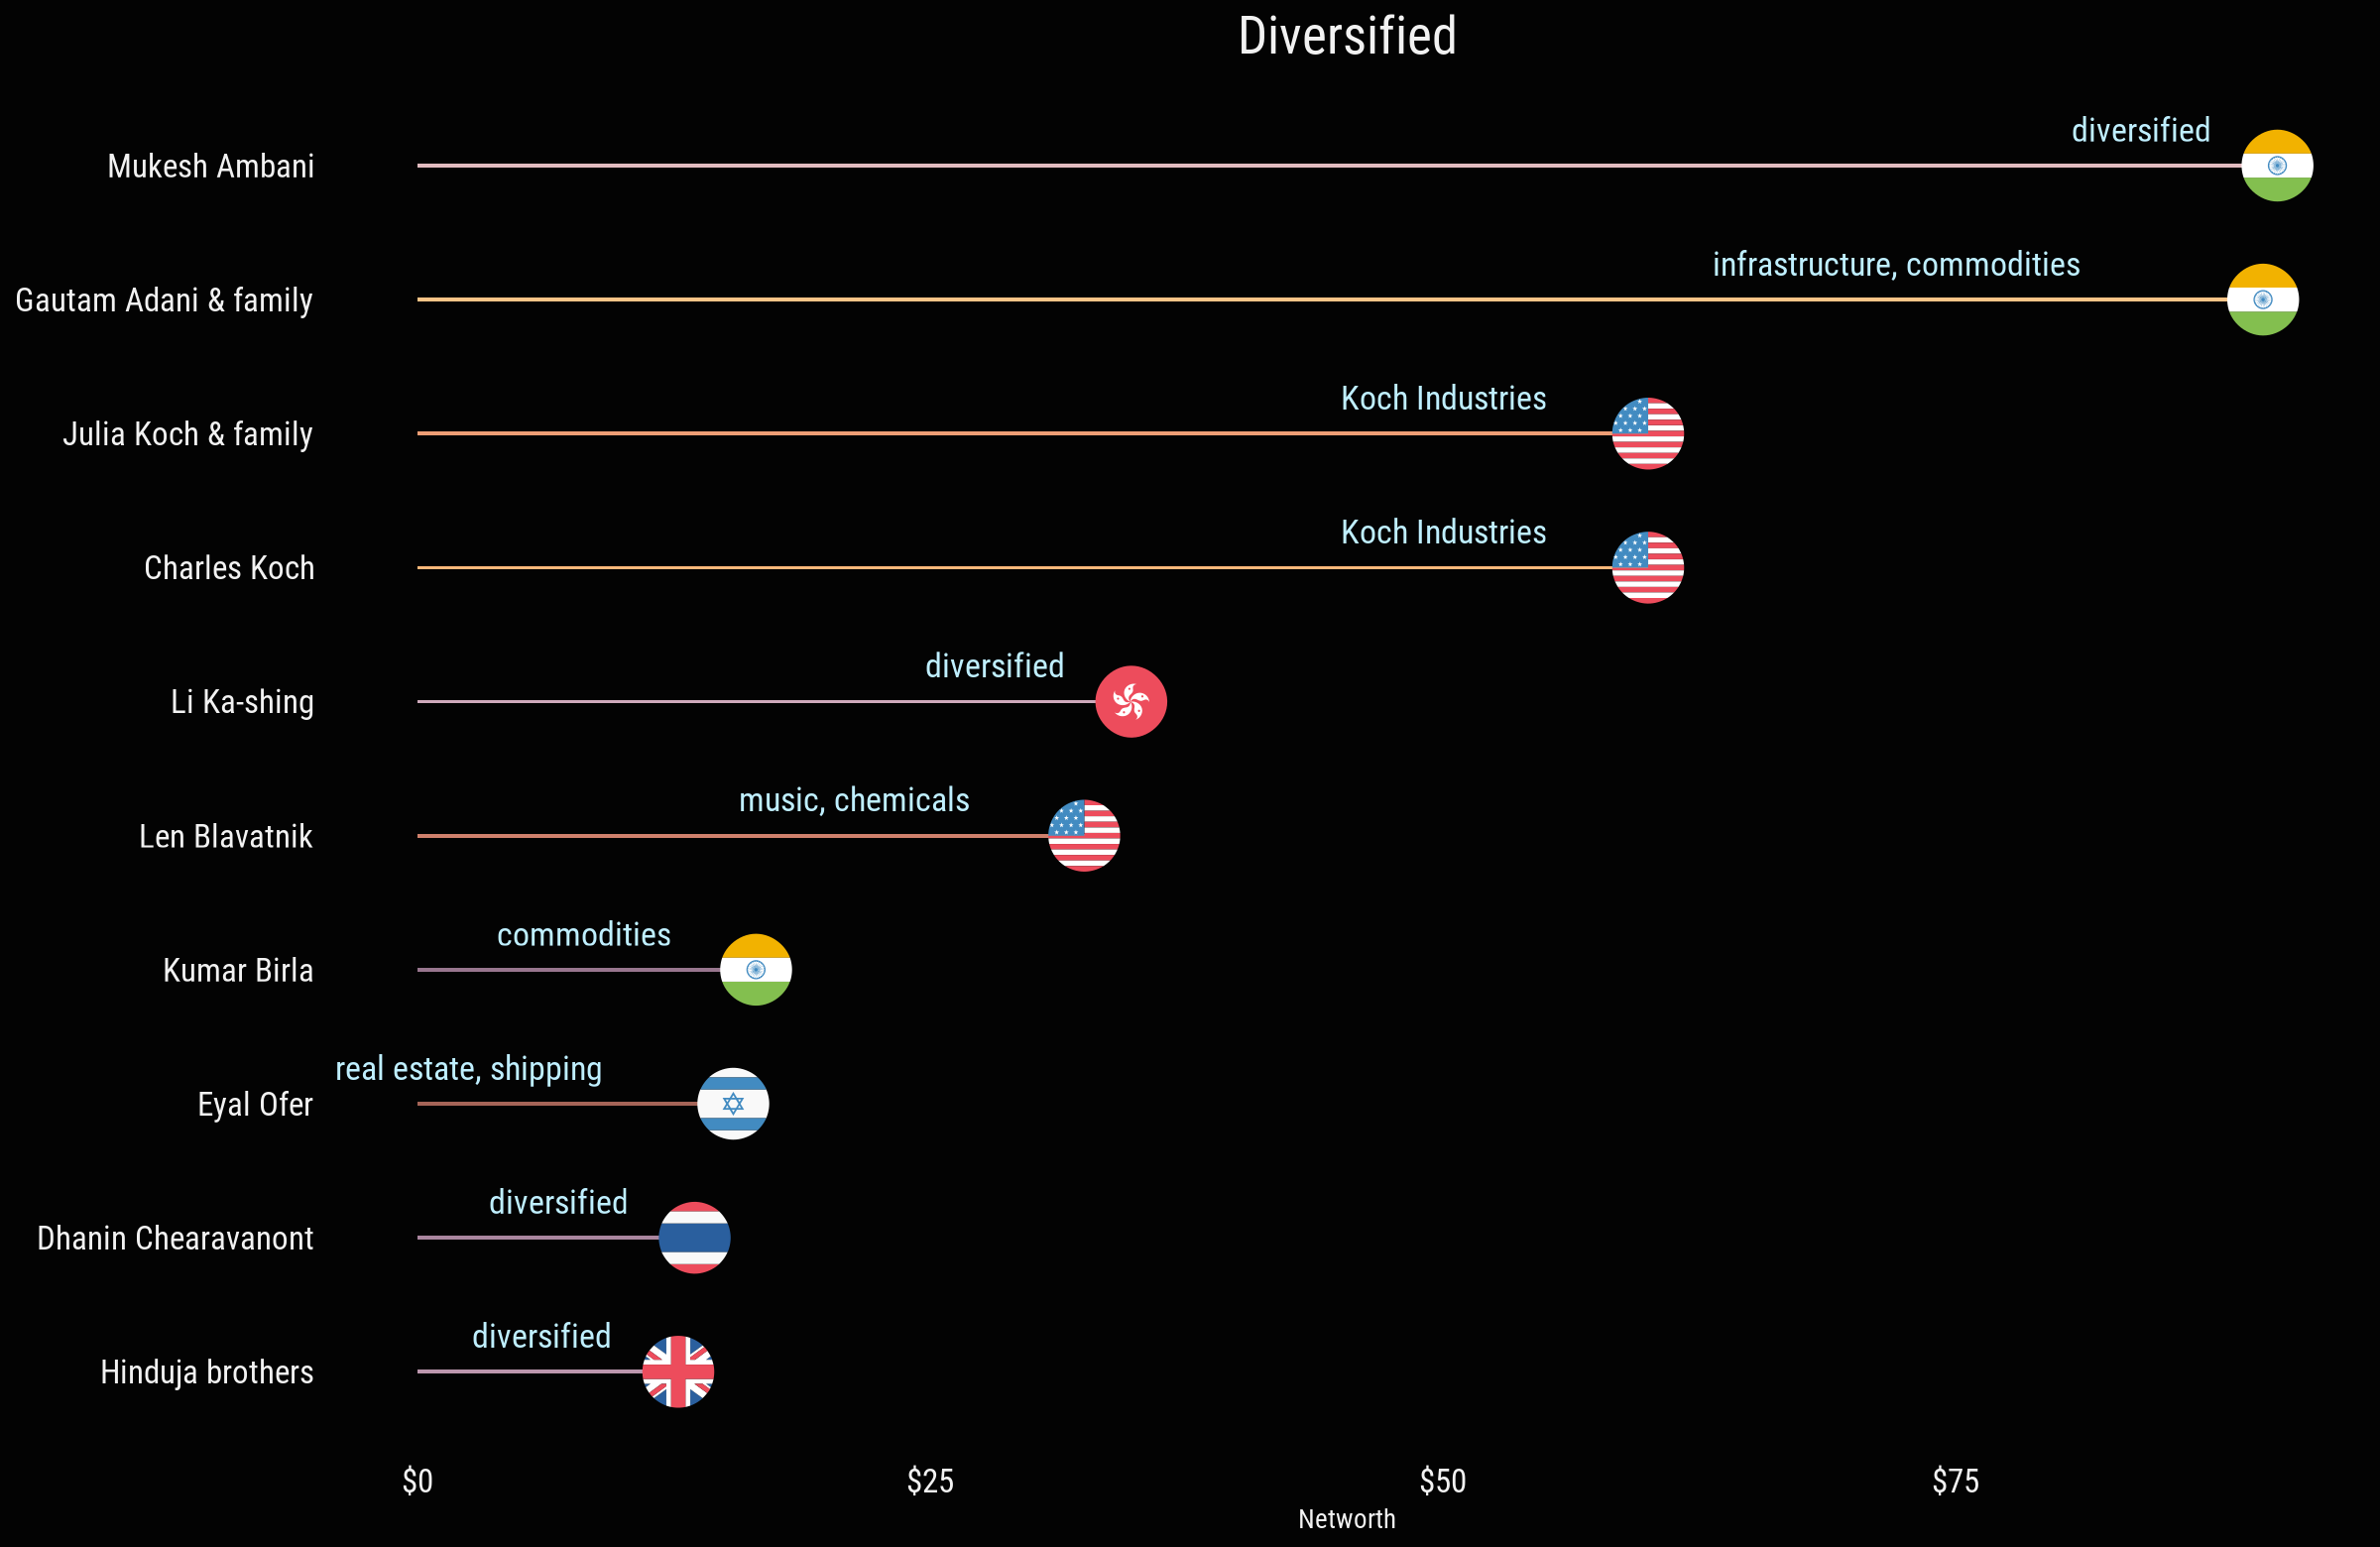

In [92]:
p18 <- final %>%
mutate(country = str_to_lower(alpha.2))%>%
filter(Industry == "diversified")%>%
arrange(desc(Networth))%>%
head(10)%>%
ggplot(aes(fct_reorder(Name, Networth), Networth, fill = fct_reorder(Name, Source)))+
geom_bar(stat = 'identity', width = 0.02)+
geom_flag(aes(country = country), size = 18)+
coord_flip()+
scale_fill_manual(values = met.brewer("Morgenstern", n = 10))+
scale_y_continuous(labels = scales::dollar)+
geom_text(aes(label = Source), size = 9,hjust =1.5 , vjust = -1,color = '#BFEFFF', fontface = "bold", family = "Roboto")+
my_theme()+
theme(axis.title.y = element_blank())+
labs(title = "Diversified")
p18